# A Bayes Net of the Scottish Indicators of Multiple Deprivation Database

Wishlist. 
* I'd like to have a directed graph, with a specification of the root node. 
* I'd like to automatically detect the sign of association. 

## 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import csv
import math

## 2. Load the Data

In [3]:
path = "C:/Users/LocalAdmin/Documents/Programming/Python Scripts/data/SIMD/"

with open(path+'SIMD.csv', 'r') as f:
    LoL = list(csv.reader(f))
header = LoL[0]
col = len(header)
n = len(LoL)
row = n-1
print(n)
data = LoL[1:6977]

6977


### 2.1 View the Data as a List of Lists

In [4]:
print(header)
print(data)

['Data_Zone', 'Intermediate_Zone', 'Council_area', 'Total_population', 'Working_Age_population', 'Income_rate', 'Income_count', 'Employment_rate', 'Employment_count', 'CIF', 'ALCOHOL', 'DRUG', 'SMR', 'DEPRESS', 'LBWT', 'EMERG', 'Attendance', 'Attainment', 'no_qualifications', 'not_participating', 'University', 'drive_petrol', 'drive_GP', 'drive_post', 'drive_primary', 'drive_retail', 'drive_secondary', 'PT_GP', 'PT_post', 'PT_retail', 'Broadband', 'crime_count', 'crime_rate', 'overcrowded_count', 'nocentralheating_count', 'overcrowded_rate', 'nocentralheating_rate']
[['S01006506', 'Culter', 'Aberdeen City', '894', '580', '8%', '71', '8%', '49', '65', '29', '30', '70', '13%', '0.00', '74', '85%', '5.88', '53', '0%', '30%', '2.540103211', '3.074294725', '1.616238532', '2.615747423', '1.544260321', '9.930833333', '8.86358945', '5.856135321', '6.023405963', '11%', '11', '125', '87', '10', '10%', '1%'], ['S01006507', 'Culter', 'Aberdeen City', '793', '470', '5%', '43', '5%', '25', '45', '13

### 2.2 Alternative View of the Data within a DataFrame

In [5]:
path = "C:/Users/LocalAdmin/Documents/Programming/Python Scripts/data/SIMD/"
df=pd.read_csv(path+'SIMD.csv')

In [6]:
df

Data_Zone Intermediate_Zone   Council_area  Total_population  \
0     S01006506            Culter  Aberdeen City               894   
1     S01006507            Culter  Aberdeen City               793   
2     S01006508            Culter  Aberdeen City               624   
3     S01006509            Culter  Aberdeen City               537   
4     S01006510            Culter  Aberdeen City               663   
...         ...               ...            ...               ...   
6971  S01013477    Broxburn South   West Lothian               612   
6972  S01013478     Broxburn East   West Lothian               817   
6973  S01013479     Broxburn East   West Lothian               785   
6974  S01013480     Broxburn East   West Lothian               677   
6975  S01013481     Broxburn East   West Lothian               462   

      Working_Age_population Income_rate  Income_count Employment_rate  \
0                        580          8%            71              8%   
1                        470          5%            43              5%   
2                        461          6%            40              4%   
3                        307         10%            52              8%   
4                        415         10%            68              8%   
...                      ...         ...           ...             ...   
6971                     355         13%            80             11%   
6972                     582          9%            74              8%   
6973                     479         18%           144             16%   
6974                     410          8%            54              9%   
6975                     305          3%            14              2%   

      Employment_count    CIF  ...      PT_GP   PT_post  PT_retail Broadband  \
0                   49   65.0  ...   8.863589  5.856135   6.023406       11%   
1                   25   45.0  ...   9.978272  7.515000   7.926029        1%   
2                   19   45.0  ...   8.620700  4.321493   5.770910        1%   
3                   26   80.0  ...   7.935112  8.433328   8.329819       11%   
4                   32   95.0  ...   5.568964  6.966429   6.632609        0%   
...                ...    ...  ...        ...       ...        ...       ...   
6971                39  120.0  ...   7.693930  4.175574   4.284855        0%   
6972                48  100.0  ...   6.550913  6.485256   7.598948        0%   
6973                75  140.0  ...   7.355121  4.006667   4.412252        1%   
6974                35  130.0  ...  10.176170  6.409534   6.928539        0%   
6975                 6   60.0  ...  11.469202  7.889751   8.615898        8%   

      crime_count  crime_rate overcrowded_count nocentralheating_count  \
0              11         125                87                     10   
1              10         128                85                      4   
2               8         130                31                      8   
3               4          75                42                      6   
4              11         168                50                      7   
...           ...         ...               ...                    ...   
6971           13         217                93                     10   
6972           29         350                87                      1   
6973           44         560                96                      9   
6974            7         106               107                      1   
6975           13         287                67                      2   

      overcrowded_rate nocentralheating_rate  
0                  10%                    1%  
1                  10%                    0%  
2                   5%                    1%  
3                   7%                    1%  
4                   9%                    1%  
...                ...                   ...  
6971               15%                    2%  
6972               10%                    0%  
697

## 3. Prepare the Data

In [7]:
X = np.array(data)

In [8]:
X_text = X[:,0:3]
X_num = X[:,3:col]

In [9]:
print(X_text)
print(X_num)

[['S01006506' 'Culter' 'Aberdeen City']
 ['S01006507' 'Culter' 'Aberdeen City']
 ['S01006508' 'Culter' 'Aberdeen City']
 ...
 ['S01013479' 'Broxburn East' 'West Lothian']
 ['S01013480' 'Broxburn East' 'West Lothian']
 ['S01013481' 'Broxburn East' 'West Lothian']]
[['894' '580' '8%' ... '10' '10%' '1%']
 ['793' '470' '5%' ... '4' '10%' '0%']
 ['624' '461' '6%' ... '8' '5%' '1%']
 ...
 ['785' '479' '18%' ... '9' '12%' '1%']
 ['677' '410' '8%' ... '1' '16%' '0%']
 ['462' '305' '3%' ... '2' '15%' '0%']]


In [10]:
# Missing values are coded properly with not-a-number
def handle_missing(val):
    if (val == "*"):
        val = np.nan
    if (val == 'n/a'):
        val = np.nan   
    if (val == ''):
        val = np.nan
    return val

def handle_string(val):
    if (isinstance(val,str)):
        val = val.replace("%",'')
        new_val = float(val)/100
    else:
        new_val=float(val)
    return new_val

def handle_log(val):
    if (np.isnan(val)):
        
        new_val = np.nan
    else:
        print(val)
        if (val == 0):
            new_val = 0
        else:
            new_val=np.log(val+.00001)
        
    return new_val

In [11]:
for i in range(row):
    for j in range(col-3):
        val = X_num[i,j]
        val = handle_missing(val)
        val = handle_string(val)
        val = handle_log(val)
        X_num[i,j]=val

            

8.94
5.8
0.08
0.71
0.08
0.49
0.65
0.29
0.3
0.7
0.13
0.0
0.74
0.85
0.0588
0.53
0.0
0.3
0.02540103211
0.03074294725
0.01616238532
0.02615747423
0.015442603210000001
0.09930833333000001
0.08863589449999999
0.05856135321
0.06023405963
0.11
0.11
1.25
0.87
0.1
0.1
0.01
7.93
4.7
0.05
0.43
0.05
0.25
0.45
1.3
1.26
0.81
0.14
0.0
0.86
0.85
0.0596
0.96
0.02
0.12
0.0391507177
0.04309811603
0.02555858254
0.0364669697
0.028496560999999997
0.1104281609
0.09978271531
0.07515
0.07926028707999999
0.01
0.1
1.28
0.85
0.04
0.1
0.0
6.24
4.61
0.06
0.4
0.04
0.19
0.45
0.71
0.18
0.41
0.13
0.0004
0.69
0.9
0.0575
0.39
0.01
0.19
0.03323024883
0.03784548989
0.01440991446
0.032473251030000004
0.02062255054
0.10616768289999999
0.08620699844
0.04321493002000001
0.05770909798
0.01
0.08
1.3
0.31
0.08
0.05
0.01
5.37
3.07
0.1
0.52
0.08
0.26
0.8
0.8
0.28
1.03
0.16
0.0005
0.88
0.94
0.062
0.8
0.0
0.25
0.02622991379
0.027780258619999998
0.02620681034
0.01936907895
0.02160142241
0.1003647059
0.07935112069
0.08433327586
0.083298

0.46
0.8
0.78
0.16
0.9
0.13
0.0003
0.97
0.84
0.0579
0.52
0.0
0.27
0.016618454039999998
0.022161803619999997
0.02447865599
0.0231868984
0.042263683839999996
0.040786086959999995
0.08782827298000001
0.09519777159000001
0.1463821727
0.12
0.14
1.46
0.56
0.06
0.08
0.01
6.77
3.95
0.04
0.25
0.04
0.17
0.6
0.11
0.0
3.9
0.13
0.0
0.86
0.88
0.06
0.39
0.0
0.29
0.028747881359999998
0.015595127120000002
0.015032960049999999
0.02580429448
0.0328222155
0.03968157895
0.06062182203
0.06612303269
0.09453038741
0.01
0.95
14.06
0.94
0.11
0.11
0.01
10.07
7.91
0.1
1.05
0.09
0.7
0.9
0.71
0.65
1.01
0.17
0.0002
0.9
0.75
0.053099999999999994
0.91
0.05
0.08
0.04348021363
0.01504117497
0.024241454729999997
0.0165594697
0.02837377925
0.01674447674
0.04681192777
0.07226251272
0.07757843336999999
0.0
0.3
3.02
2.12
0.37
0.22
0.04
10.0
8.88
0.09
0.89
0.07
0.6
0.75
0.93
0.61
1.07
0.12
0.0002
0.73
0.71
0.69
0.09
0.02
0.03437315283
0.01652932692
0.0290805668
0.01416363636
0.025559564780000002
0.02376583333
0.04969478745
0.

5.91
4.25
0.01
0.08
0.02
0.08
0.35
0.12
0.0
0.7
0.13
0.0
0.49
0.91
0.06
0.46
0.02
0.12
0.03546793301
0.02833680556
0.027876062089999997
0.01903928571
0.06182802288000001
0.0466640625
0.06468022876
0.1007669935
0.15500710780000002
0.0
0.1
1.71
0.33
0.05
0.05
0.01
6.69
4.76
0.03
0.2
0.03
0.13
0.4
0.73
0.36
0.27
0.12
0.0
0.65
0.92
0.0572
0.48
0.02
0.05
0.03825553097
0.02125147493
0.01946471239
0.026436285709999997
0.06444085546
0.053057751939999995
0.06288366519000001
0.07433053097
0.1567466814
0.0
0.03
0.45
0.15
0.1
0.02
0.01
8.38
5.86
0.04
0.3
0.02
0.13
0.3
0.24
0.0
0.49
0.1
0.0
0.46
0.91
0.059000000000000004
0.36
0.0
0.14
0.03850725503
0.03341184045
0.0329406093
0.029617343169999998
0.06586843593
0.055142953019999996
0.09142330402000001
0.09738523869
0.1718682789
0.0
0.05
0.6
0.2
0.0
0.03
0.0
7.47
5.97
0.02
0.16
0.03
0.18
0.35
1.03
0.16
1.14
0.15
0.0006
0.93
0.88
0.055999999999999994
0.55
0.01
0.11
0.034342544419999996
0.01734070431
0.01813937183
0.027141199999999997
0.0605313768999999

1.32
0.16
0.03
0.023520614040000002
0.01332569444
0.0154121345
0.02088555556
0.01360745614
0.0360631068
0.04971103801
0.05280625
0.050013486839999996
0.0
0.62
8.79
1.63
0.22
0.24
0.03
6.71
4.98
0.22
1.47
0.19
0.93
1.4
2.11
4.21
1.53
0.22
0.0003
1.33
0.77
0.057999999999999996
1.32
0.11
0.07
0.01418469595
0.02325814189
0.014944527030000002
0.018430973450000002
0.01854601351
0.04643251748
0.06281074324000001
0.056741790539999996
0.05263486486
0.0
0.42
6.19
1.33
0.2
0.18
0.03
5.93
4.06
0.17
0.99
0.12
0.49
1.05
1.89
1.19
1.17
0.21
0.0005
1.2
0.74
0.0529
1.23
0.05
0.02
0.01621450965
0.03602495981
0.015009244369999999
0.02596428571
0.02303054662
0.04606714286
0.101566037
0.06895892283
0.07145578778
0.0
0.11
1.88
0.99
0.04
0.16
0.01
7.35
4.9
0.15
1.07
0.12
0.6
1.1
1.27
0.99
0.77
0.21
0.0004
1.1
0.69
0.054000000000000006
1.22
0.1
0.02
0.02236356543
0.02854102641
0.0176967587
0.01989520548
0.02147836134
0.04730952381
0.1059333133
0.060918847539999994
0.08057809124
0.0
0.15
2.07
1.2
0.11
0.14
0.0

0.16
1.93
0.3
0.07
0.03
0.01
8.12
5.46
0.06
0.48
0.03
0.15
0.4
0.19
0.0
0.78
0.14
0.0008
0.9
0.83
0.0519
0.41
0.03
0.14
0.04043673884000001
0.044641441139999995
0.02918311908
0.04078007812
0.05994580514
0.05105314136
0.1998661705
0.1367286198
0.1803538904
0.32
0.38
4.74
0.59
0.11
0.08
0.02
7.74
5.26
0.03
0.21
0.01
0.04
0.5
0.28
0.14
2.18
0.14
0.0004
0.68
0.83
0.06
0.3
0.0
0.18
0.04180179296
0.0294787889
0.03443815968
0.03478657718
0.04280497294
0.05526067416
0.1387713126
0.1259934371
0.1087576455
0.03
0.19
2.49
0.64
0.0
0.1
0.0
9.2
5.7
0.02
0.14
0.02
0.13
0.5
0.46
0.49
1.71
0.21
0.0
0.75
0.92
0.057
0.6
0.02
0.06
0.02651893668
0.01098497611
0.042405675030000006
0.02206441948
0.0275130227
0.05226483254
0.04068817204
0.09708602151
0.07783112306
0.0
0.26
0.18
0.04
0.02
6.63
4.4
0.03
0.17
0.02
0.09
0.3
0.93
0.21
0.42
0.12
0.0003
0.68
0.92
0.061500000000000006
0.44
0.0
0.19
0.02274798271
0.01600540346
0.04014596542
0.01824813953
0.023733357349999998
0.0508
0.06658483429
0.1117472983
0.067431

0.67
0.92
0.0552
0.78
0.02
0.08
0.11048492310000001
0.04788734615
0.04136734615
0.03088657407
0.1317058462
0.113615407
0.17714930769999998
0.1532143846
0.2657370769
0.4
0.04
0.54
0.33
0.23
0.05
0.04
7.63
5.1
0.02
0.15
0.02
0.12
0.3
0.46
0.0
1.16
0.12
0.0
0.53
0.95
0.061500000000000006
0.49
0.0
0.23
0.041044680109999995
0.1078138039
0.0927837274
0.04314466019
0.1179864743
0.1153651786
0.24774309809999998
0.22841512519999999
0.2705449583
0.48
0.07
0.94
0.39
0.12
0.05
0.02
8.95
5.88
0.02
0.19
0.02
0.13
0.4
0.16
0.17
0.45
0.09
0.0
0.5
0.95
0.059699999999999996
0.43
0.0
0.15
0.07651050119
0.09666220167
0.08114200477000001
0.0644010929
0.102288216
0.1019065445
0.2912693168
0.2505002983
0.2757887679
0.72
0.1
1.14
0.3
0.24
0.04
0.03
4.08
2.5
0.02
0.08
0.02
0.05
0.25
0.08
0.0
0.6
0.13
0.0
0.59
0.0625
0.31
0.0
0.1
0.05507623874
0.06688536036
0.06449881757
0.055087755100000003
0.06384555180000001
0.07145892857
0.2236588964
0.2011224099
0.1903911599
0.19
0.08
2.0
0.15
0.06
0.03
0.01
13.89
9.21
0.0

0.01
0.03
5.98
3.93
0.03
0.18
0.03
0.12
0.45
0.17
0.0
1.12
0.16
0.0
0.66
0.91
0.0556
0.49
0.01
0.11
0.07128193493
0.048161986299999994
0.04281177226
0.04986881188
0.1518955479
0.14830500000000002
0.1652772474
0.1397153039
0.36779768840000004
0.71
0.04
0.68
0.37
0.38
0.07
0.07
7.1
4.03
0.05
0.38
0.06
0.23
0.6
0.46
0.23
0.99
0.19
0.0
0.69
0.86
0.0546
0.93
0.01
0.08
0.1177571633
0.01154394699
0.013337141830000001
0.01658763441
0.1073938037
0.09371382113999999
0.04673194842
0.03906386103
0.2296952722
0.04
0.06
0.86
0.29
0.11
0.04
0.02
9.59
6.03
0.04
0.35
0.02
0.13
0.45
0.11
0.0
0.56
0.16
0.0
0.54
0.89
0.0541
0.6
0.03
0.1
0.08530095766000001
0.07200514112999999
0.022177444560000002
0.0230202381
0.1152105343
0.1221119048
0.1855001764
0.10798795359999999
0.3210102949
0.41
0.69
0.24
0.07
0.02
9.2
5.91
0.04
0.36
0.02
0.11
0.4
0.21
0.16
1.15
0.14
0.0
0.53
0.92
0.056299999999999996
0.46
0.02
0.12
0.10356743460000001
0.1095329843
0.09065997382
0.059682618029999995
0.1190904712
0.1207939716
0.27383

0.01
0.04
0.47
0.42
0.0
0.04
0.0
6.27
4.01
0.03
0.19
0.04
0.15
0.35
0.25
0.0
0.82
0.16
0.0004
0.66
0.92
0.0588
0.46
0.02
0.07
0.0135634984
0.035735303510000004
0.03364696486
0.027011184209999997
0.03768298722
0.03897391304
0.1338853834
0.07456397764
0.07707523962
0.02
0.19
3.09
0.19
0.12
0.03
0.02
10.03
6.66
0.02
0.25
0.03
0.19
0.35
0.37
0.0
0.57
0.15
0.0
0.7
0.95
0.060899999999999996
0.31
0.02
0.12
0.02694685767
0.05105709335
0.03877617837
0.03496400862
0.040372435299999995
0.045294634150000006
0.19614572549999998
0.1325615989
0.1470701941
0.0
0.03
0.31
0.15
0.07
0.01
0.01
6.66
4.48
0.02
0.14
0.01
0.06
0.1
0.32
0.0
0.45
0.1
0.0003
0.5
0.0613
0.13
0.01
0.31
0.01653141496
0.0440752566
0.042132991200000004
0.0407436214
0.048317155429999994
0.0511357868
0.18327620970000003
0.1198409824
0.1353111437
0.0
0.03
0.46
0.09
0.0
0.01
0.0
12.13
8.13
0.06
0.69
0.03
0.27
0.4
0.23
0.0
0.51
0.1
0.0003
0.46
0.89
0.054400000000000004
0.24
0.05
0.05
0.02290858124
0.050443678490000005
0.04743452517
0.0431

0.73
0.06
0.66
0.0
0.12
0.01876962759
0.01263821734
0.01942530525
0.033737903230000005
0.02115839438
0.0346023622
0.05240628816
0.05855152625
0.059645787549999996
0.0
0.13
1.71
0.29
0.09
0.04
0.01
8.03
4.96
0.17
1.4
0.13
0.63
0.95
1.25
0.0
0.99
0.2
0.0011
1.1
0.81
0.0496
1.09
0.07
0.02
0.01823144509
0.01235985549
0.013418005779999999
0.02953439716
0.01711526012
0.029891584159999998
0.042128497109999996
0.03683445087
0.04260849711
0.02
0.52
6.48
0.72
0.19
0.08
0.02
6.82
3.93
0.18
1.24
0.13
0.51
0.95
1.3
3.23
0.76
0.19
0.0008
1.06
0.68
0.048
1.59
0.05
0.02
0.02294070014
0.021514568600000002
0.02517899576
0.03949748744
0.028794872699999998
0.03891699029
0.08978140028
0.08588946252
0.09072793494
0.13
0.18
2.69
0.91
0.04
0.13
0.01
5.61
3.38
0.03
0.15
0.04
0.12
0.4
0.42
0.29
0.75
0.15
0.0006
0.82
0.87
0.0542
0.84
0.01
0.13
0.041150973449999996
0.054801769910000006
0.0538159292
0.07267711864
0.05902641593
0.05034207921
0.1937201327
0.16001623890000002
0.1768465929
0.81
0.06
1.09
0.07
0.11
0.0

0.79
0.85
0.0557
0.93
0.01
0.11
0.10041583429999999
0.01070752132
0.02125447625
0.016022155689999998
0.1385080694
0.14445
0.0542956151
0.11325054809999999
0.3280053289
0.0
0.06
0.76
0.42
0.11
0.05
0.01
6.21
4.2
0.03
0.21
0.02
0.09
0.45
1.42
0.23
0.57
0.12
0.0007000000000000001
0.64
0.9
0.0556
1.05
0.05
0.1
0.02521942278
0.03191957878
0.03625596724
0.01681890756
0.04738829953
0.05662311828
0.09254804992
0.1016063183
0.1150530421
0.14
0.06
0.99
0.29
0.06
0.05
0.01
11.87
8.5
0.03
0.32
0.03
0.23
0.6
0.43
1.22
0.6
0.11
0.0
0.6
0.84
0.0535
1.19
0.04
0.04
0.01592025376
0.02260352444
0.02409534774
0.01720217391
0.03877969925
0.04651491228
0.06185845865
0.07119948308
0.0855031015
0.02
0.82
6.87
0.18
0.04
0.02
0.0
7.21
4.39
0.1
0.72
0.08
0.36
0.75
0.33
0.0
0.78
0.17
0.0003
0.91
0.74
0.0529
1.36
0.06
0.04
0.01989016641
0.02577269289
0.02018982602
0.02048290816
0.04001944024
0.048626635509999995
0.07775026474999999
0.06001183812
0.1073918306
0.0
0.18
2.55
0.3
0.07
0.05
0.01
6.76
4.15
0.11
0.72
0.0

0.05
0.08309031297000001
0.09034429955
0.024582153500000002
0.0199462963
0.02556650522
0.02054312796
0.2491980253
0.08826885245999999
0.08829642325
0.0
0.1
0.06
0.01
0.01
8.73
5.03
0.04
0.32
0.06
0.28
0.5
0.46
0.0
0.73
0.23
0.0029
0.89
0.85
0.0588
1.07
0.03
0.07
0.07359458799
0.07238997905
0.04221539804
0.04261636364
0.04591428073000001
0.05692941176
0.1967924581
0.1190795042
0.1237140363
0.45
0.19
2.23
0.37
0.24
0.06
0.04
8.63
4.35
0.06
0.54
0.06
0.24
0.65
0.53
0.24
0.73
0.19
0.0
0.82
0.9
0.0617
0.51
0.01
0.14
0.02317152466
0.04009887892
0.03344669283
0.03740342857
0.04748565022
0.0195227758
0.09557043160999999
0.07908520179
0.09542393497999999
0.0
0.17
2.02
0.32
0.12
0.04
0.01
7.43
4.15
0.05
0.39
0.02
0.1
0.6
0.2
0.0
0.92
0.15
0.0007000000000000001
0.8
0.91
0.056299999999999996
0.49
0.02
0.09
0.03316277997
0.01940981555
0.02273761528
0.02148567839
0.031109123849999996
0.03280446429
0.06749782609
0.05174716733
0.06917938076
0.0
0.1
1.38
0.33
0.11
0.04
0.01
6.79
3.8
0.05
0.36
0.04
0.16

0.1
0.01
5.81
3.48
0.11
0.63
0.1
0.33
1.1
0.25
0.29
0.68
0.23
0.0005
0.78
0.8
0.060700000000000004
1.21
0.03
0.11
0.03195318818
0.04520206065
0.05084972784
0.03044929577
0.04762033437
0.050785950409999996
0.1805447512
0.17407663299999998
0.18583841369999998
0.0
0.03
0.53
0.55
0.04
0.09
0.01
9.41
6.07
0.08
0.71
0.06
0.35
0.6
0.36
0.47
0.98
0.17
0.0005
0.83
0.91
0.056799999999999996
0.8
0.03
0.14
0.06953109694
0.08872607143
0.09053877550999999
0.039998387100000005
0.1016803827
0.08146929134
0.2131180102
0.23860530610000003
0.2371789158
0.4
0.09
0.98
0.48
0.46
0.05
0.05
7.08
4.47
0.03
0.23
0.04
0.18
0.5
0.45
0.46
0.71
0.15
0.0012
0.77
0.86
0.0525
0.72
0.06
0.08
0.05896500727
0.08757267442
0.07372569041
0.05003761062
0.07503186773000001
0.08071363636
0.3478502544
0.259206359
0.2618431323
0.85
0.58
8.25
0.42
0.1
0.06
0.01
4.11
2.5
0.1
0.41
0.07
0.16
0.8
0.72
0.35
1.1
0.12
0.0
0.76
0.84
0.0545
0.95
0.07
0.06
0.037262755099999996
0.06589725765
0.0520127551
0.034986363640000004
0.0533558035700

0.35908181380000004
0.76
0.21
0.08
0.04
0.02
5.77
3.95
0.06
0.32
0.05
0.21
0.95
0.29
0.0
1.12
0.11
0.0
0.74
0.79
0.057800000000000004
0.65
0.01
0.07
0.07101229027
0.07559513423
0.0596301594
0.0490377907
0.07693821309
0.1066479167
0.2837992659
0.1806809144
0.2847299497
0.85
0.03
0.53
0.21
0.22
0.04
0.04
4.96
2.94
0.06
0.31
0.07
0.21
0.8
0.62
0.38
0.74
0.16
0.0
0.78
0.86
0.0587
0.82
0.0
0.13
0.0286061553
0.04217585227
0.0117670928
0.05800159236
0.04196463068
0.059995205479999994
0.13730653410000002
0.054209848479999996
0.12574015149999998
0.03
0.12
2.48
0.44
0.02
0.08
0.0
5.94
3.65
0.06
0.37
0.05
0.17
0.65
0.72
0.0
1.45
0.17
0.0007000000000000001
0.85
0.85
0.0576
0.73
0.0
0.13
0.05563512035
0.05828309628
0.052467231950000005
0.07951487603
0.0556963895
0.08701987952
0.1506133479
0.13144649890000001
0.13997997809999999
0.6
0.11
1.9
0.16
0.17
0.04
0.04
9.68
5.9
0.09
0.86
0.08
0.47
0.85
0.22
1.08
1.1
0.2
0.0
0.82
0.87
0.0504
0.89
0.03
0.08
0.01581912361
0.02158145897
0.01992849544
0.03229629

0.05035197568
0.0
0.04
0.69
0.42
0.34
0.06
0.05
7.69
4.31
0.11
0.81
0.07
0.31
1.0
0.92
0.44
0.76
0.19
0.0005
0.78
0.88
0.0562
1.3
0.07
0.02
0.03361233378
0.026366389629999997
0.0313431516
0.02015933852
0.02521652261
0.03950225989
0.047548238029999995
0.07903939495000001
0.05024441489
0.0
0.08
1.05
0.54
0.02
0.07
0.0
6.46
3.23
0.08
0.53
0.08
0.26
0.85
0.79
0.0
0.76
0.14
0.0
0.83
0.87
0.05
0.76
0.02
0.14
0.02748647343
0.02890499195
0.02513550725
0.022320661159999998
0.019117190019999997
0.03323487395
0.0813752818
0.1041327697
0.06952665056
0.06
0.05
0.78
0.22
0.12
0.04
0.02
4.81
2.58
0.2
0.94
0.17
0.42
1.0
3.1
1.19
0.95
0.22
0.0
0.79
0.8
0.0555
0.88
0.05
0.09
0.06409420213
0.07740840426000001
0.016925053189999997
0.02961631579
0.059872393620000006
0.09521804511
0.1524628723
0.036609361699999995
0.1053961702
0.07
0.04
0.84
0.36
0.12
0.08
0.03
6.63
3.39
0.07
0.49
0.07
0.23
0.85
0.72
0.0
0.93
0.17
0.0
0.63
0.83
0.058899999999999994
0.68
0.0
0.13
0.04623114865
0.059562905410000005
0.02802760

0.11
0.05
0.01
7.11
4.78
0.02
0.17
0.03
0.14
0.5
0.32
0.38
0.58
0.16
0.0
0.74
0.91
0.0604
0.51
0.03
0.1
0.04851304035
0.026361455330000002
0.02884697406
0.032677083329999995
0.08371653458
0.05606959064
0.119259366
0.1149170749
0.216892219
0.47
0.09
1.3
0.07
0.02
0.01
0.0
8.74
5.4
0.24
2.08
0.15
0.81
1.7
1.07
0.39
0.74
0.24
0.0008
1.15
0.72
0.051100000000000007
1.94
0.1
0.02
0.03982456038
0.02442019343
0.018295896830000002
0.0190424
0.06951011137
0.03286054217
0.08722186401
0.050739449
0.1424140094
0.0
0.33
3.75
1.09
0.01
0.13
0.0
5.53
3.47
0.33
1.8
0.2
0.7
1.45
1.47
0.58
1.26
0.25
0.0008
1.06
0.68
0.0446
1.95
0.08
0.02
0.04568768908
0.030260756299999997
0.02416268908
0.023548672569999998
0.07312323529
0.03559774775
0.10613016809999999
0.06763016807
0.1575101681
0.03
0.15
2.78
0.94
0.02
0.16
0.0
10.01
6.6
0.02
0.22
0.03
0.18
0.6
0.18
0.0
0.64
0.15
0.0003
0.79
0.9
0.059699999999999996
0.6
0.04
0.11
0.031838583670000004
0.03062116935
0.02278694556
0.03669746377
0.06735544355
0.05276549451

0.9
0.09
0.54
1.05
1.3
0.16
1.29
0.19
0.0011
1.01
0.86
0.061200000000000004
0.74
0.0
0.13
0.020097692309999998
0.04446417581999999
0.02880008242
0.028821575340000002
0.026277527470000003
0.03234561753
0.12851846150000001
0.09923673077
0.09495337912
0.04
0.3
3.42
0.59
0.08
0.07
0.01
5.83
4.25
0.1
0.56
0.09
0.4
1.1
1.16
0.22
0.88
0.2
0.0006
0.83
0.87
0.0556
1.09
0.02
0.05
0.03571627807
0.049368825559999996
0.043595768570000006
0.025357462690000002
0.0410642487
0.02531168224
0.1689893351
0.1415314335
0.13423316059999998
0.0
0.08
1.4
0.47
0.08
0.08
0.01
7.48
4.96
0.08
0.59
0.07
0.32
0.8
0.35
0.9
1.51
0.2
0.0004
0.92
0.93
0.054000000000000006
0.91
0.0
0.04
0.030415012890000002
0.05341623711000001
0.038209761599999996
0.03156493213
0.0356939433
0.03184640288
0.1845061211
0.1431132732
0.1358346972
0.01
0.06
0.82
0.34
0.02
0.04
0.0
8.1
3.94
0.04
0.34
0.04
0.14
0.7
0.29
0.79
0.6
0.19
0.0008
0.66
0.92
0.0571
0.78
0.02
0.14
0.03799629518
0.044976204820000004
0.03741605422
0.02558185185
0.04687906

1.2
0.54
3.11
1.15
0.23
0.0009
1.27
0.88
0.057
1.37
0.04
0.05
0.02370236549
0.015287523190000001
0.02688608534
0.027083529409999998
0.02592453618
0.026722900759999998
0.05955953154
0.057575881259999996
0.0509791744
0.03
0.2
2.08
1.1
0.16
0.1
0.01
10.07
5.11
0.03
0.35
0.04
0.21
0.45
0.19
0.0
0.66
0.15
0.0007000000000000001
0.69
0.91
0.0626
0.65
0.0
0.22
0.09808226496
0.08930087844000001
0.10061533710000001
0.058004887219999995
0.09822908356999999
0.1068355769
0.2863295584
0.28075656460000004
0.2833165005
0.43
0.09
0.89
0.33
0.36
0.03
0.03
8.23
4.79
0.04
0.33
0.02
0.12
0.45
0.17
0.43
0.96
0.14
0.0009
0.74
0.88
0.0587
0.75
0.05
0.09
0.0773551968
0.08392032595
0.08083896064
0.0384279661
0.08175664207000001
0.09516027875000001
0.2255615314
0.20864495689999998
0.222800369
0.34
0.1
1.22
0.13
0.26
0.02
0.03
5.73
3.41
0.05
0.28
0.05
0.17
0.7
2.36
5.04
0.72
0.13
0.0008
0.87
0.93
0.0594
0.72
0.0
0.16
0.09545287610999999
0.1032603982
0.1082205752
0.03405722892
0.11394672569999999
0.09924561404
0.3

0.05
0.09
1.23
0.17
0.08
0.02
0.01
8.2
4.71
0.04
0.34
0.04
0.17
0.55
0.04
0.0
0.63
0.17
0.0
0.79
0.9
0.059000000000000004
0.66
0.03
0.17
0.04371425365000001
0.02718832772
0.02482073513
0.025062109380000003
0.06483369809
0.04118449367
0.09498338945000001
0.09359130191000001
0.19024017959999998
0.0
0.03
0.37
0.51
0.03
0.06
0.0
7.69
4.47
0.04
0.3
0.03
0.14
0.65
0.96
0.0
0.6
0.19
0.0012
1.02
0.91
0.057699999999999994
0.64
0.0
0.1
0.04348125
0.026941727050000003
0.021431280190000002
0.02757887931
0.060929861110000004
0.041101435410000005
0.12089048910000001
0.1048530495
0.2016768116
0.01
0.04
0.52
0.23
0.06
0.03
0.01
6.2
4.01
0.07
0.42
0.06
0.23
0.8
0.45
2.49
0.69
0.17
0.0
0.79
0.057
0.67
0.03
0.11
0.036934120519999995
0.02036457655
0.01486632736
0.0232575
0.054361848530000006
0.03548024691
0.09182886807999999
0.0688857899
0.175247557
0.0
0.04
0.65
0.39
0.1
0.06
0.02
6.33
3.85
0.05
0.32
0.04
0.14
0.55
0.38
0.0
0.86
0.19
0.0015
0.9
0.91
0.0605
0.61
0.01
0.1
0.03091855413
0.014507015670000002

0.024451315789999997
0.025787499999999998
0.13913763440000002
0.07508362402999999
0.06921564922
0.09042407946000001
0.04
0.07
1.46
0.13
0.1
0.03
0.02
7.41
4.24
0.17
1.26
0.1
0.41
1.15
0.43
1.44
1.26
0.18
0.0006
0.63
0.73
0.051100000000000007
1.79
0.06
0.04
0.0184688769
0.01058125
0.011913261420000001
0.01948508287
0.017539593909999998
0.1473118182
0.03203807107
0.03461954315
0.044384263959999996
0.0
0.29
3.92
0.81
0.14
0.1
0.02
8.23
4.36
0.18
1.48
0.13
0.55
1.15
0.48
0.66
0.55
0.18
0.0005
0.53
0.63
0.045599999999999995
1.82
0.07
0.02
0.02461562871
0.01745880783
0.01972508897
0.02762352941
0.02605255042
0.1518759615
0.06161245552
0.06770937129
0.08064199288
0.0
0.37
4.5
1.13
0.13
0.13
0.02
8.94
5.36
0.03
0.27
0.02
0.1
0.45
0.04
0.0
0.55
0.13
0.0004
0.49
0.83
0.0552
0.99
0.02
0.06
0.01125048807
0.0166739154
0.01758630694
0.01971619718
0.024557348160000003
0.1445758333
0.06225409436
0.06032077007
0.0622041757
0.05
0.1
1.12
0.5
0.06
0.05
0.01
4.07
2.39
0.08
0.33
0.1
0.23
0.95
0.41
0.91
0.6

0.08613458860999999
0.08980398734
0.13
0.04
0.48
0.36
0.05
0.05
0.01
8.15
3.84
0.06
0.52
0.07
0.28
0.8
0.95
0.26
0.71
0.22
0.0
1.0
0.85
0.06309999999999999
0.52
0.02
0.25
0.03811027443
0.02228952477
0.03469447791
0.03069122137
0.03568343373
0.029234166670000002
0.07752453145999999
0.07588289826
0.07973176037
0.0
0.03
0.38
0.29
0.03
0.04
0.0
5.11
3.27
0.23
1.17
0.15
0.48
1.55
0.48
3.5
0.89
0.26
0.0009
1.32
0.67
0.0519
1.6
0.11
0.12
0.01623205607
0.021009532709999997
0.02713621495
0.02188070175
0.05044074765999999
0.054254245279999995
0.04597327103
0.07998308411
0.1561042523
0.0
0.16
3.2
0.95
0.21
0.18
0.04
8.96
5.52
0.28
2.54
0.21
1.16
1.9
0.81
1.64
1.04
0.27
0.0004
1.2
0.69
0.045
2.02
0.1
0.03
0.028327319000000004
0.014111906110000001
0.02086770362
0.02246870629
0.0436268948
0.051076875
0.04812946833
0.07851436652
0.1576206165
0.0
0.21
2.4
1.02
0.27
0.12
0.03
8.08
4.43
0.3
2.39
0.25
1.08
1.85
0.43
2.49
1.05
0.27
0.0012
1.45
0.72
0.049
1.83
0.17
0.08
0.02477919042
0.02305527366
0.024309

0.05229452941
0.15944750000000002
0.0
0.77
9.21
1.61
0.09
0.19
0.01
8.36
4.67
0.23
1.92
0.13
0.61
1.6
0.34
0.99
1.29
0.23
0.0007000000000000001
1.81
0.65
0.042699999999999995
1.94
0.09
0.06
0.02458992491
0.03142293492
0.02646605131
0.02794344512
0.04932321652
0.0437218894
0.1263541615
0.09703025657
0.16833028790000001
0.0
0.15
1.83
1.46
0.05
0.18
0.01
5.33
3.41
0.14
0.77
0.12
0.4
1.5
0.27
0.0
0.76
0.25
0.0
1.13
0.74
0.0466
1.33
0.07
0.09
0.020394424779999996
0.015195176990000002
0.01546110619
0.02041641221
0.03454026549
0.03704959016
0.056162831860000005
0.07558132743
0.1296437168
0.0
0.21
4.03
0.48
0.13
0.08
0.02
9.04
5.31
0.05
0.44
0.05
0.24
0.8
0.27
0.62
1.43
0.26
0.0
0.9
0.87
0.0587
0.76
0.04
0.13
0.0300981441
0.02826421943
0.024818995629999997
0.01973628319
0.04708163210000001
0.03088703704
0.09911072598000001
0.09001416485
0.1528255459
0.0
0.12
1.36
0.5
0.09
0.06
0.01
6.04
3.5
0.02
0.15
0.05
0.16
0.6
0.22
0.27
0.55
0.16
0.0004
0.86
0.86
0.0547
0.79
0.02
0.12
0.04151270553
0.03566

0.05327191781
0.1527808102
0.08370644989
0.137414339
0.0
0.19
2.08
1.52
0.3
0.16
0.03
9.55
6.57
0.02
0.18
0.02
0.1
0.25
0.05
0.0
0.27
0.11
0.0002
0.63
0.91
0.0587
0.53
0.0
0.13
0.04179170274
0.03596670274
0.03107914863
0.03029546828
0.05215519481
0.04782700422
0.09331789322
0.1006948773
0.1526015873
0.05
0.5
5.24
0.06
0.08
0.01
0.01
5.37
3.94
0.04
0.2
0.03
0.11
0.55
0.07
0.0
0.1
0.17
0.0004
0.69
0.88
0.0538
0.59
0.05
0.08
0.04985447952
0.047870136519999995
0.03417017918
0.02521666667
0.04125196246
0.05967884615
0.17116096420000002
0.09703165528999999
0.1450280717
0.0
0.45
0.03
0.08
0.01
6.7
4.28
0.04
0.25
0.03
0.12
0.4
0.0
0.0
0.31
0.15
0.0003
0.57
0.9
0.0611
0.67
0.06
0.12
0.03590491329
0.04086950867
0.0432761079
0.02497318841
0.06060732177
0.09481603774
0.17226117529999999
0.1778927746
0.1603483141
0.2
0.25
3.66
0.31
0.18
0.07
0.04
8.26
5.1
0.02
0.17
0.03
0.13
0.4
0.16
0.0
0.53
0.18
0.0
0.79
0.0587
0.58
0.0
0.12
0.02877857143
0.026378223
0.02890914634
0.03393699187
0.0338369337999999

0.015637120390000002
0.0189462039
0.01682852495
0.02217113821
0.02676862798
0.02884409449
0.06665531453
0.06486621475
0.07082491866
0.13
0.74
9.16
0.83
0.11
0.09
0.01
7.92
4.8
0.02
0.12
0.03
0.15
0.55
0.55
0.0
0.62
0.13
0.0004
0.77
0.92
0.0576
0.65
0.02
0.26
0.027569728329999998
0.030938389389999998
0.02677270375
0.03476104869
0.03843754851
0.04555928144
0.08802907503
0.09363159767000001
0.1261028461
0.04
0.03
0.38
0.41
0.0
0.05
0.0
6.43
3.98
0.06
0.37
0.04
0.15
0.75
0.24
0.48
0.67
0.16
0.0004
1.01
0.88
0.0516
0.79
0.05
0.08
0.02686207317
0.03229186992
0.028172154470000002
0.03726790123
0.03986231707
0.04562824427
0.09523406504000001
0.1004830081
0.133916626
0.06
0.34
0.0
0.06
0.0
9.09
5.68
0.28
2.58
0.2
1.11
1.9
2.22
1.73
1.19
0.23
0.0007000000000000001
1.38
0.68
0.0487
2.0
0.1
0.03
0.02963256438
0.02983363734
0.02883441524
0.029263425930000003
0.07470737661
0.032501282050000004
0.07631604077000001
0.07117172747
0.1845644313
0.0
0.46
5.1
1.65
0.01
0.18
0.0
7.97
4.92
0.26
2.08
0.22
1.0

0.87
0.0431
1.46
0.05
0.04
0.010037405610000001
0.04563093312
0.03267605178
0.0262117801
0.03928033981
0.05974036697
0.1520894013
0.12487200650000001
0.106296575
0.0
0.53
5.83
1.1
0.04
0.12
0.0
7.64
5.01
0.15
1.12
0.1
0.5
0.95
2.22
1.28
1.01
0.2
0.0003
1.24
0.78
0.0525
1.58
0.03
0.07
0.01359885266
0.04266153382
0.03842980072
0.02982977941
0.03815042271
0.05651511628
0.1593344203
0.14841355679999998
0.1049096316
0.0
0.19
2.51
1.23
0.06
0.15
0.01
7.45
4.7
0.03
0.2
0.04
0.2
0.5
0.41
0.7
0.63
0.16
0.0007000000000000001
0.82
0.88
0.0574
0.86
0.03
0.08
0.01437245711
0.060468627450000006
0.03370376838
0.04143663366
0.04876112132
0.07741139241
0.1423981005
0.11724221809999999
0.1208949755
0.0
0.19
0.0
0.02
0.0
8.08
5.29
0.23
1.89
0.19
1.01
1.7
1.05
3.02
1.6
0.24
0.0011
1.32
0.74
0.051699999999999996
1.75
0.03
0.03
0.012496685249999999
0.05510805452
0.02425548327
0.03505254237
0.04370384139
0.07134381443
0.1263202602
0.06564337051
0.10169042749999999
0.0
0.45
5.62
1.14
0.04
0.15
0.01
6.29
3.75


0.45
0.46
0.19
0.68
0.15
0.0005
0.72
0.91
0.0644
0.55
0.02
0.16
0.031177686800000003
0.042904580350000006
0.049053607980000004
0.03941486486
0.037311284539999996
0.07863619403000001
0.1564461105
0.16279976969999999
0.14005568070000002
0.3
0.14
1.34
0.62
0.24
0.06
0.02
8.74
4.87
0.17
1.46
0.17
0.84
1.35
1.17
0.85
1.04
0.27
0.001
1.2
0.77
0.0594
0.9
0.0
0.12
0.03161127509
0.01523533058
0.01688279221
0.03292760417
0.025416883119999997
0.06464845361
0.041923789850000004
0.043119952770000004
0.06357319953
0.02
0.33
3.81
0.92
0.02
0.11
0.0
6.64
3.7
0.04
0.25
0.02
0.07
0.35
0.25
0.0
0.6
0.14
0.0
0.76
0.87
0.0662
0.27
0.0
0.18
0.03136814921
0.02291406026
0.022504124820000002
0.028258677689999998
0.02470175753
0.05818673469
0.057612769009999995
0.060885796269999994
0.07149239598
0.0
0.04
0.61
0.29
0.04
0.04
0.01
5.87
3.3
0.03
0.16
0.03
0.11
0.5
0.3
0.0
0.76
0.14
0.0
0.61
0.89
0.0626
0.32
0.0
0.12
0.03462147826
0.031239521739999998
0.0316553913
0.02314375
0.02783195652
0.06117808989
0.1052480000

0.04
0.041508722010000006
0.01493111007
0.02769864739
0.04345782443
0.03547579291
0.05381855346
0.04379482276
0.08534939366
0.09849458955
0.0
0.25
2.31
1.93
0.04
0.18
0.0
7.85
5.04
0.18
1.44
0.15
0.75
1.6
0.64
1.33
1.44
0.31
0.0005
1.45
0.69
0.0528
1.53
0.02
0.07
0.04155136943
0.01887821656
0.020780477710000002
0.03015509709
0.04800175159
0.0456553125
0.05050859873
0.06956503185
0.10893076430000001
0.0
0.16
2.05
1.18
0.14
0.15
0.02
14.68
9.56
0.04
0.65
0.03
0.29
0.5
0.58
0.1
0.53
0.13
0.0001
0.82
0.89
0.0617
0.82
0.01
0.15
0.03201944444
0.030595214519999997
0.030370132010000002
0.02662581699
0.04105376788
0.043395205480000004
0.12288289329999999
0.1213693619
0.1445576458
0.0
0.12
0.82
0.28
0.05
0.03
0.01
7.09
4.54
0.05
0.34
0.04
0.19
0.65
0.16
0.0
0.29
0.16
0.0002
0.91
0.95
0.0613
0.77
0.0
0.21
0.044466564890000004
0.03699782443
0.025860648849999997
0.03134920635
0.051140038170000006
0.03257108434
0.1092361069
0.08388358779
0.15965763360000002
0.0
0.03
0.43
0.41
0.0
0.06
0.0
8.73
5.44


0.15
0.64
1.15
0.65
0.22
0.93
0.2
0.0007000000000000001
1.1
0.76
0.0492
1.96
0.03
0.02
0.0490684047
0.0643
0.01094033149
0.0149281893
0.06726360497
0.05552095588
0.08458522099
0.027744060770000002
0.1359621547
0.0
0.18
2.63
1.21
0.0
0.17
0.0
9.13
5.67
0.18
1.68
0.14
0.77
1.3
1.37
1.38
1.83
0.24
0.0007000000000000001
0.95
0.82
0.05
1.42
0.08
0.01
0.050766283860000004
0.06318194935
0.012007126029999999
0.02735269608
0.06370014723
0.05320103448
0.1049118375
0.03587491166
0.1469740577
0.02
0.2
2.24
1.5
0.08
0.18
0.01
7.81
5.09
0.13
1.04
0.11
0.54
1.15
0.2
0.4
0.9
0.22
0.0004
0.87
0.73
0.0519
1.58
0.06
0.05
0.04391888186
0.055468319270000004
0.01894662447
0.01904410377
0.06265017581
0.047984567900000004
0.08860246132
0.05309127989
0.13351431079999998
0.02
0.14
1.83
0.98
0.02
0.14
0.0
5.94
4.06
0.05
0.27
0.04
0.17
0.4
0.53
0.0
0.98
0.15
0.0
0.57
0.89
0.060700000000000004
0.55
0.03
0.08
0.02495720268
0.05502872697
0.044307035179999996
0.04594864865
0.04180422948
0.07421743119
0.06707696817
0.

0.11
0.17
1.36
0.18
0.0
0.65
0.92
0.0603
0.41
0.0
0.18
0.0277218908
0.06870915066
0.02629373104
0.02695050378
0.06893172396
0.07769734982
0.2049422396
0.10272861479999999
0.2289511881
0.3
0.05
0.52
0.35
0.02
0.04
0.0
8.0
5.49
0.06
0.44
0.05
0.26
0.65
0.33
0.19
0.99
0.15
0.0
0.79
0.85
0.060599999999999994
0.61
0.0
0.18
0.08268006971
0.1045307351
0.04535079214
0.0237109375
0.1200641952
0.12476594199999999
0.25864109630000004
0.1252695976
0.2954770913
0.85
0.61
0.15
0.08
0.02
9.2
5.28
0.08
0.71
0.06
0.31
0.5
0.62
0.37
0.87
0.14
0.0004
0.57
0.87
0.0565
0.59
0.01
0.18
0.115193937
0.10954407050000001
0.02986362179
0.0352625969
0.1087881143
0.1246237762
0.2520346421
0.09538293269
0.24580630339999998
0.42
0.11
1.22
1.01
0.07
0.11
0.01
9.07
5.38
0.07
0.61
0.07
0.39
0.45
0.11
0.0
0.52
0.16
0.0
0.55
0.88
0.0583
0.38
0.02
0.22
0.1082506921
0.1001380122
0.048830121819999996
0.06399166667
0.10079784050000001
0.1228360577
0.23270671369999998
0.12671427189999998
0.2311370293
0.61
0.15
1.69
0.43
0.12
0

0.13
0.7
0.52
0.0
1.15
0.13
0.0
0.97
0.88
0.0608
0.93
0.0
0.1
0.025506174330000003
0.01939618644
0.02445115012
0.03649323308
0.026824334140000003
0.03048943662
0.06650435835
0.06857039952
0.0780874092
0.18
0.13
2.71
0.29
0.04
0.07
0.01
8.4
4.75
0.26
2.18
0.2
0.96
1.65
2.5
3.17
1.66
0.29
0.0003
1.43
0.79
0.04769999999999999
1.83
0.08
0.06
0.02235168187
0.02466855758
0.03115564424
0.020079943500000003
0.02717485747
0.03610320513
0.08645746864
0.0843104333
0.08766294185
0.0
0.36
4.33
1.49
0.08
0.18
0.01
6.28
4.69
0.26
1.61
0.18
0.86
1.6
2.48
0.83
1.28
0.23
0.0
1.49
0.72
0.049400000000000006
1.53
0.08
0.05
0.01821130742
0.0290180212
0.022698454059999998
0.036718846150000005
0.02017173145
0.053057792209999996
0.06985521201
0.047887146639999996
0.05485706714
0.0
0.19
3.05
1.21
0.04
0.21
0.01
6.85
4.54
0.29
1.98
0.24
1.09
1.85
4.23
2.88
0.94
0.25
0.0006
1.54
0.81
0.0513
1.41
0.13
0.07
0.02356831551
0.03021988636
0.01228285428
0.04001948529
0.022530247330000003
0.051567901230000004
0.054107820

0.030408750000000002
0.026238679249999997
0.05047545872
0.09096924528
0.09867562893000001
0.09877779873999999
0.0
0.04
0.5
0.32
0.01
0.04
0.0
7.07
4.22
0.02
0.11
0.02
0.08
0.55
0.49
0.25
0.66
0.15
0.0011
0.77
0.93
0.059699999999999996
0.34
0.01
0.21
0.034844645390000005
0.01733475177
0.01525425532
0.02894506726
0.02911485816
0.044548245609999995
0.05041652482
0.047183049649999996
0.07249890071000001
0.0
0.07
1.0
0.1
0.0
0.01
0.0
8.18
5.06
0.01
0.1
0.01
0.07
0.35
0.14
0.0
0.49
0.12
0.0
0.44
0.95
0.06309999999999999
0.25
0.03
0.13
0.03192759823
0.023864258559999997
0.02029518378
0.03038192982
0.03569724335
0.0416291866
0.08053060837
0.0817013308
0.1039981622
0.0
0.03
0.37
0.09
0.0
0.01
0.0
5.41
3.35
0.02
0.09
0.04
0.12
0.65
0.29
0.28
0.43
0.13
0.0
0.57
0.067
0.38
0.01
0.24
0.02664409091
0.01091754545
0.01468672727
0.02697130682
0.01929527273
0.051416906469999996
0.04593381818
0.05576145455
0.056729454549999996
0.0
0.06
1.12
0.44
0.03
0.08
0.01
7.67
4.97
0.03
0.21
0.02
0.1
0.45
0.0
0.0
0.

0.02258141026
0.06382420993
0.04997843137
0.10933623020000001
0.1179942438
0.256087246
0.14
0.22
3.35
0.36
0.02
0.08
0.0
11.98
7.32
0.02
0.18
0.01
0.11
0.3
0.2
0.14
0.54
0.1
0.0003
0.53
0.0641
0.1
0.0
0.2
0.03132477679
0.03247247768
0.03974854911
0.018534848479999998
0.05644745536
0.04912325905000001
0.07057642857
0.09051736607000001
0.24355236609999997
0.0
0.05
0.42
0.3
0.05
0.03
0.0
9.99
5.49
0.02
0.19
0.03
0.14
0.35
0.58
0.18
0.47
0.11
0.0009
0.55
0.95
0.059500000000000004
0.12
0.01
0.35
0.04297670512
0.02931494483
0.03604332999
0.02804755556
0.06891421765
0.05578076923
0.07705902708
0.09328445335999999
0.2320833501
0.0
0.13
1.32
0.16
0.03
0.02
0.0
4.77
2.76
0.01
0.06
0.01
0.03
0.25
0.76
0.33
0.45
0.11
0.0
0.49
0.0638
0.24
0.0
0.33
0.03832209677
0.03223510753
0.03951543011
0.028544399999999998
0.05363451613
0.048065277780000006
0.06853935484
0.08885419355
0.2256252688
0.0
0.04
0.85
0.11
0.08
0.02
0.02
7.01
4.5
0.01
0.1
0.02
0.09
0.25
0.0
0.0
0.77
0.13
0.0
0.44
0.0556
0.16
0.0
0.25
0

0.0005
0.7
0.51
0.14
0.02
0.0272290272
0.03302635983
0.00816720711
0.032123780489999997
0.01983211297
0.02856136364
0.06890805439
0.021140376569999998
0.05319299163
0.0
0.32
3.16
3.6
1.87
0.38
0.2
9.44
8.5
0.06
0.57
0.05
0.42
0.5
0.78
1.17
0.86
0.15
0.0013
0.56
0.63
0.22
0.05
0.02817662214
0.02965295802
0.0114110369
0.03021328125
0.02026863868
0.03098571429
0.061408333329999995
0.03073129771
0.061358015269999996
0.0
0.16
1.72
2.89
1.59
0.37
0.2
8.89
7.49
0.11
1.01
0.11
0.8
1.25
1.86
1.57
1.39
0.18
0.0009
0.73
0.81
0.045700000000000005
0.75
0.03
0.03
0.02938218912
0.01862027202
0.01583989637
0.02614384615
0.029737467620000003
0.01665326087
0.031487143780000004
0.0345259715
0.05616159326
0.0
0.34
3.87
2.7
1.1
0.35
0.14
10.68
9.51
0.08
0.9
0.07
0.65
0.85
0.51
0.77
0.61
0.12
0.0
0.58
0.54
0.15
0.03
0.02029151606
0.0183440261
0.01395549699
0.01407757009
0.022999749
0.02373965517
0.03126611446
0.044224196789999996
0.052319628509999994
0.0
0.22
2.09
3.72
1.23
0.37
0.12
4.86
4.21
0.21
1.04
0.1

0.69
0.055
1.21
0.0
0.07
0.03230208688
0.0169318569
0.0109092845
0.03328154762
0.015070272570000001
0.05261307692
0.05325570698
0.04175068143
0.045501618400000006
0.0
0.06
0.95
0.67
0.15
0.11
0.03
9.86
5.93
0.24
2.37
0.17
1.0
1.7
1.66
1.38
1.02
0.26
0.0005
1.3
0.73
0.051
1.42
0.12
0.04
0.03021680108
0.01330102151
0.017113682800000002
0.03132286184
0.01985360215
0.04814378882
0.04347478495
0.0541
0.05843096774
0.0
0.58
5.86
1.49
0.07
0.16
0.01
10.57
6.49
0.18
1.91
0.14
0.88
1.45
1.87
1.39
1.18
0.22
0.0009
1.12
0.69
0.051699999999999996
1.58
0.1
0.05
0.0379190197
0.02718524859
0.020032340529999998
0.02482293103
0.0287999531
0.05282347561
0.09354146341
0.07006074109
0.09290450281
0.0
0.84
7.95
2.44
0.15
0.23
0.01
8.12
5.16
0.17
1.4
0.12
0.62
1.5
1.26
2.74
1.06
0.17
0.0002
1.27
0.66
0.0559
1.24
0.03
0.08
0.03223551747
0.03318561828
0.01463918011
0.01605049342
0.03646337366
0.044956172839999996
0.1185706317
0.049285887099999995
0.1117870296
0.0
0.27
3.37
1.42
0.03
0.19
0.0
7.89
5.39
0.07
0.

0.45
0.05
0.39
0.5
0.81
0.98
0.78
0.12
0.0006
0.54
0.89
0.065
0.26
0.07
0.1
0.022765202699999997
0.02272623874
0.019566920050000002
0.03222431907
0.023408671170000003
0.030403164559999998
0.05068440315
0.045630546169999994
0.06341137387
0.0
0.17
1.76
1.43
0.39
0.17
0.05
8.2
6.73
0.01
0.12
0.01
0.08
0.3
0.06
0.0
0.83
0.09
0.0
0.47
0.91
0.061
0.15
0.0
0.04
0.01640924613
0.014923969070000001
0.01009832474
0.02433973214
0.01391668814
0.02954034091
0.04251333763
0.02722474227
0.03691559278
0.0
0.15
1.85
1.35
0.17
0.17
0.02
9.59
8.35
0.01
0.06
0.01
0.07
0.15
0.27
0.12
0.37
0.08
0.0005
0.41
0.0663
0.15
0.03
0.23
0.01956878788
0.00986551515
0.00804727273
0.01484791667
0.00990466667
0.03913815789
0.026705878790000002
0.01977309091
0.019289696970000002
0.0
0.08
0.85
1.92
0.27
0.23
0.03
9.23
7.19
0.02
0.16
0.01
0.1
0.2
0.05
0.0
0.35
0.1
0.0003
0.43
0.0663
0.11
0.0
0.03
0.02666432403
0.016584737119999998
0.01508232296
0.01866977612
0.01791475322
0.03283093923
0.04405142167
0.03703935086
0.04164434

0.61
1.4
1.95
1.71
0.98
0.18
0.0
1.19
0.7
0.0527
1.42
0.0
0.02
0.029058978870000002
0.01589058099
0.01321993838
0.03087884615
0.03158314261
0.02462318841
0.05073371479
0.05117711268
0.09885462148
0.0
0.21
3.77
0.88
0.22
0.16
0.04
7.63
4.71
0.21
1.64
0.16
0.74
1.6
0.62
1.36
1.17
0.22
0.0
1.12
0.59
0.0492
1.56
0.04
0.04
0.03137470511
0.02497588467
0.02274125164
0.01966736527
0.02744865662
0.03281210938
0.09497051113999999
0.08033669724999999
0.1175639581
0.0
0.44
5.71
1.31
0.2
0.17
0.03
5.68
3.35
0.21
1.2
0.17
0.56
1.5
1.91
0.87
1.05
0.24
0.0005
1.08
0.68
0.04769999999999999
1.54
0.11
0.01
0.03704633028
0.02903123853
0.022369816509999998
0.0370183908
0.03248522936
0.03231166667
0.09924678899
0.07933807339
0.128126055
0.0
0.14
2.5
0.77
0.05
0.14
0.01
4.28
2.9
0.1
0.44
0.05
0.14
0.8
0.19
0.0
0.69
0.13
0.0015
0.8
0.78
0.0533
0.91
0.05
0.05
0.01302914773
0.02383943182
0.01468767045
0.046425
0.020260625
0.04016
0.050327045449999996
0.04162477273
0.06647590909
0.0
0.12
2.84
0.35
0.04
0.08
0.01

0.03664332579
0.02086233032
0.01668716063
0.023736956519999998
0.02589151584
0.04129342105
0.057849773759999994
0.04457036199
0.05659072398
0.0
0.07
1.56
0.91
0.19
0.21
0.04
8.45
5.91
0.22
1.87
0.17
0.99
1.7
1.45
2.12
1.28
0.19
0.0007000000000000001
1.28
0.8
0.0462
1.33
0.06
0.03
0.038007352939999996
0.01592981546
0.019368454440000002
0.02324363636
0.02270400807
0.03880714286
0.04567067474
0.040418858130000006
0.05074230104
0.0
0.54
6.35
1.94
0.39
0.22
0.04
10.59
8.93
0.12
1.22
0.11
0.98
1.25
2.09
4.39
0.95
0.15
0.0005
0.94
0.73
0.06
0.53
0.06
0.14
0.03608289189
0.011773027030000001
0.01365937838
0.021953999999999998
0.01285921622
0.03878071429
0.02950578378
0.021255135140000003
0.027101891889999997
0.0
0.85
8.04
2.27
1.22
0.25
0.14
3.92
2.51
0.43
1.7
0.4
1.01
3.05
4.71
7.98
1.16
0.28
0.0017000000000000001
1.65
0.64
0.04
2.07
0.15
0.02
0.03579946524
0.01618328877
0.01867446524
0.02761258993
0.0176171123
0.04438482143
0.04510828877
0.03535828877
0.04358275401
0.0
0.3
7.75
0.87
0.25
0.23

0.04027883791
0.029987499999999997
0.115890223
0.09824927101
0.1130033448
0.05
0.21
1.46
0.38
0.16
0.05
0.02
9.66
6.88
0.02
0.23
0.01
0.09
0.3
0.12
0.12
0.63
0.09
0.0
0.51
0.88
0.0611
0.24
0.0
0.17
0.0280355
0.03857432353
0.02677388235
0.018075
0.03338458824
0.02632707317
0.08138852941
0.06775444118
0.08503588235000001
0.09
0.08
0.84
0.51
0.43
0.06
0.05
7.66
5.91
0.02
0.19
0.01
0.05
0.2
0.19
0.0
0.93
0.12
0.0002
0.51
0.15
0.0
0.2
0.03340065789
0.03006234336
0.01724057018
0.022710625
0.02427346491
0.032209
0.07395814535999999
0.05685194236
0.0728495614
0.01
0.1
1.32
0.66
0.28
0.08
0.04
8.7
5.84
0.01
0.05
0.01
0.06
0.1
0.33
0.0
0.72
0.09
0.0005
0.49
0.1
0.0
0.28
0.03469640625
0.030346968749999998
0.027400375
0.03380588235
0.025397406249999997
0.0315923913
0.08478115624999999
0.08595106250000001
0.0831008125
0.0
0.07
0.82
0.29
0.3
0.04
0.04
9.4
8.1
0.05
0.44
0.05
0.37
0.4
1.01
1.75
0.83
0.1
0.0008
0.57
0.064
0.13
0.05
0.11
0.057013813229999995
0.02363148508
0.01830577173
0.05376416667
0.0

0.02
0.13
0.04642563177
0.025810379060000003
0.01049879663
0.02484297297
0.01372126955
0.046207522120000004
0.0544089651
0.02978507822
0.03548790614
0.04
0.36
3.69
0.94
0.27
0.11
0.03
8.13
4.76
0.03
0.28
0.02
0.11
0.5
0.79
0.19
0.55
0.12
0.0015
0.77
0.91
0.059000000000000004
0.32
0.01
0.22
0.0515998
0.03449673333
0.0266441
0.03892996324
0.02667646667
0.0345515
0.10896990000000001
0.08924860000000001
0.0974072
0.0
0.05
0.62
0.21
0.04
0.03
0.01
7.8
4.81
0.02
0.16
0.01
0.07
0.4
0.14
0.0
0.75
0.12
0.0007000000000000001
0.61
0.9
0.061
0.45
0.01
0.17
0.04708943662
0.03645601793
0.024400224069999997
0.04121602564
0.02995553777
0.03103843537
0.1003023688
0.08103498719999999
0.09984839948999999
0.0
0.3
3.9
0.45
0.05
0.06
0.01
6.29
3.23
0.01
0.06
0.01
0.04
0.25
0.0
0.0
0.68
0.09
0.0
0.59
0.058899999999999994
0.22
0.02
0.47
0.06355220126
0.03388553459
0.0286697327
0.03690707965
0.02673490566
0.02995
0.10311619500000001
0.1002720126
0.09265518867999999
0.0
0.46
7.25
0.04
0.06
0.01
0.01
10.11
5.56


0.92
0.0613
0.36
0.03
0.17
0.04154749093000001
0.048304262390000005
0.04151925635
0.02750040706
0.041499032649999996
0.05993146552
0.16552321639999998
0.1427592503
0.1795342201
0.17
0.3
1.29
0.47
0.08
0.06
0.01
9.82
6.28
0.06
0.56
0.03
0.2
0.45
0.16
0.16
0.7
0.15
0.001
0.65
0.059500000000000004
0.35
0.03
0.27
0.03736620708
0.02471326743
0.02410941727
0.015659746590000002
0.02921103018
0.03190693431
0.07081758585
0.07092679501
0.08942825182
0.04
0.2
2.06
0.25
0.14
0.03
0.01
6.93
4.31
0.06
0.44
0.05
0.19
0.65
0.34
0.23
0.74
0.17
0.0004
0.75
0.88
0.053200000000000004
0.71
0.01
0.05
0.02615209559
0.03221018382
0.03138819853
0.02892513812
0.02250514706
0.051879943500000004
0.07356617647000001
0.07357253676
0.05718375
0.16
0.44
0.03
0.06
0.0
7.56
4.62
0.07
0.53
0.04
0.17
0.6
0.05
0.4
0.94
0.17
0.0003
0.89
0.056900000000000006
0.61
0.0
0.1
0.02071770548
0.028169554790000002
0.027333869860000002
0.02437438424
0.01791917808
0.05777697842
0.07030205479
0.07030205479
0.05285027397
0.02
0.11
1.47


0.0009
0.62
0.84
0.057699999999999994
0.75
0.02
0.08
0.03596101637
0.03100252387
0.031128206000000002
0.041206793480000004
0.03731084584
0.06557152318
0.08429733969999999
0.08403325375
0.0991840382
0.0
0.06
0.78
0.2
0.02
0.03
0.0
5.58
3.48
0.13
0.75
0.08
0.29
0.9
1.05
0.3
0.76
0.21
0.0004
0.85
0.77
0.0567
1.21
0.12
0.07
0.02729326758
0.029822084050000003
0.02598619211
0.03289678571
0.03495861921
0.057617699120000004
0.07830900515
0.07654000858
0.09264253859
0.0
0.12
2.2
0.55
0.02
0.09
0.0
6.6
4.19
0.25
1.68
0.16
0.66
1.3
1.36
2.12
0.85
0.22
0.002
1.06
0.69
0.0452
1.46
0.04
0.0
0.01833323615
0.03107915452
0.02996457726
0.01841502732
0.03167751458
0.046928688520000005
0.07906268222
0.07915109329
0.08939409621
0.0
0.25
3.72
0.65
0.14
0.09
0.02
7.14
4.36
0.15
1.05
0.09
0.4
1.2
0.55
0.0
1.24
0.22
0.0012
1.14
0.75
0.0504
1.38
0.08
0.01
0.01459300144
0.02698391053
0.028779545450000003
0.02515107296
0.02758538961
0.04267931034
0.06339285714
0.0635
0.07385234488
0.0
0.11
1.58
0.62
0.01
0.09
0.0

0.05672761628
0.07133579404
0.11059190449999999
0.05338691067
0.0
0.55
6.33
0.88
0.09
0.11
0.01
4.96
3.4
0.28
1.38
0.21
0.72
1.9
0.63
1.05
1.62
0.23
0.0017000000000000001
1.25
0.64
0.0547
1.87
0.04
0.02
0.02428549383
0.028461162550000002
0.05817566872
0.030373109239999998
0.033050668719999995
0.06805424528
0.105298251
0.156448251
0.09886399176999999
0.0
0.28
5.58
0.7
0.04
0.14
0.01
6.29
4.17
0.13
0.82
0.11
0.47
1.2
1.12
0.62
1.07
0.2
0.0018
1.24
0.75
0.05
1.19
0.1
0.04
0.01845249622
0.022646066569999998
0.05193967474
0.026308836210000002
0.02723071104
0.06290614754
0.105611649
0.1635709909
0.09837337368
0.0
0.13
2.12
0.62
0.04
0.09
0.01
4.84
3.15
0.15
0.75
0.16
0.49
1.3
0.67
1.64
1.21
0.23
0.0006
0.98
0.76
0.0463
1.28
0.08
0.0
0.02392074689
0.027731120329999998
0.04520072614
0.01751382979
0.026980290459999997
0.051606756760000004
0.09020352697
0.1434621369
0.07078775934
0.0
0.31
6.35
0.64
0.17
0.13
0.04
8.25
5.85
0.1
0.83
0.06
0.35
0.7
0.49
0.8
0.46
0.15
0.0
0.86
0.88
0.0537
0.67
0.05


0.47
0.17
1.07
0.19
0.0
1.06
0.8
0.055099999999999996
1.4
0.07
0.04
0.06153283626
0.06299988304
0.01187061404
0.01915023364
0.07604903509
0.05376717791
0.1418059942
0.04417096491
0.1697569006
0.07
0.23
2.62
0.77
0.06
0.09
0.01
9.09
6.09
0.07
0.64
0.07
0.4
0.85
0.41
0.0
0.8
0.19
0.0003
1.0
0.84
0.056799999999999996
0.67
0.0
0.04
0.04924862774
0.06589867764
0.01685980539
0.0238075
0.08189136726999999
0.04396555556
0.1535653942
0.06956242515
0.1986302645
0.0
0.26
2.82
0.38
0.01
0.04
0.0
6.94
5.08
0.05
0.34
0.03
0.16
0.55
0.25
0.4
0.54
0.14
0.0
0.73
0.89
0.060700000000000004
0.42
0.0
0.07
0.046479443690000004
0.062397184530000004
0.01696088874
0.02479736842
0.07729592944000001
0.03973455285
0.1771994573
0.09125162822
0.2017462008
0.0
0.04
0.59
0.44
0.03
0.06
0.0
8.53
5.32
0.21
1.82
0.18
0.93
1.7
1.06
1.28
1.0
0.23
0.0008
1.48
0.69
0.0504
1.44
0.05
0.05
0.01989038462
0.02076423651
0.01914204937
0.01857981221
0.12247009179999999
0.1343859589
0.07217204363
0.06578237658
0.3065328071
0.08
0.31

0.0
0.71
0.86
0.0582
0.64
0.01
0.14
0.035409121620000004
0.03833092752
0.035993304670000004
0.03850125
0.05424987715
0.060434400000000006
0.17013648650000002
0.12863058970000002
0.16276799749999998
0.1
0.21
0.07
0.03
0.01
8.16
4.73
0.04
0.31
0.03
0.15
0.6
0.71
0.0
0.48
0.16
0.0009
0.8
0.83
0.058499999999999996
0.7
0.02
0.09
0.02751527108
0.026103795179999997
0.02522039157
0.038400502510000004
0.048514036139999994
0.05738677686
0.10734897589999999
0.07762457831
0.1252093373
0.08
0.07
0.88
0.25
0.13
0.03
0.02
8.28
4.91
0.12
0.97
0.08
0.4
1.05
0.4
0.82
1.03
0.25
0.0009
1.0
0.85
0.057300000000000004
1.47
0.02
0.03
0.020141943420000002
0.018739544900000002
0.02417586101
0.02779375
0.04287416974
0.05229888889
0.06572287823
0.0633251845
0.1087972632
0.0
0.22
2.6
0.89
0.05
0.11
0.01
9.97
6.71
0.09
0.88
0.07
0.49
1.05
0.5
0.29
1.45
0.2
0.0002
0.95
0.77
0.0548
1.42
0.03
0.04
0.016767995049999998
0.01883081683
0.01719492574
0.03099326923
0.03654220297
0.04123373494
0.09084118812
0.081492772280000

0.1002025384
0.1
0.05
0.63
0.17
0.01
0.02
0.0
5.8
3.83
0.02
0.09
0.02
0.07
0.3
0.58
0.3
0.93
0.12
0.0
0.51
0.06
0.28
0.05
0.09
0.02133364297
0.03046668013
0.021431138930000003
0.029847651009999997
0.047029119550000005
0.046665887850000004
0.11125953150000001
0.08731704362
0.08820472536
0.0
0.06
1.04
0.08
0.03
0.01
0.0
9.02
4.7
0.03
0.3
0.03
0.12
0.35
0.12
0.44
0.62
0.17
0.0
0.79
0.91
0.0592
0.33
0.02
0.16
0.01342951274
0.0380875969
0.01338133998
0.02453712575
0.054516306759999994
0.0399316
0.1156486988
0.05844069767
0.0984141196
0.0
0.21
0.0
0.02
0.0
6.72
3.51
0.1
0.67
0.05
0.19
1.0
0.83
0.26
0.68
0.22
0.0
0.89
0.061900000000000004
0.84
0.01
0.18
0.02675802945
0.025832994390000003
0.025407363250000002
0.026752641509999998
0.0535763324
0.048728306879999995
0.09002734923
0.07972552595
0.1157839411
0.22
0.05
0.75
0.33
0.01
0.05
0.0
6.6
3.44
0.01
0.06
0.01
0.05
0.45
0.19
0.0
0.69
0.16
0.0
0.68
0.062
0.45
0.0
0.08
0.02855569527
0.02476050296
0.028568417159999998
0.03061436464
0.05463435651


0.054101336900000005
0.05636764706
0.04073345588
0.04804283088
0.01
0.24
3.23
1.06
0.18
0.13
0.02
5.75
3.58
0.02
0.12
0.03
0.09
0.35
0.23
0.0
0.41
0.14
0.0
0.72
0.06
0.35
0.0
0.13
0.05934406028
0.04512579787
0.02420824468
0.020088125
0.04578554965000001
0.08149772727
0.133935594
0.06950345745
0.1255506206
0.03
0.13
2.28
0.25
0.04
0.04
0.01
4.81
2.85
0.05
0.25
0.04
0.13
0.5
2.25
0.0
0.8
0.14
0.0
0.96
0.9
0.057300000000000004
0.59
0.0
0.12
0.07020107421999999
0.04645
0.01582324219
0.012446825399999998
0.04708081055
0.08574420290000001
0.1529723145
0.046394726559999995
0.14474946290000001
0.01
0.04
0.84
0.48
0.0
0.09
0.0
5.79
3.3
0.11
0.65
0.09
0.28
0.95
0.64
0.54
0.94
0.22
0.002
1.28
0.89
0.0506
1.15
0.01
0.06
0.038215
0.030454477610000003
0.02624929104
0.01674860335
0.0288925
0.02872786885
0.07039205224
0.055815000000000003
0.06180578358
0.0
0.1
1.74
0.6
0.0
0.09
0.0
6.32
3.83
0.11
0.7
0.09
0.33
1.0
1.17
1.02
1.24
0.22
0.0
1.26
0.79
0.0471
0.96
0.07
0.04
0.04618203642
0.03503278146
0.03

0.03188377573
0.1036514045
0.1244306609
0.06397581257
0.11434878109999999
0.0
0.1
1.15
1.02
0.0
0.11
0.0
7.03
3.65
0.22
1.52
0.15
0.53
1.3
1.07
1.56
1.49
0.25
0.001
1.12
0.75
0.052300000000000006
1.44
0.06
0.05
0.06967872024
0.012185863100000001
0.01028653274
0.01971243655
0.01211577381
0.08995384615
0.04359918155
0.040338355650000005
0.04260647321
0.0
0.11
1.58
0.54
0.0
0.08
0.0
7.68
4.93
0.18
1.4
0.14
0.68
1.3
1.42
1.16
0.82
0.19
0.0008
0.97
0.73
0.0506
1.63
0.06
0.02
0.07601238038
0.01677422249
0.014162380379999999
0.01357304348
0.016173863639999998
0.09336040462
0.06501016746
0.05756190191
0.06026229067
0.0
0.15
1.97
1.12
0.07
0.13
0.01
6.38
4.1
0.05
0.3
0.05
0.2
0.75
0.37
0.0
1.01
0.11
0.0003
0.98
0.84
0.0582
1.04
0.03
0.01
0.06867473357
0.0266964032
0.02534360568
0.03342103448
0.02699027531
0.07487598425
0.11229915630000001
0.1069688721
0.1133207815
0.14
0.07
1.11
0.43
0.08
0.08
0.01
10.24
6.04
0.13
1.31
0.11
0.66
1.25
1.9
0.8
1.1
0.28
0.001
1.31
0.79
0.0555
1.11
0.02
0.08
0.0502

0.0016
1.43
0.63
0.0466
1.79
0.08
0.04
0.0196502754
0.032415850669999996
0.011635862910000001
0.026462455519999997
0.013560679309999999
0.04409206349
0.07978053856
0.04161575887
0.043127509179999995
0.02
0.73
9.12
1.09
0.0
0.13
0.0
6.9
4.36
0.3
2.1
0.2
0.86
1.7
3.82
4.64
1.46
0.23
0.0006
1.52
0.67
0.046
1.63
0.11
0.02
0.01969142857
0.040569183669999995
0.01466159864
0.021923474180000003
0.01720510204
0.0387105042
0.09949646259
0.04891792517
0.05283768707
0.0
0.43
6.28
1.21
0.04
0.16
0.01
8.76
5.19
0.13
1.17
0.08
0.42
0.9
1.07
1.55
0.63
0.2
0.0007000000000000001
1.06
0.78
0.0526
0.93
0.05
0.06
0.01395402137
0.03765303712
0.017839398200000002
0.02942747604
0.020380961750000003
0.03775490196
0.1067451631
0.07117710911
0.07511181102
0.0
0.37
4.26
0.94
0.05
0.11
0.01
8.42
5.16
0.26
2.21
0.19
0.99
1.4
1.5
4.51
1.07
0.19
0.0007000000000000001
1.1
0.71
0.0433
1.61
0.1
0.06
0.02212885274
0.044527197489999996
0.0199942637
0.01978464286
0.02252842466
0.03733647541
0.1160178938
0.05499660387999999

0.1
0.43
1.4
1.17
1.27
0.95
0.2
0.0
1.06
0.8
0.0519
0.95
0.02
0.05
0.03351835279
0.02667983139
0.030936154349999998
0.03921950549
0.05443187419
0.06129548872
0.07416851492
0.08170771724999999
0.1638527886
0.0
0.08
1.12
0.91
0.1
0.12
0.01
10.34
7.1
0.11
1.09
0.1
0.7
1.15
1.28
2.04
0.83
0.19
0.0003
1.0
0.88
0.0571
0.89
0.02
0.11
0.03372580175
0.03449076774
0.03234834791
0.035192968750000005
0.06527091837
0.06568814103000001
0.09314205538999999
0.07621428571
0.213564723
0.23
0.18
1.75
0.68
0.02
0.07
0.0
9.79
6.56
0.02
0.15
0.03
0.17
0.45
0.37
0.56
0.74
0.15
0.0
0.83
0.93
0.0582
0.54
0.01
0.08
0.03976976804
0.02288927835
0.02713020619
0.02535047022
0.03712943299
0.055460516609999996
0.1156496392
0.109558299
0.1465636082
0.0
0.13
1.34
0.17
0.01
0.02
0.0
5.52
3.34
0.1
0.57
0.11
0.37
1.1
0.88
0.6
0.76
0.23
0.0011
1.05
0.87
0.0516
0.97
0.06
0.05
0.0228687613
0.01805094937
0.022361482819999997
0.026975409840000002
0.049075904159999996
0.05233414634
0.07211017179
0.09866342676
0.1640186709
0.0
0

1.0
0.94
0.58
0.88
0.24
0.0002
0.96
0.76
0.054000000000000006
1.2
0.07
0.05
0.038522935779999996
0.036709375
0.03711419151
0.02331682692
0.04454142775
0.09163765432
0.09286462156000001
0.0936453555
0.09458345757
0.0
0.15
1.8
0.83
0.11
0.1
0.01
9.99
6.24
0.18
1.77
0.14
0.86
1.2
0.79
1.27
1.22
0.21
0.0002
0.92
0.77
0.0537
1.15
0.04
0.06
0.04528592093
0.03879705882
0.03986591128
0.032012541809999996
0.047229918030000005
0.09883142077000001
0.09591366924000001
0.08925513499999999
0.12223030380000001
0.0
0.39
3.94
0.58
0.1
0.06
0.01
7.49
3.85
0.04
0.28
0.03
0.13
0.4
0.3
0.28
0.81
0.19
0.0
0.79
0.88
0.059500000000000004
0.56
0.01
0.11
0.04084227038
0.03120174644
0.03257729625
0.03939261364
0.04011203105
0.09240399999999999
0.08337904268999999
0.08688994179
0.08813916559000001
0.0
0.14
1.88
0.08
0.04
0.01
0.01
9.32
5.55
0.12
1.16
0.09
0.48
0.85
0.19
0.22
0.68
0.19
0.0
0.77
0.87
0.0567
0.56
0.01
0.16
0.08051187364000001
0.09818262527
0.07111560457999999
0.04427386364
0.1141467593
0.16204079749

0.01
0.19
0.3
0.53
0.57
0.52
0.13
0.0017000000000000001
0.49
1.0
0.051399999999999994
0.27
0.38
0.03
0.02185235891
0.03941397707
0.014182848320000002
0.03550957447
0.030251432980000003
0.02125263158
0.07794223986
0.03506349206
0.05590925926
0.0
0.25
1.62
2.32
0.25
0.28
0.03
11.13
10.01
0.03
0.28
0.01
0.13
0.4
0.32
0.0
0.56
0.07
0.0
0.43
0.51
0.0
0.03
0.03291943005
0.05036033031
0.01836751943
0.041726666669999996
0.02720890544
0.02197954545
0.0793501943
0.03747435233
0.04525213731
0.0
0.15
1.36
1.92
0.27
0.3
0.04
10.49
8.38
0.14
1.52
0.09
0.72
1.15
0.77
0.42
1.16
0.2
0.0004
0.66
0.7
0.045
1.24
0.0
0.04
0.021610739799999997
0.027428265309999998
0.021608239799999998
0.02711453202
0.04434681122
0.03510546875
0.06781778061
0.06158038265
0.08119153061
0.0
0.22
2.11
1.82
0.17
0.19
0.02
6.47
5.64
0.02
0.14
0.01
0.06
0.15
0.4
0.21
0.96
0.12
0.0
0.59
0.72
0.0
0.06
0.01678183824
0.022571838240000003
0.02085904412
0.030946428570000004
0.04281727941
0.036433333330000005
0.05391503676
0.06605801471


0.3
3.82
1.42
0.08
0.21
0.01
9.86
7.2
0.07
0.69
0.04
0.28
0.75
0.11
0.0
0.49
0.14
0.0006
1.06
0.85
0.0596
0.83
0.02
0.22
0.04498444676
0.018607098120000002
0.03137455637
0.029954354840000003
0.061290709809999996
0.04165524194
0.08707860125
0.1074533403
0.1499495825
0.0
0.11
1.12
0.78
0.12
0.08
0.01
13.42
8.67
0.06
0.84
0.04
0.38
0.8
0.93
0.54
0.84
0.18
0.0002
0.74
0.93
0.0604
0.93
0.0
0.17
0.03301389831
0.02385353107
0.01566449153
0.03269829193
0.0476480226
0.0471801956
0.07621519774
0.0602620339
0.1258631073
0.05
0.11
0.82
0.97
0.1
0.11
0.01
5.22
3.65
0.03
0.18
0.03
0.1
0.55
0.72
0.94
0.34
0.14
0.0007000000000000001
0.65
0.92
0.062
0.69
0.0
0.13
0.05142388566
0.01423512597
0.03350227713
0.03785979021
0.06589113372
0.04900855856
0.04775620155
0.08765164729000001
0.1491121124
0.0
0.07
1.35
0.24
0.0
0.05
0.0
8.65
6.03
0.04
0.36
0.04
0.24
0.55
0.36
0.18
0.3
0.13
0.0
0.68
0.87
0.059800000000000006
0.65
0.0
0.22
0.04238527316
0.01503559976
0.024477494059999997
0.03711717949
0.05733441210999

0.71
0.055999999999999994
1.94
0.05
0.05
0.01506159664
0.01712836134
0.024265
0.0271035503
0.03403567227
0.0442377193
0.05634394958
0.07485983193
0.08231890756
0.01
0.46
5.93
1.58
0.13
0.27
0.02
10.19
6.49
0.27
2.73
0.19
1.19
2.15
2.3
3.95
1.07
0.27
0.0005
1.55
0.7
0.052000000000000005
2.06
0.04
0.06
0.0117187067
0.02406151848
0.018553839489999998
0.02907649007
0.04158377598
0.02958062201
0.09627661662999999
0.06022150693
0.1135124711
0.0
0.48
4.73
1.98
0.17
0.23
0.02
7.24
4.71
0.26
1.86
0.15
0.72
1.75
1.6
0.58
1.51
0.28
0.001
1.3
0.78
0.053099999999999994
1.61
0.0
0.03
0.02685997956
0.02570786785
0.025402929159999997
0.016378244269999998
0.03940313351
0.06562467532
0.06481331744
0.062219720709999995
0.08207690736
0.0
0.29
4.02
1.26
0.21
0.17
0.03
8.85
5.91
0.2
1.73
0.13
0.78
1.7
1.71
0.29
1.14
0.2
0.0004
1.14
0.8
0.056799999999999996
1.63
0.02
0.11
0.03400651308
0.01657303754
0.015984641639999998
0.01837977528
0.03979672924
0.06025779817
0.05496769056
0.052104124
0.07928486917
0.0
0.1

0.59
0.8
0.0562
0.63
0.0
0.21
0.047217327239999995
0.03325678354
0.04163290142
0.031205555559999997
0.04785655488
0.02209887006
0.1181535061
0.125946748
0.16278808430000002
0.0
0.18
1.87
1.06
0.12
0.11
0.01
8.66
6.04
0.06
0.54
0.03
0.21
0.55
0.32
0.0
0.67
0.14
0.0008
0.81
0.81
0.0575
0.56
0.01
0.28
0.02877764228
0.01973855981
0.03297706156
0.03194787879
0.0361261324
0.022143617020000003
0.06940423926
0.07889982578
0.1176262485
0.02
0.3
3.48
0.83
0.14
0.1
0.02
9.96
6.41
0.08
0.78
0.06
0.36
0.85
0.12
0.0
0.73
0.14
0.0009
0.91
0.84
0.060599999999999994
1.05
0.03
0.19
0.03573474619
0.02765885787
0.041154873099999996
0.03458916667
0.04831931472
0.0292408805
0.08629746193000001
0.08651852791999999
0.1259104061
0.0
0.12
1.21
1.71
0.0
0.17
0.0
7.25
5.1
0.03
0.24
0.02
0.11
0.4
0.2
0.18
1.03
0.14
0.0
0.79
0.91
0.0635
0.48
0.02
0.24
0.025966078979999998
0.00775282087
0.025315338500000003
0.01836843972
0.0337403385
0.02161193182
0.03065684062
0.06169012694
0.06690098730999999
0.01
0.1
1.39
1.02
0.

0.11
1.05
0.09
0.62
0.9
1.52
0.86
0.91
0.18
0.0006
0.81
0.87
0.0623
0.84
0.02
0.14
0.03757376387
0.012315186680000001
0.0242077447
0.030123144100000002
0.01023256811
0.04066432927
0.02957825429
0.05450078204
0.02934722503
0.0
0.09
0.94
2.21
0.6
0.22
0.06
7.34
4.81
0.03
0.21
0.04
0.21
0.7
0.28
0.0
0.54
0.17
0.0004
0.69
0.95
0.063
0.57
0.01
0.21
0.03927163342
0.01968139027
0.02232437656
0.0350937931
0.01765084165
0.03673608696
0.06142842893
0.07997450125
0.057194887779999995
0.0
0.05
0.68
0.29
0.02
0.04
0.0
8.78
6.02
0.06
0.53
0.05
0.29
0.7
0.5
0.29
1.04
0.15
0.0002
0.73
0.91
0.0605
0.52
0.01
0.13
0.04859086486
0.017
0.014348081079999998
0.0333869697
0.026779891889999997
0.03041900826
0.05532789189
0.043344108109999994
0.06898972973
0.0
0.12
1.37
1.29
0.18
0.14
0.02
7.44
4.75
0.05
0.37
0.06
0.29
0.8
0.68
0.46
1.06
0.16
0.0012
0.86
0.91
0.06280000000000001
0.79
0.01
0.19
0.04217719359
0.0147566156
0.0183020195
0.035251333329999995
0.035729247910000005
0.03479545455
0.05633955432
0.0721778

0.037478363099999995
0.03241333333
0.07786339285999999
0.05406449405
0.08934791667000001
0.04
1.93
22.83
1.24
0.13
0.24
0.03
10.73
7.48
0.27
2.85
0.22
1.64
1.9
2.01
2.24
1.04
0.24
0.001
1.25
0.67
0.0567
1.67
0.13
0.04
0.01489758938
0.01314813109
0.022376218849999997
0.02264450262
0.02944127844
0.024185915489999998
0.04418748646
0.06467903575
0.08195533585999999
0.01
1.24
11.52
3.3
0.45
0.36
0.05
13.26
9.46
0.26
3.48
0.17
1.58
1.95
2.09
1.43
1.43
0.27
0.0006
1.53
0.75
0.05
1.78
0.1
0.04
0.02815595596
0.01941306306
0.02846143644
0.03304155844
0.03305730731
0.01825881007
0.07203583584
0.09563443443000001
0.09162542543
0.21
0.94
7.12
2.21
0.39
0.26
0.05
6.2
4.49
0.06
0.36
0.05
0.24
0.55
2.13
0.49
0.51
0.07
0.0
0.62
2.21
0.0
0.01
0.04215305677
0.03648526201
0.012395596799999999
0.052151923079999996
0.040529657930000004
0.031055000000000003
0.07554206696
0.054208806400000004
0.11055473069999999
0.02
0.5
8.1
2.21
1.34
0.32
0.2
10.41
9.88
0.01
0.14
0.01
0.15
0.15
0.31
0.0
0.42
0.06
0.001400000

0.05708531073
0.1306873845
0.1183112298
0.1202531755
0.02
0.13
1.36
1.01
0.05
0.12
0.01
9.26
5.5
0.31
2.83
0.19
1.05
2.2
1.88
1.45
1.54
0.29
0.0
1.74
0.67
0.0525
1.95
0.05
0.11
0.02753677518
0.016944735500000002
0.02307352492
0.03121890547
0.06356584435
0.04782541899
0.057745676499999996
0.056675890129999996
0.1509263988
0.0
0.3
3.26
1.91
0.16
0.2
0.02
8.12
5.33
0.11
0.91
0.1
0.52
1.35
1.21
0.7
0.66
0.19
0.0018
1.05
0.83
0.057300000000000004
1.26
0.01
0.09
0.01561527618
0.03436979287
0.02029217491
0.02190769231
0.06206697353
0.04386848739
0.09292652474
0.05594703682
0.1709556387
0.0
0.19
2.35
1.43
0.25
0.16
0.03
6.67
4.26
0.07
0.46
0.06
0.27
1.05
0.16
0.26
0.87
0.21
0.0
1.09
0.88
0.0567
0.97
0.0
0.16
0.021954767099999998
0.03201950509
0.023198689959999998
0.024109790210000002
0.06801240902
0.03695826087
0.08435061863
0.06308537118
0.17087889369999998
0.0
0.13
1.96
0.94
0.17
0.14
0.02
6.13
3.96
0.04
0.23
0.04
0.16
0.7
0.38
0.25
0.95
0.19
0.0
0.87
0.83
0.055
0.9
0.04
0.1
0.0232683908
0.0

0.69
0.0435
2.78
0.13
0.05
0.04311626276
0.01274030612
0.02205994898
0.02796938462
0.03435526148
0.045944417480000006
0.0538216199
0.07308418367
0.09212085459000001
0.03
0.73
7.13
2.38
0.35
0.3
0.04
11.88
8.25
0.19
2.22
0.1
0.86
1.9
0.99
0.46
4.46
0.24
0.0004
1.71
0.78
0.0562
1.79
0.01
0.05
0.04223443239
0.018530008350000002
0.02639211185
0.025785625
0.0312995409
0.0534849711
0.09313188648000001
0.1144531302
0.1243699917
0.0
0.34
2.88
0.71
0.13
0.14
0.03
7.28
4.35
0.37
2.69
0.27
1.16
2.55
2.53
2.13
1.31
0.34
0.0008
1.77
0.61
0.0496
2.25
0.08
0.03
0.041485457520000005
0.0175499183
0.01947189542
0.024662239580000002
0.03622418301
0.03742589928
0.05316646242
0.05684117647
0.12227965689999999
0.15
0.33
4.55
1.32
0.24
0.22
0.04
6.22
3.55
0.35
2.19
0.24
0.86
2.25
2.35
0.28
1.2
0.29
0.0
1.54
0.73
0.049400000000000006
2.02
0.14
0.02
0.038427760000000005
0.0147174
0.01727404
0.02065172414
0.03317568
0.031267441859999995
0.055348959999999996
0.05840904
0.13335744
0.0
0.11
1.78
1.47
0.09
0.24
0.0

0.07
5.98
4.13
0.27
1.62
0.22
0.9
2.3
4.46
3.03
1.95
0.0026
0.0011
2.0
0.85
0.0336
1.97
0.08
0.06
0.02004680755
0.029069064749999998
0.03316848022
0.03312965116
0.033410746399999997
0.04345793651
0.06520854317000001
0.07300107914
0.05949640288
0.0
0.25
4.2
0.95
0.18
0.17
0.03
10.07
6.69
0.43
4.38
0.27
1.82
2.55
1.77
3.19
2.79
0.0025
0.0013
1.88
0.6
0.05
2.6
0.1
0.09
0.02493648649
0.01384939672
0.01971624035
0.02721591696
0.020475627410000002
0.05314639423
0.05989555985
0.07697343146999999
0.07939425676
0.01
0.76
7.58
2.61
0.09
0.26
0.01
8.53
6.13
0.25
2.14
0.21
1.27
1.85
2.14
3.77
0.93
0.0021
0.0007000000000000001
1.56
0.74
0.0496
1.81
0.04
0.07
0.02181647167
0.01797463054
0.022859790640000002
0.01922900552
0.028437869459999997
0.033697619049999995
0.048621305420000004
0.08898466749
0.1130080973
0.0
0.93
10.95
2.1
0.52
0.26
0.06
0.0
0.0
0.0
0.0
0.0
0.0
0.95
0.57
1.53
0.0001
0.0
0.87
0.84
2.02
0.0
0.24
0.024054564950000003
0.02743327206
0.025296997550000002
0.02998125
0.02600765931
0.02

0.03897808219
0.05536063433
0.023710447760000003
0.06987434701
0.0
0.12
2.1
1.53
0.26
0.29
0.05
10.25
7.43
0.2
2.02
0.12
0.91
1.7
2.42
0.77
1.91
0.0025
0.0007000000000000001
1.53
0.74
0.05
1.41
0.08
0.04
0.02408244111
0.016317291220000002
0.00787655246
0.01872903226
0.01706552463
0.03467865854
0.058036830840000005
0.0289496788
0.07501889721999999
0.0
0.42
4.12
2.7
0.29
0.3
0.03
6.27
5.07
0.08
0.48
0.05
0.25
0.65
0.81
0.0
0.69
0.001
0.0011
0.7
0.06
0.9
0.0
0.02
0.01277844828
0.01477758621
0.01701412835
0.028808620689999998
0.025941618769999997
0.044246875
0.05500440613
0.07325440612999999
0.11423908049999999
0.0
0.19
3.04
1.18
0.19
0.23
0.04
8.22
5.39
0.24
1.97
0.17
0.91
1.6
2.3
1.74
0.87
0.0017000000000000001
0.0006
1.14
0.86
0.057
2.07
0.05
0.02
0.02026681614
0.02143363229
0.0182328849
0.02706660156
0.02601842302
0.043182291670000005
0.04494686099
0.06793389387
0.10250661429999999
0.0
0.22
2.69
2.58
0.3
0.39
0.05
6.32
4.14
0.24
1.51
0.16
0.66
1.25
1.93
3.17
0.79
0.0015
0.0005
1.11
0.8

0.01961320631
0.01979947438
0.01854894737
0.03971222076
0.03030397351
0.07341852825
0.07644159001
0.08871997372
0.0
0.19
2.19
1.09
0.26
0.14
0.03
9.79
7.58
0.01
0.1
0.01
0.11
0.25
0.16
0.0
0.56
0.0012
0.0
0.42
0.0633
0.22
0.0
0.05
0.05031905263
0.01825336842
0.02690007895
0.013257738100000001
0.01828286842
0.0318907767
0.04324126316
0.07114318421
0.05408171053
0.0
0.06
0.62
1.98
0.27
0.21
0.03
5.71
4.91
0.04
0.24
0.03
0.15
0.3
0.19
0.45
0.93
0.0014000000000000002
0.0006
0.57
0.43
0.0
0.35
0.05302641243
0.01839910546
0.03381247646
0.033529670330000004
0.022872834270000003
0.031762686570000004
0.06234293785
0.06971751411999999
0.06555988701
0.0
0.48
8.45
2.04
0.36
0.38
0.07
7.76
7.04
0.05
0.39
0.03
0.22
0.5
1.08
0.28
0.78
0.0011
0.0011
0.54
0.13
0.0
0.01
0.03633633475
0.00751080508
0.025412464689999997
0.01614098361
0.03729646893
0.01901907895
0.01595564972
0.06464894068
0.07374985876000001
0.0
0.17
2.2
1.7
0.58
0.24
0.08
10.3
8.78
0.06
0.59
0.03
0.25
0.35
0.31
0.12
0.83
0.001
0.0011
0.5

0.15
1.29
0.1
0.61
1.45
0.92
0.18
0.93
0.0021
0.0009
1.04
0.8
0.0533
1.28
0.03
0.04
0.03294557625
0.01480535506
0.01231653085
0.015946875
0.03974522701
0.05998081761
0.057601571590000004
0.042491967400000004
0.10249790450000001
0.03
0.2
2.35
1.06
0.11
0.12
0.01
7.36
4.48
0.2
1.47
0.15
0.66
1.8
0.72
0.67
1.27
0.0026
0.0009
1.13
0.78
0.052300000000000006
1.83
0.06
0.08
0.03219762516
0.02009611682
0.01451283697
0.01765084746
0.038842297819999996
0.0615688172
0.0469542362
0.04589146341
0.12613292680000002
0.0
0.16
2.18
1.47
0.23
0.19
0.03
7.77
4.85
0.21
1.61
0.16
0.77
1.65
1.21
2.2
1.22
0.0025
0.0003
1.05
0.83
0.045
1.53
0.11
0.06
0.04157228607999999
0.01921309068
0.01973077905
0.026240140850000003
0.04679734994
0.05314479167
0.07140839719
0.05201455939
0.1378298851
0.0
0.15
1.94
1.56
0.27
0.2
0.03
8.51
5.65
0.32
2.76
0.29
1.61
1.9
1.76
3.35
1.41
0.003
0.0015
1.29
0.8
0.0633
1.51
0.14
0.13
0.04277459491
0.023233304399999998
0.02305914352
0.02419044118
0.0272228588
0.045384259260000004
0.06

0.13
0.71
1.45
1.37
1.17
1.39
0.0024
0.0008
1.18
0.81
0.0558
1.95
0.01
0.09
0.023338107099999998
0.02542932752
0.026062671229999997
0.0281712
0.03151889788
0.040753494620000004
0.06332758406
0.06848113324999999
0.07103119551999999
0.0
0.16
1.99
1.39
0.04
0.17
0.0
6.47
4.4
0.35
2.27
0.22
0.95
2.25
2.06
1.95
1.83
0.0028000000000000004
0.0008
1.64
0.68
0.055
2.22
0.04
0.01
0.01699293893
0.02260377863
0.019738129769999998
0.02269152542
0.02737625954
0.0405289916
0.04368221374
0.06251370229
0.049336946560000004
0.0
0.24
3.73
1.36
0.11
0.21
0.02
5.9
3.39
0.06
0.37
0.03
0.09
0.3
0.4
0.0
0.72
0.001
0.0
0.61
0.83
0.06309999999999999
0.57
0.02
0.08
0.6495323446000001
0.8937690678
0.09186021657
0.056556542060000006
1.0656491049999999
1.06762987
1.197899584
0.2447388497
1.456515631
0.45
0.03
0.52
0.38
0.44
0.07
0.08
5.13
3.06
0.08
0.42
0.08
0.25
0.65
1.06
0.0
0.7
0.0014000000000000002
0.0006
0.67
0.88
0.0622
0.51
0.01
0.28
0.2878209677
0.08903745519999999
0.09105129928
0.08642187500000001
0.450594

0.060599999999999994
0.47
0.01
0.34
0.06282769679
0.035413338190000004
0.037409948979999996
0.02276415094
0.01703622449
0.03032137405
0.1310113703
0.1235562682
0.07779956268
0.01
0.03
0.47
0.04
0.07
0.01
0.01
7.97
4.54
0.02
0.16
0.02
0.09
0.4
0.17
0.23
0.64
0.0017000000000000001
0.0
0.65
0.87
0.0625
0.46
0.0
0.25
0.07215009123999999
0.043677341849999995
0.04566399027
0.03248048128
0.018238990269999998
0.0404125
0.138278528
0.1307981144
0.06666313869
0.68
0.14
0.01
0.02
0.0
8.94
5.56
0.19
1.74
0.13
0.7
1.4
1.52
1.44
1.02
0.0022
0.0005
1.42
0.71
0.049699999999999994
1.47
0.04
0.04
0.04644833518
0.023220837959999997
0.02520854606
0.02458795732
0.05297433407
0.04365897436
0.09777130966
0.09072142064
0.145563929
0.0
0.47
5.22
1.37
0.18
0.15
0.02
5.36
3.83
0.12
0.66
0.11
0.41
1.2
1.09
1.04
1.0
0.0022
0.0
1.08
0.71
0.0562
1.13
0.04
0.07
0.04198541667
0.021314583329999998
0.02329878472
0.029983478259999998
0.05107430556
0.04095696203
0.1024232639
0.09810555556
0.1465211806
0.0
0.04
0.76
0.47
0

0.03
0.053350579710000005
0.03671794686
0.03114888889
0.03257507246
0.04972113527
0.04746698565
0.16429806760000001
0.1252184541
0.1438834783
0.01
0.43
4.16
1.94
0.17
0.19
0.02
6.33
4.03
0.17
1.06
0.1
0.38
1.1
0.96
1.37
1.04
0.0017000000000000001
0.0004
1.04
0.7
0.048799999999999996
1.68
0.12
0.02
0.040890375939999994
0.03212815789
0.02116120301
0.02072218935
0.03581890977
0.03658770492
0.1427012782
0.09156563909999998
0.1355990226
0.01
0.25
4.01
0.73
0.19
0.11
0.03
7.69
4.56
0.21
1.59
0.15
0.69
1.5
2.01
1.13
1.28
0.0019
0.0009
1.53
0.73
0.04650000000000001
1.53
0.04
0.03
0.04190756538
0.03039389788
0.01968813823
0.02473179487
0.03828178705
0.035631249999999996
0.1417935243
0.08987291407
0.12818100870000002
0.0
0.43
5.55
1.34
0.08
0.17
0.01
7.5
4.91
0.07
0.5
0.05
0.27
0.55
0.42
0.0
0.86
0.0014000000000000002
0.0007000000000000001
0.79
0.71
0.0579
0.83
0.01
0.05
0.03087949816
0.02300229498
0.01025820073
0.020267256640000002
0.028132986540000002
0.028168407960000003
0.09829207465999999
0

0.02577007299
0.07934868297
0.08995121951
0.2061463311
0.042702069610000004
0.18446714490000002
0.0
0.11
1.08
0.5
0.2
0.05
0.02
9.99
5.58
0.05
0.5
0.04
0.24
0.75
0.27
0.0
0.98
0.0017000000000000001
0.001
0.73
0.89
0.0552
0.61
0.02
0.07
0.05867505005
0.07736876877
0.059678778780000004
0.07440753424999999
0.08587062061999999
0.09531415094
0.4462945028
0.3446410244
0.3630751418
0.75
0.08
0.81
0.28
0.09
0.03
0.01
8.71
5.28
0.04
0.36
0.03
0.14
0.55
0.69
0.0
0.63
0.0015
0.0
0.68
0.81
0.06
0.52
0.0
0.11
0.038025453449999996
0.036307799269999996
0.07394313784999999
0.039219343069999996
0.07646191052
0.16348620690000001
0.1372673519
0.2290499698
0.23667883920000002
0.69
0.03
0.35
0.22
0.25
0.03
0.03
6.15
3.5
0.14
0.89
0.13
0.45
1.15
0.9
0.81
0.91
0.0024
0.0004
1.02
0.78
0.0555
1.25
0.0
0.07
0.01630360942
0.01131272796
0.05978214286
0.023616793889999998
0.055286664129999996
0.16027439999999998
0.055039057749999995
0.1376949468
0.1442253799
0.04
0.11
1.82
0.56
0.08
0.09
0.01
11.79
7.56
0.06
0.7
0

1.57
0.0025
0.0
1.27
0.78
0.046
1.26
0.05
0.04
0.01367170947
0.01698202247
0.01469526485
0.022051840490000002
0.01711051364
0.04280380952
0.06118519262
0.03442299358
0.04401641252
0.0
0.82
13.66
0.77
0.13
0.13
0.02
5.62
3.6
0.18
1.03
0.13
0.47
1.3
1.39
0.56
1.5
0.0022
0.0008
1.06
0.81
0.053
1.53
0.08
0.02
0.01719459091
0.020624409090000004
0.017458590910000002
0.020919718309999998
0.022938954549999998
0.04886637931
0.09267940909
0.05320090909
0.07996536364
0.0
0.17
3.07
0.4
0.1
0.07
0.02
7.04
4.18
0.27
1.93
0.18
0.75
1.8
3.03
2.29
1.28
0.0028000000000000004
0.0006
1.31
0.71
0.0429
1.87
0.03
0.02
0.02640178331
0.02278812248
0.00911763122
0.02823037975
0.02819239569
0.05229485294
0.1043968708
0.029529306860000003
0.102111541
0.2
0.32
4.62
1.1
0.24
0.15
0.03
6.63
4.02
0.05
0.35
0.05
0.19
0.75
0.81
0.76
0.55
0.0016
0.0007000000000000001
0.85
0.83
0.0557
1.02
0.05
0.04
0.03143543192
0.02044381406
0.01234513177
0.03435467626
0.02755384334
0.051092941180000004
0.105999451
0.04304502196
0.1031

3.37
1.72
0.92
0.0026
0.0005
1.6
0.67
0.0495
1.69
0.03
0.04
0.03252193933
0.053064084510000005
0.04574951246
0.04303421986
0.07197193933
0.043216666669999994
0.1079401138
0.12183236730000001
0.17594119719999998
0.0
0.03
0.35
1.75
0.05
0.19
0.01
5.05
2.97
0.22
1.1
0.15
0.43
1.35
1.63
3.19
1.68
0.0025
0.0
1.15
0.81
0.0565
1.63
0.01
0.06
0.02339772321
0.0319384375
0.0459915625
0.02764565217
0.06030205357
0.02716156463
0.1047990179
0.1291039732
0.16746303569999998
0.0
0.11
2.19
1.03
0.02
0.18
0.0
8.11
5.3
0.25
2.02
0.18
0.95
1.7
2.35
4.4
2.54
0.0024
0.0003
1.53
0.75
0.0513
1.68
0.07
0.06
0.02927979075
0.04666514317
0.034832351319999996
0.029154109589999998
0.05473810573
0.03930063291
0.1183770925
0.1090829295
0.16513485679999998
0.0
0.65
8.06
1.75
0.02
0.2
0.0
8.12
5.62
0.11
0.86
0.08
0.46
1.2
0.78
0.74
0.75
0.0019
0.0011
0.98
0.82
0.058899999999999994
0.99
0.04
0.03
0.03247514846
0.048821080759999996
0.026185332539999998
0.0257535545
0.06318105701
0.04195057143
0.1341140143
0.107430581899

9.72
6.66
0.13
1.28
0.1
0.67
1.35
0.69
0.31
1.74
0.0021
0.0004
1.4
0.77
0.0533
1.51
0.03
0.07
0.03594384796
0.05333087774
0.02469474922
0.03057586806
0.03707362853
0.08164745763
0.12007456899999999
0.055324137929999996
0.09894059561
0.04
0.2
2.07
0.91
0.03
0.14
0.0
10.71
7.5
0.24
2.57
0.16
1.19
1.5
1.21
2.03
0.66
0.0021
0.0004
1.29
0.72
0.053
1.8
0.05
0.04
0.04310289855
0.052491744310000005
0.03322606108
0.0251910596
0.03516286232
0.09036619718000001
0.11686477740000001
0.06048871636
0.10234145959999999
0.0
0.16
1.5
1.64
0.02
0.17
0.0
6.85
4.54
0.04
0.24
0.02
0.1
0.6
0.06
0.0
0.98
0.0014000000000000002
0.0009
0.77
0.88
0.0588
0.8
0.01
0.1
0.01998764259
0.03332842205
0.02469420152
0.03100204082
0.01953764259
0.0826016129
0.1461364068
0.12277281370000001
0.1057893536
0.0
0.03
0.44
0.29
0.03
0.06
0.01
5.76
3.55
0.24
1.38
0.17
0.6
1.65
1.63
1.89
1.66
0.0024
0.0008
1.39
0.71
0.0554
1.27
0.02
0.09
0.03311163934
0.04170889344
0.03307286885
0.02197651515
0.02478221311
0.08887560976
0.110025327

0.08
1.53
0.49
0.09
0.09
0.02
5.43
3.46
0.08
0.43
0.07
0.25
0.9
0.35
0.0
0.82
0.002
0.0
0.69
0.8
0.057300000000000004
0.82
0.03
0.06
0.025182531190000003
0.03571047237
0.036892736190000004
0.01790614754
0.06186452763
0.0289961039
0.14782442070000001
0.1183275401
0.14340303029999998
0.0
0.06
1.13
0.48
0.05
0.09
0.01
7.36
5.39
0.03
0.22
0.03
0.14
0.4
1.26
0.47
0.82
0.0013
0.0018
0.67
0.91
0.0581
0.72
0.03
0.06
0.04136157635
0.04171412151
0.05667594417
0.01875344828
0.08041810345
0.03968445946
0.1144658456
0.09982660099
0.1220750411
0.09
0.12
1.67
0.48
0.0
0.09
0.0
10.13
6.08
0.02
0.23
0.03
0.18
0.4
0.34
0.14
0.74
0.0011
0.0002
0.59
0.88
0.057300000000000004
0.59
0.01
0.1
0.04723922287
0.04592072336
0.06091324536
0.02411005222
0.08628426197
0.04368665049
0.1441762463
0.13058211139999998
0.1528524927
0.19
0.04
0.4
0.72
0.06
0.07
0.01
12.76
8.62
0.04
0.55
0.03
0.29
0.4
0.29
0.26
0.48
0.0014000000000000002
0.0002
0.64
0.8
0.0583
0.77
0.0
0.13
0.05213874819
0.03758827786
0.04593180173999999
0

0.64
0.05
0.23
0.65
1.13
1.93
0.73
0.0016
0.0007000000000000001
0.92
0.93
0.0632
0.58
0.05
0.27
0.03153341639
0.03557693798
0.01750141196
0.0345233871
0.03136874308
0.07386435407
0.08118347176
0.05199258029
0.07341904762000001
0.01
0.22
2.38
0.53
0.02
0.06
0.0
11.49
7.59
0.07
0.75
0.05
0.41
0.8
0.51
0.28
1.13
0.0017000000000000001
0.0004
0.77
0.85
0.0591
0.87
0.01
0.12
0.04717900831
0.02852808789
0.02964519002
0.04410413043
0.0462317399
0.06527668712
0.11998402609999999
0.1323727435
0.1596345309
0.41
0.57
4.99
0.68
0.21
0.08
0.02
6.55
3.68
0.11
0.7
0.09
0.32
1.25
0.28
0.26
0.95
0.0022
0.0006
1.28
0.7
0.0495
1.43
0.04
0.07
0.06724873466
0.014109355830000002
0.013361656440000001
0.03055423729
0.05864256135
0.07756192308
0.053173619629999995
0.0493898773
0.172176227
0.0
0.19
2.97
0.95
0.01
0.15
0.0
7.18
4.43
0.12
0.87
0.11
0.49
1.3
1.21
0.24
1.23
0.002
0.0013
1.08
0.74
0.05
1.29
0.08
0.05
0.06094596888
0.00775880481
0.00768730552
0.02049517045
0.05661803395
0.0711766055
0.03491343706
0.03

0.01123276854
0.020054605259999997
0.04166262788
0.07721984126999999
0.08173929028
0.04409258312
0.08947109974
0.11
0.23
2.4
0.68
0.05
0.09
0.01
7.21
4.62
0.22
1.61
0.13
0.6
1.45
0.5
1.43
1.33
0.0021
0.0013
1.22
0.69
0.049699999999999994
1.59
0.02
0.04
0.03461758644
0.023361070480000003
0.01822533245
0.01832043651
0.033363863029999996
0.07709235669
0.06310345745
0.06338889628000001
0.07294714096
0.0
0.22
2.98
1.36
0.05
0.18
0.01
7.49
4.21
0.18
1.34
0.13
0.54
1.45
0.89
1.97
2.03
0.0028000000000000004
0.0005
1.29
0.78
0.0554
1.53
0.08
0.05
0.0340936839
0.015281433609999999
0.01678228555
0.02112979592
0.024980904819999997
0.08392013889
0.03719236193
0.03745922444
0.04760581669
0.0
0.29
3.83
1.06
0.02
0.13
0.0
7.45
5.23
0.09
0.66
0.07
0.36
0.7
0.95
3.65
1.03
0.0017000000000000001
0.0008
1.09
0.8
0.0546
0.95
0.04
0.08
0.04008105134
0.01645635697
0.01732967604
0.031088961039999998
0.0251573044
0.09067795698999999
0.059373349629999995
0.051727078239999995
0.06424987775
0.01
0.41
5.5
0.46
0.01

0.043797368419999996
0.043809470749999996
0.03566852227
0.07227485207
0.1313644484
0.09161847165999999
0.08816857286999999
0.0
0.19
2.0
0.74
0.06
0.07
0.01
12.73
8.36
0.13
1.66
0.1
0.84
1.15
0.82
0.1
1.18
0.0017000000000000001
0.0002
0.84
0.82
0.0508
0.73
0.05
0.04
0.02580959893
0.022851711230000002
0.03311187166
0.03747301294
0.035877352939999996
0.06440530973
0.10774882350000001
0.1132630749
0.11272074870000001
0.0
0.28
2.17
0.75
0.0
0.08
0.0
5.45
3.74
0.11
0.59
0.09
0.33
0.95
0.27
0.26
0.95
0.0019
0.0
1.09
0.88
0.051399999999999994
0.81
0.0
0.05
0.02625991773
0.02074012797
0.03098391225
0.037760747659999996
0.03375872943
0.0643188172
0.06831636197
0.08128482633
0.07086636197
0.11
0.04
0.75
0.75
0.0
0.14
0.0
7.45
4.36
0.04
0.33
0.06
0.26
0.65
0.79
0.21
0.83
0.0017000000000000001
0.0013
0.97
0.91
0.051500000000000004
0.9
0.03
0.05
0.01708971499
0.02311294919
0.016242565060000002
0.02433115385
0.01903035936
0.05170761905
0.1087825279
0.07662453531999999
0.08805539033000001
0.03
0.19
2.

0.59
0.56
0.0018
0.0011
0.76
0.68
0.053099999999999994
0.78
0.02
0.06
0.025246227359999998
0.04197379276
0.034103973839999996
0.02691898734
0.040737525149999995
0.052397395830000006
0.1440578471
0.11395618710000001
0.1242188632
0.12
0.24
4.57
0.36
0.0
0.07
0.0
7.47
4.76
0.13
0.96
0.09
0.44
0.8
2.01
0.81
0.82
0.0019
0.0004
0.9
0.82
0.0479
1.35
0.04
0.03
0.030213358779999998
0.01849977735
0.02615887405
0.035478273809999995
0.03280257634
0.041974683539999995
0.07730069975000001
0.1199331743
0.1301889313
0.0
0.12
1.64
1.02
0.08
0.13
0.01
9.19
5.47
0.14
1.31
0.11
0.59
0.9
0.29
0.36
1.18
0.0023
0.0015
0.47
0.79
0.05
0.57
0.03
0.08
0.03128407912
0.01959711414
0.02722101167
0.038854148469999995
0.03386919585
0.04490606061
0.09498106355
0.1477668936
0.1580314202
0.01
0.09
1.0
0.25
0.01
0.03
0.0
7.24
4.07
0.19
1.4
0.14
0.58
1.2
0.91
0.63
1.35
0.0023
0.0004
0.92
0.68
0.047400000000000005
1.22
0.07
0.03
0.02822418194
0.0190388089
0.02416459424
0.03258524096
0.03080049084
0.03986010101
0.0805649214

0.0
9.73
6.92
0.29
2.78
0.26
1.76
1.95
3.34
10.75
1.12
0.0031
0.0007000000000000001
1.81
0.66
0.0493
1.39
0.16
0.03
0.03089849727
0.04970497268
0.03647040984
0.04033990385
0.03042393443
0.05831503497
0.1013037978
0.08459442622999999
0.09799120219
0.0
1.02
10.51
1.35
0.01
0.15
0.0
10.9
7.08
0.09
1.02
0.08
0.53
0.9
0.4
0.66
1.28
0.0017000000000000001
0.0005
0.95
0.86
0.0519
1.22
0.05
0.09
0.032692108750000004
0.03413395225
0.03783435013
0.03915483871
0.04034761273
0.042458181819999996
0.1175965517
0.1256579576
0.15818368700000002
0.21
0.4
3.68
0.41
0.02
0.11
0.01
10.1
6.31
0.29
2.89
0.23
1.45
1.95
1.61
2.89
1.28
0.0023
0.0004
1.71
0.71
0.0548
1.65
0.03
0.04
0.03325562561
0.03725807468
0.036900727450000004
0.024750653589999998
0.03946302134
0.05251756098
0.0987085354
0.10426355479999999
0.1172635548
0.01
0.31
3.08
1.07
0.01
0.1
0.0
3.82
2.47
0.36
1.38
0.3
0.75
2.25
1.65
3.48
1.91
0.0027
0.0005
1.97
0.63
0.065
1.93
0.09
0.01
0.03027526042
0.02706738281
0.027095768229999997
0.01741049383
0.

0.78
0.15
0.45
1.45
1.05
2.27
1.45
0.002
0.0007000000000000001
1.22
0.74
0.0536
1.31
0.02
0.1
0.02016252525
0.03342646465
0.035727929289999995
0.016704245280000002
0.049393333330000004
0.01464583333
0.1333314141
0.09663045455000001
0.1338848485
0.0
0.07
1.45
0.67
0.0
0.14
0.0
12.84
7.9
0.09
1.19
0.08
0.65
1.05
0.64
0.53
1.91
0.0021
0.0001
1.27
0.8
0.0567
1.14
0.04
0.08
0.02988335448
0.04355968697
0.02968191624
0.02377560175
0.05937151015
0.03076360153
0.1444035533
0.08523927665
0.1608262056
0.0
0.13
1.02
1.12
0.05
0.11
0.0
6.53
3.96
0.26
1.72
0.13
0.52
1.45
0.96
1.48
1.01
0.002
0.0003
1.35
0.73
0.047599999999999996
1.58
0.02
0.06
0.02667085756
0.04232961483
0.022975109009999998
0.025112551440000002
0.05226093750000001
0.02825866337
0.1307347384
0.0619703125
0.1424041424
0.14
0.06
0.92
1.02
0.01
0.15
0.0
10.49
6.79
0.25
2.65
0.16
1.07
1.55
1.73
2.34
0.96
0.0023
0.0009
1.75
0.71
0.054299999999999994
1.76
0.04
0.04
0.026902042709999997
0.04269180594
0.01703066388
0.03558631222
0.052384911

0.0617
0.52
0.0
0.15
0.04242970822
0.01888030504
0.02036906499
0.02311982249
0.036260742709999995
0.035038484849999996
0.08804814324
0.06382917772
0.1102836207
0.01
0.07
0.96
0.44
0.08
0.06
0.01
8.2
3.92
0.03
0.21
0.04
0.16
0.4
0.13
0.26
0.7
0.0016
0.0006
0.61
0.88
0.059500000000000004
0.41
0.0
0.17
0.052919563759999996
0.02726956376
0.033676241610000004
0.03482674419
0.044857315440000003
0.04567849057
0.1098074497
0.08325718120999999
0.1326645638
0.02
0.2
0.03
0.03
0.0
8.28
4.22
0.04
0.32
0.04
0.16
0.65
0.32
0.49
0.81
0.0015
0.0005
0.75
0.87
0.0647
0.39
0.01
0.14
0.043109444440000005
0.01950336111
0.02399388889
0.0325177305
0.03377661111
0.0411495098
0.08223483333
0.06967783333
0.08932466667
0.0
0.05
0.61
0.09
0.09
0.01
0.01
7.5
3.43
0.03
0.21
0.03
0.1
0.55
0.83
0.0
0.85
0.0014000000000000002
0.0
0.66
0.91
0.0625
0.34
0.0
0.11
0.04994911323
0.03348079809
0.030676398360000003
0.04362352941
0.04044450887
0.04920677083
0.07676350614
0.04457029332
0.055653581169999994
0.22
0.09
1.2
0.21
0

0.06101697248
0.14414526349999998
0.10672085199999999
0.1666998879
0.0
0.18
2.11
0.95
0.02
0.11
0.0
6.52
3.94
0.07
0.45
0.05
0.19
1.15
0.79
0.69
1.18
0.002
0.0
1.09
0.83
0.053
0.96
0.03
0.09
0.04033361153000001
0.058581069799999996
0.01608345979
0.02426871345
0.061352352049999996
0.06609965753
0.1498446889
0.08402913505000001
0.1895716237
0.0
0.71
0.05
0.11
0.01
6.43
4.44
0.03
0.2
0.03
0.13
0.55
0.46
0.0
1.24
0.0015
0.0006
0.78
0.9
0.060700000000000004
0.77
0.01
0.08
0.03627986111
0.053853703700000005
0.00944575617
0.01838106061
0.0572851466
0.0647628125
0.09763202160000001
0.0267625
0.148883642
0.02
0.1
1.56
0.19
0.04
0.03
0.01
4.88
2.42
0.19
0.91
0.12
0.29
1.55
0.55
1.09
2.04
0.0033
0.0004
1.23
0.68
0.05
1.55
0.07
0.11
0.04028403614
0.04934538153
0.01240712851
0.02244785714
0.06129136546
0.062345
0.0994813253
0.05369759036
0.1607592369
0.0
0.17
3.5
0.57
0.01
0.13
0.0
8.19
5.37
0.17
1.37
0.13
0.69
1.6
0.83
1.2
1.0
0.002
0.0008
1.47
0.76
0.051699999999999996
1.46
0.04
0.05
0.044261875


0.03445879121
0.04477360031
0.02633333333
0.07671967341000001
0.07532045101
0.09765388802000001
0.0
0.24
3.38
0.9
0.04
0.14
0.01
10.82
6.91
0.1
1.08
0.08
0.56
1.05
0.7
0.14
0.81
0.002
0.0003
1.18
0.79
0.054400000000000004
1.12
0.02
0.11
0.03478622172
0.03327800905
0.02508373303
0.03413206751
0.05428624434
0.03386065089
0.09228285068
0.07731045249
0.11490932129999999
0.0
0.29
2.7
1.18
0.2
0.11
0.02
8.23
5.33
0.19
1.57
0.11
0.58
1.5
1.74
1.18
1.19
0.0022
0.0004
1.29
0.68
0.0495
1.33
0.05
0.04
0.031204232159999998
0.040575
0.0122837364
0.02176862745
0.06171254534
0.028807342660000002
0.06794226119
0.051061910519999996
0.09879304716
0.0
0.32
3.91
1.33
0.01
0.16
0.0
8.71
5.65
0.28
2.47
0.21
1.2
1.9
3.77
0.9
1.1
0.0024
0.0013
1.55
0.66
0.0535
1.59
0.05
0.01
0.0452181466
0.05449788439
0.023746901070000003
0.02740092593
0.07558498212
0.04269936709
0.1007756853
0.07413101907
0.1316282479
0.01
0.48
5.54
1.26
0.21
0.15
0.03
6.3
3.87
0.15
0.97
0.12
0.48
1.25
0.25
0.51
1.08
0.0024
0.0004
1.29
0.78


0.22
0.02
0.12
0.45
0.15
0.13
0.28
0.0011
0.0006
0.93
0.89
0.0581
0.74
0.01
0.12
0.03493256831
0.0366260929
0.03872062842
0.04299292683
0.07034655738
0.030315746749999997
0.09000224043999999
0.09844937158
0.1588244262
0.0
0.03
0.32
0.63
0.04
0.07
0.0
8.62
5.99
0.22
1.93
0.14
0.85
1.6
0.6
0.46
0.88
0.0019
0.0014000000000000002
1.41
0.66
0.053099999999999994
1.74
0.03
0.06
0.034148952270000005
0.0448910943
0.046722846330000005
0.04435496795
0.06636559953
0.05035958647
0.09328902793999999
0.09813914434999998
0.1572097206
0.0
0.22
2.57
1.32
0.12
0.15
0.01
10.58
6.61
0.17
1.78
0.14
0.91
1.5
1.81
1.38
0.98
0.0021
0.0002
1.44
0.72
0.054299999999999994
1.42
0.06
0.06
0.029133303000000003
0.03600386715
0.0379406051
0.03888421986
0.06176885805000001
0.04268160622
0.07767170155
0.08804142402
0.1645085077
0.0
0.33
3.14
1.37
0.08
0.12
0.01
8.4
4.56
0.12
1.04
0.1
0.47
1.25
0.67
0.81
0.81
0.0025
0.0007000000000000001
1.28
0.85
0.0567
1.01
0.02
0.17
0.01444548331
0.03414387227
0.03163581703
0.03671179

0.11
0.13
0.01
6.46
3.78
0.07
0.43
0.07
0.28
0.95
0.47
0.0
0.85
0.0018
0.0
1.06
0.85
0.0567
1.16
0.0
0.11
0.02812329545
0.040446448860000005
0.019616832390000002
0.02528119658
0.03452457386
0.03927732558
0.1293541548
0.0828306108
0.1334554688
0.0
0.56
0.02
0.08
0.0
9.42
5.65
0.21
1.98
0.21
1.16
1.65
2.75
0.83
1.02
0.0023
0.0007000000000000001
1.29
0.72
0.0471
1.61
0.08
0.03
0.021812936340000002
0.03375148871
0.01377797741
0.02411421569
0.02822268994
0.034327741939999996
0.08674348049000001
0.04438421458
0.0950375
0.0
0.44
4.7
1.5
0.02
0.15
0.0
5.09
3.25
0.32
1.61
0.27
0.86
2.0
3.34
0.88
1.31
0.0024
0.0003
1.64
0.67
0.05
1.82
0.02
0.05
0.02128492439
0.02989045369
0.01405675803
0.01873677686
0.02771356333
0.03326685393
0.09133175803
0.048389413990000005
0.09924626654
0.0
0.35
6.92
1.02
0.03
0.19
0.01
9.03
5.92
0.21
1.94
0.17
0.98
1.7
1.64
0.48
1.41
0.0025
0.0007000000000000001
1.28
0.69
0.0553
1.72
0.08
0.03
0.01927782471
0.0263187434
0.01466116684
0.02265024631
0.02600852693
0.029110839

0.1
0.95
0.75
0.02
0.07
0.0
9.31
6.02
0.19
1.73
0.1
0.62
1.4
1.37
0.55
1.13
0.0016
0.001
1.25
0.72
0.0519
1.44
0.03
0.1
0.02774549608
0.02945296997
0.03371661227
0.02205737463
0.03733932768
0.05246442786
0.09860267624
0.1081170366
0.1173945822
0.0
0.19
2.05
1.24
0.05
0.16
0.01
7.54
4.28
0.35
2.66
0.28
1.18
2.3
4.32
2.08
1.52
0.003
0.001
1.96
0.66
0.037000000000000005
1.95
0.17
0.04
0.02291543017
0.03134108479
0.03442269327
0.02146373391
0.03476009975
0.04382015504
0.08588447631
0.0912707606
0.09129457606000001
0.0
0.56
7.47
1.59
0.04
0.2
0.01
11.03
7.02
0.07
0.76
0.05
0.33
0.85
0.66
0.15
1.16
0.0016
0.0005
0.9
0.89
0.061200000000000004
0.64
0.04
0.15
0.024852038040000003
0.03772246377
0.03718985507
0.02683341463
0.042020312500000004
0.04228116883
0.1031632246
0.1086435462
0.10701537589999999
0.0
0.13
1.19
0.63
0.1
0.06
0.01
6.86
4.53
0.19
1.32
0.15
0.69
1.6
2.04
0.62
0.71
0.0022
0.0007000000000000001
1.41
0.64
0.0513
1.3
0.11
0.04
0.02902373512
0.0356358631
0.03651235119
0.0318295053
0

0.11
0.48
0.1
0.26
1.25
0.42
0.73
1.05
0.0019
0.0007000000000000001
0.97
0.83
0.054000000000000006
1.07
0.0
0.05
0.04221565996
0.00763568233
0.04261107383
0.01420240964
0.05949065996
0.07437361111
0.02780850112
0.1825935682
0.1860248322
0.0
0.12
2.84
0.64
0.1
0.14
0.02
7.23
4.58
0.21
1.49
0.15
0.68
1.7
1.8
0.66
1.26
0.0025
0.0003
1.52
0.72
0.045
1.64
0.04
0.02
0.05212098214
0.01681768544
0.046843681320000004
0.01516616379
0.06939598214
0.07754157895
0.06634278846
0.1941767857
0.2010536745
0.0
0.25
3.48
1.07
0.0
0.15
0.0
4.56
2.76
0.23
1.05
0.17
0.47
1.85
1.6
0.36
1.22
0.0022
0.0
1.37
0.69
0.0555
1.89
0.02
0.08
0.048281382979999996
0.012616075650000001
0.03982044917
0.017197484279999998
0.06555620567
0.07230933333
0.046258687939999994
0.17710159569999998
0.19041660759999998
0.0
0.08
1.76
0.66
0.07
0.16
0.02
8.36
5.27
0.22
1.87
0.16
0.84
1.9
2.17
0.37
1.75
0.0028000000000000004
0.0011
1.42
0.72
0.049699999999999994
2.1
0.03
0.08
0.05322714286
0.039547321430000004
0.02222380952
0.02596267

0.03
0.24
0.04
0.18
0.7
0.36
0.0
0.58
0.0014000000000000002
0.0006
0.9
0.9
0.057800000000000004
0.8
0.03
0.12
0.044573463269999995
0.04258189655
0.03884355322
0.03724345794
0.07211502999000001
0.0421484472
0.2000893553
0.1799133058
0.2777373688
0.21
0.04
0.53
0.32
0.01
0.05
0.0
11.13
7.55
0.08
0.94
0.06
0.41
0.85
1.51
0.35
0.88
0.0011
0.0002
1.25
0.87
0.0556
1.09
0.02
0.06
0.07032222787
0.04057756867
0.02161584435
0.04577672872
0.08384038657
0.07650373832
0.1018982452
0.06477324517
0.18326378429999998
0.01
0.07
0.63
0.68
0.05
0.07
0.01
6.84
4.46
0.07
0.46
0.03
0.14
0.75
0.36
0.2
0.87
0.0013
0.0
0.94
0.83
0.0562
1.06
0.0
0.06
0.058570552879999994
0.026968990380000002
0.012762500000000001
0.03420622222
0.08908665865
0.07874503546
0.07157612179
0.04474871795
0.18271354169999998
0.02
0.09
1.32
0.27
0.07
0.04
0.01
10.58
6.6
0.19
1.97
0.13
0.88
1.7
2.0
1.62
1.38
0.0021
0.0006
1.62
0.67
0.052000000000000005
1.77
0.05
0.07
0.06264869646
0.01651741155
0.02008780261
0.021499236640000002
0.096793

0.13
0.49
1.45
2.02
1.57
1.03
0.0022
0.0008
1.25
0.84
0.052199999999999996
1.29
0.0
0.05
0.03482680305
0.042402323160000005
0.03575131761
0.029816257670000002
0.08031442440999999
0.03369324324
0.1381674411
0.08968481276000001
0.2236359917
0.0
0.18
2.59
0.74
0.0
0.1
0.0
10.55
6.74
0.11
1.19
0.06
0.42
1.2
0.57
0.41
1.04
0.002
0.0003
1.31
0.85
0.0571
1.2
0.03
0.06
0.030142667379999998
0.03820919235
0.03062433581
0.02623829365
0.07455666844
0.027513285019999997
0.145556509
0.08191147715
0.2136241764
0.0
0.1
0.95
0.63
0.0
0.07
0.0
6.77
4.95
0.15
1.04
0.09
0.44
1.15
0.91
1.09
0.31
0.0018
0.0008
1.25
0.79
0.0559
0.81
0.04
0.08
0.039834618009999996
0.053139290590000006
0.041777114600000005
0.050664573989999996
0.07774317872
0.0505095092
0.1494764325
0.11449171209999999
0.1432877217
0.01
0.08
1.19
0.61
0.0
0.08
0.0
6.39
4.76
0.01
0.05
0.02
0.09
0.35
0.06
0.42
0.79
0.0013
0.0003
0.83
0.9
0.060700000000000004
0.61
0.02
0.1
0.03626892744
0.050093927440000005
0.03871380126
0.04738333333
0.075218927

0.07304466231000001
0.08829346405
0.08612162309
0.01
0.05
0.59
1.01
0.07
0.11
0.01
4.92
2.94
0.08
0.37
0.06
0.17
1.1
0.64
0.0
1.11
0.002
0.0006
0.88
0.83
0.0506
1.12
0.02
0.09
0.015193352600000001
0.01895264933
0.02968766859
0.03403130435
0.02456266859
0.01512
0.05395433526
0.07833294798
0.06437634874999999
0.0
0.12
2.45
0.5
0.01
0.1
0.0
5.36
3.27
0.24
1.31
0.18
0.57
1.5
2.28
1.7
1.3
0.0022
0.0013
1.06
0.72
0.0492
1.51
0.05
0.1
0.02286854441
0.026613651319999997
0.0370667352
0.03930782313
0.03215682566
0.020418907559999998
0.08685205592
0.10144465459999999
0.1005791118
0.0
0.31
5.82
0.91
0.03
0.15
0.0
6.93
4.19
0.18
1.26
0.15
0.64
1.35
1.81
2.06
1.09
0.0026
0.0008
1.15
0.86
0.054000000000000006
1.39
0.05
0.04
0.0144879275
0.01825379617
0.02897363201
0.03684674556
0.02384709302
0.01958451327
0.0654869357
0.08893885088999999
0.07593956908
0.0
0.27
3.92
0.7
0.08
0.1
0.01
5.98
3.93
0.19
1.15
0.13
0.49
1.55
0.72
0.81
0.78
0.0021
0.0
1.13
0.76
0.051
1.55
0.03
0.04
0.032163026979999995
0.0359

0.04
0.26
0.55
0.24
0.17
1.02
0.0015
0.0
0.73
0.88
0.0582
0.34
0.0
0.17
0.05243614665
0.09478353839
0.04189520177
0.03494958678
0.08581793799
0.1126190647
0.2050649606
0.1241040354
0.1850559178
0.26
0.05
0.51
0.18
0.28
0.02
0.03
5.77
3.45
0.04
0.21
0.03
0.1
0.5
0.07
0.6
0.51
0.0009
0.0005
0.63
0.92
0.058600000000000006
0.42
0.01
0.17
0.04251192843
0.041742246520000005
0.03991799205
0.04228875000000001
0.04067813121
0.05355820896
0.106155666
0.09600844929999999
0.09873518886999999
0.56
0.03
0.03
0.01
0.01
9.26
6.04
0.05
0.49
0.03
0.19
0.5
0.2
0.0
0.53
0.0016
0.0006
0.65
0.81
0.0608
0.3
0.03
0.14
0.04027718978
0.05624645985
0.054623905109999996
0.05035923077
0.07699120438
0.09893219697
0.148042938
0.14881978099999998
0.1911892701
0.61
0.05
0.56
0.31
0.1
0.05
0.01
8.51
4.94
0.04
0.32
0.04
0.18
0.4
0.04
0.23
0.66
0.0014000000000000002
0.0
0.71
0.95
0.0596
0.44
0.01
0.22
0.02628069079
0.07675345395
0.06788763158
0.02838490099
0.10005496709999999
0.09949293193999999
0.19802968750000002
0.165

0.28
0.0
0.55
0.0018
0.0004
0.93
0.78
0.0596
0.92
0.02
0.11
0.01977371481
0.03328188494
0.0320870257
0.041434615380000005
0.03341741126
0.035977245510000005
0.12629608320000002
0.1238144125
0.1099156977
0.02
0.04
0.51
0.68
0.03
0.08
0.0
9.78
5.88
0.16
1.59
0.09
0.56
1.1
2.46
4.04
0.85
0.002
0.0007000000000000001
1.4
0.77
0.0537
1.13
0.04
0.05
0.022261056190000003
0.02510213319
0.023906269509999998
0.03247970149
0.03048116545
0.027872651930000002
0.08658556191000001
0.08497552029
0.09001680541000001
0.0
0.12
1.26
1.01
0.13
0.11
0.01
8.81
5.33
0.11
0.97
0.1
0.52
0.75
1.03
0.88
0.62
0.0015
0.0012
0.93
0.7
0.0576
0.81
0.03
0.16
0.00938523112
0.0225505637
0.02135574972
0.03502202381
0.0196205186
0.02228855932
0.06693221533
0.06417274521
0.04568272266
0.0
0.23
2.57
0.69
0.37
0.08
0.04
7.66
4.55
0.12
0.93
0.11
0.48
1.05
0.79
0.19
0.81
0.0022
0.0
0.91
0.67
0.0592
0.69
0.14
0.07
0.015878395860000002
0.012067076329999999
0.010876584730000001
0.02583515625
0.0149784282
0.022356557380000003
0.0420

0.10301302650000001
0.04615210608
0.0
0.08
1.24
0.45
0.13
0.07
0.02
7.21
4.52
0.19
1.37
0.12
0.52
1.35
0.8
4.45
1.07
0.0021
0.0006
1.16
0.75
0.0492
1.31
0.04
0.02
0.022336485559999997
0.04516681568
0.03781090096
0.02310531401
0.01889394773
0.04608092105
0.1244029574
0.1162853508
0.0638522696
0.0
0.23
3.14
1.56
0.07
0.21
0.01
7.13
4.67
0.23
1.66
0.17
0.81
1.55
1.11
3.12
1.49
0.0022
0.0002
1.45
0.7
0.047400000000000005
1.46
0.13
0.02
0.024089681999999998
0.04470622463
0.035997970229999995
0.02904224599
0.02064600812
0.04167094595
0.11741806499999999
0.1046213126
0.05951336265
0.0
0.35
4.91
1.29
0.09
0.17
0.01
8.36
5.12
0.25
2.11
0.15
0.79
1.5
0.96
1.69
0.8
0.002
0.0004
1.26
0.68
0.0481
1.66
0.11
0.01
0.03384615604
0.03574353645
0.028917226650000002
0.03419246795
0.03040130979
0.03506113744
0.10087858770000001
0.08651648633
0.08357773349
0.0
0.31
3.69
2.06
0.15
0.24
0.02
8.28
5.18
0.14
1.15
0.1
0.51
1.15
1.82
1.68
1.05
0.002
0.0
1.13
0.71
0.0512
1.49
0.0
0.05
0.0374744143
0.03108742293
0.

0.03
0.15
0.45
0.26
0.32
0.52
0.0013
0.0005
0.86
0.92
0.0603
0.45
0.04
0.09
0.05900019361
0.01789414327
0.0854553001
0.02475631769
0.127907817
0.1625615789
0.08299133591
0.16833373670000001
0.2583392546
0.11
0.1
1.06
0.51
0.14
0.05
0.01
9.98
7.13
0.04
0.37
0.04
0.31
0.6
0.07
0.26
0.96
0.0012
0.0
0.83
0.81
0.0588
0.7
0.01
0.08
0.05640327778
0.024267555559999997
0.08203380556
0.02729642857
0.12038372219999999
0.1586852273
0.1677347778
0.2280838889
0.3169092222
0.51
0.34
0.34
0.05
0.05
12.01
6.99
0.06
0.77
0.05
0.33
0.6
0.3
0.14
0.69
0.0016
0.0003
0.88
0.88
0.054400000000000004
0.61
0.02
0.14
0.06546491105
0.06161992041
0.06829049625
0.03817564935
0.07102092697
0.1772517751
0.1449413975
0.1394799508
0.1604240871
0.52
0.04
0.34
0.48
0.13
0.05
0.01
8.79
5.8
0.09
0.82
0.1
0.6
0.95
0.19
0.0
0.98
0.0022
0.0007000000000000001
1.04
0.9
0.0571
0.74
0.03
0.17
0.1032716125
0.09821951288
0.10242561589999999
0.05264305556
0.10544479279999999
0.1724206897
0.2620424412
0.25535638299999996
0.2643256439


0.21600671810000002
0.04328590308
0.1989049559
0.04
0.03
0.03
0.01
0.01
6.68
4.0
0.09
0.57
0.05
0.2
0.7
0.11
0.0
0.81
0.0016
0.0003
0.92
0.9
0.0483
0.77
0.08
0.02
0.08381070866
0.08815992126
0.01323775591
0.01166383648
0.1022160236
0.13331125
0.2049785039
0.04209314961
0.1938901575
0.06
0.04
0.62
0.27
0.03
0.04
0.0
6.19
3.47
0.1
0.6
0.08
0.26
0.85
0.18
0.29
0.95
0.0014000000000000002
0.0013
0.89
0.76
0.0542
0.93
0.0
0.04
0.057706639930000005
0.01323226381
0.014868805700000001
0.02390180723
0.08901292335000001
0.10452016130000001
0.05808823529
0.05980926916
0.15391889479999998
0.0
0.03
0.5
0.25
0.1
0.05
0.02
5.32
3.3
0.07
0.38
0.08
0.25
0.75
0.66
0.86
0.9
0.0016
0.0009
0.87
0.9
0.0575
0.93
0.04
0.02
0.05119751407
0.0128620075
0.00983564728
0.01758815789
0.08559746717
0.10835517239999999
0.03816172608
0.031121951220000003
0.12794165100000002
0.01
0.11
2.13
0.51
0.05
0.1
0.01
9.28
5.34
0.08
0.73
0.07
0.34
0.8
0.49
0.2
0.83
0.0019
0.0011
0.84
0.89
0.057300000000000004
0.73
0.02
0.1
0.05010

0.72
1.65
1.17
1.55
1.03
0.0027
0.0003
1.38
0.79
0.0504
1.51
0.04
0.07
0.02104574713
0.0463458046
0.02506298851
0.03291787709
0.03996140805
0.0645580292
0.1194508046
0.08716402299
0.10101841950000001
0.0
0.11
1.33
1.59
0.08
0.18
0.01
7.7
4.63
0.19
1.44
0.16
0.76
1.6
1.58
0.41
1.14
0.0027
0.0008
1.29
0.79
0.0545
1.37
0.0
0.07
0.01390315029
0.04348121387
0.01780748555
0.029339583330000002
0.0371016474
0.06206191489
0.1027006647
0.05909063584
0.08233872832
0.0
0.19
2.49
0.93
0.09
0.11
0.01
9.21
5.37
0.07
0.69
0.1
0.51
0.9
0.79
0.0
0.8
0.0019
0.0
0.97
0.9
0.054400000000000004
0.81
0.03
0.21
0.016781646219999998
0.044062193250000006
0.01534435072
0.02185603448
0.04225109918
0.06444292237
0.11114833839999999
0.05151124744
0.09203507157
0.0
0.27
2.96
0.75
0.14
0.08
0.01
12.28
8.34
0.03
0.33
0.03
0.24
0.55
0.4
0.0
0.78
0.0019
0.0006
1.11
0.88
0.057300000000000004
0.79
0.02
0.11
0.02163998227
0.02895851064
0.029260933809999997
0.04155147745
0.02827263593
0.06175244565
0.09470218676
0.0938973699

0.03465534747
0.027962162159999998
0.07124390794
0.04208709677
0.1034757671
0.1059406588
0.2293551895
0.01
0.06
0.58
0.99
0.09
0.09
0.01
8.26
5.1
0.17
1.43
0.13
0.64
1.6
2.37
0.2
1.28
0.0025
0.0005
1.54
0.73
0.0513
1.55
0.03
0.06
0.02256363375
0.03440416188
0.03286607348
0.0252629902
0.08009319746999999
0.04987322834999999
0.11319259470000001
0.1143796785
0.2410181975
0.0
0.14
1.71
1.77
0.07
0.2
0.01
7.41
4.62
0.16
1.22
0.12
0.57
1.45
1.38
0.21
1.29
0.002
0.0009
1.12
0.72
0.0487
1.41
0.06
0.08
0.024224028780000004
0.03389464029
0.032807302159999996
0.02488014706
0.07849197842
0.056175454550000004
0.1202515108
0.1214435252
0.2442040647
0.0
0.09
1.23
1.38
0.06
0.2
0.01
6.02
3.78
0.17
1.02
0.1
0.38
1.35
1.08
0.84
0.81
0.0022
0.0005
1.67
0.77
0.0536
1.52
0.06
0.04
0.01974649682
0.026649522289999998
0.02713853503
0.02146271676
0.07523666401
0.05267653846
0.08835214968
0.08953749999999999
0.2161521497
0.0
0.1
1.68
1.13
0.1
0.18
0.02
8.39
4.58
0.17
1.43
0.14
0.65
1.45
1.65
2.29
1.97
0.0029
0.

0.0204797619
0.01963233666
0.03439458955
0.04350874862
0.04283487654
0.07452408638
0.0632606866
0.07731539312999999
0.02
0.51
6.64
1.45
0.27
0.19
0.04
11.78
6.84
0.12
1.47
0.08
0.55
1.0
0.76
0.0
1.04
0.0022
0.001
0.98
0.82
0.050499999999999996
0.49
0.01
0.09
0.03462092139
0.01266141167
0.01606754015
0.02445227273
0.02309156805
0.01878563636
0.04207349958
0.04599137785
0.0517012891
0.02
0.19
1.63
0.87
0.21
0.08
0.02
8.45
6.27
0.36
3.05
0.28
1.76
2.25
6.0
2.7
1.75
0.0032
0.0013
1.55
0.7
0.0526
1.43
0.03
0.02
0.028327818910000004
0.0109613041
0.01553177677
0.02160604027
0.024750170840000002
0.01941314554
0.04859840547
0.059325028470000006
0.06529780752
0.0
0.51
6.09
2.21
0.2
0.25
0.02
8.69
6.92
0.25
2.14
0.19
1.34
1.9
1.88
1.23
1.57
0.0023
0.0002
1.46
0.75
0.0567
1.32
0.08
0.04
0.03298476048
0.01294341317
0.016004850299999998
0.019983128830000002
0.02146922156
0.019516891890000002
0.04332760479
0.04528685629
0.05220353293
0.0
0.32
3.71
2.42
0.38
0.29
0.05
7.93
5.55
0.25
2.02
0.21
1.17
1.7

1.01
0.1
0.5
1.2
1.28
1.75
1.0
0.002
0.0006
1.3
0.83
0.0574
1.12
0.02
0.14
0.02686466314
0.03297562748
0.02068104359
0.03452293233
0.020077708059999998
0.02719517544
0.06380416116
0.05160891677999999
0.04835409511
0.0
0.4
5.28
0.77
0.12
0.1
0.02
22.84
16.57
0.05
1.11
0.04
0.64
0.55
0.49
0.59
0.84
0.0014000000000000002
0.0008
0.91
0.82
0.0552
0.81
0.02
0.11
0.0373963775
0.02957194948
0.02493024309
0.04749847458
0.02590145377
0.03711330409
0.09985114395
0.07771351287
0.07204873689
0.24
1.13
4.95
0.77
0.08
0.07
0.01
10.32
7.12
0.14
1.48
0.11
0.75
1.3
1.72
1.63
1.03
0.0025
0.001
1.29
0.8
0.051100000000000007
1.32
0.03
0.04
0.03747159722
0.01562961806
0.01584895833
0.05353792516999999
0.02015729167
0.038069597069999996
0.04638270833
0.045658333329999995
0.051917291670000004
0.1
0.31
3.03
1.18
0.16
0.16
0.02
8.09
6.43
0.04
0.29
0.01
0.09
0.45
0.25
0.4
0.33
0.0012
0.0005
0.73
0.78
0.0536
0.51
0.0
0.07
0.045490239040000005
0.02116937251
0.02769616534
0.06611508621
0.03352031873
0.05313658537
0

0.0
0.72
0.0012
0.0014000000000000002
0.86
0.87
0.0608
0.42
0.01
0.19
0.01218988011
0.01209506347
0.01351949929
0.02937225806
0.0673925952
0.07967416107
0.0517674189
0.04856050776
0.2622239069
0.0
0.04
0.6
0.05
0.08
0.01
0.01
5.65
3.79
0.26
1.49
0.2
0.77
2.0
4.17
1.2
2.25
0.0024
0.0005
1.69
0.78
0.0472
1.54
0.08
0.06
0.016257366069999998
0.02259763393
0.01411348214
0.02311384181
0.02782977679
0.027231862750000002
0.10415053569999999
0.06936276786
0.08389633929000001
0.0
0.25
4.46
0.88
0.35
0.16
0.06
5.39
3.57
0.31
1.67
0.2
0.69
1.9
0.87
1.65
1.46
0.0022
0.002
1.74
0.67
0.0496
1.68
0.03
0.03
0.02171396304
0.02807818275
0.012129209450000001
0.01947193548
0.03222684805
0.02932065217
0.09439476386000001
0.052399281310000004
0.07412494867000001
0.0
0.26
4.87
0.65
0.34
0.13
0.07
8.41
4.83
0.26
2.17
0.2
0.95
1.8
0.88
1.32
0.98
0.0026
0.0017000000000000001
1.6
0.79
0.0506
1.76
0.06
0.08
0.02029884752
0.025086938530000002
0.01226846927
0.01634309623
0.020576654849999997
0.03154595588
0.07576973

0.07
0.58
0.06
0.33
0.6
0.81
0.41
0.73
0.0019
0.0009
1.03
0.89
0.0548
1.05
0.01
0.09
0.042318541439999996
0.04196910657
0.017440850379999998
0.02762945205
0.0449651507
0.03704352941
0.1698481701
0.06437099031
0.1436544941
0.03
0.21
2.32
0.71
0.14
0.08
0.02
7.37
4.17
0.01
0.09
0.02
0.08
0.3
0.2
0.0
0.87
0.0013
0.0
0.79
0.95
0.0608
0.35
0.0
0.24
0.03997262846
0.03960266798
0.03019759552
0.04395857988
0.04260240448
0.03345166667
0.1422171278
0.09592569170000001
0.1338487484
0.12
0.04
0.56
0.16
0.0
0.02
0.0
6.91
3.38
0.01
0.09
0.02
0.06
0.25
0.73
0.0
0.56
0.001
0.0
0.8
0.93
0.057800000000000004
0.31
0.01
0.18
0.029327722770000002
0.02896089109
0.014828589109999998
0.03338682635
0.0319654703
0.02801168224
0.09213110561
0.05934364686
0.08803638614
0.01
0.09
1.34
0.01
0.06
0.0
0.01
9.63
5.56
0.08
0.79
0.07
0.38
0.8
0.33
0.57
1.16
0.0018
0.0006
0.85
0.87
0.0548
0.79
0.03
0.11
0.03921040724
0.03884968891
0.01389669118
0.0374546131
0.04184852941
0.03077046332
0.146464819
0.05673704751
0.13189309

0.06193143989
0.05585204756000001
0.05584339498
0.0
0.08
1.09
0.09
0.09
0.01
0.01
4.5
2.63
0.08
0.37
0.07
0.19
0.8
0.62
0.0
0.71
0.0021
0.0
0.8
0.86
0.058600000000000006
0.58
0.0
0.19
0.03885167715
0.05433663522
0.04133155136
0.018586086959999998
0.05244381551
0.05486309524
0.1540448113
0.172023847
0.1589297694
0.0
0.17
0.01
0.04
0.0
7.93
5.16
0.11
0.91
0.09
0.47
1.05
1.08
1.82
0.63
0.0024
0.001
1.22
0.78
0.054299999999999994
0.92
0.02
0.09
0.04376882184
0.05090827586
0.04325275862
0.024468382349999998
0.04946577586
0.0516091195
0.1438277874
0.1479913793
0.1406547414
0.0
0.04
0.52
0.61
0.09
0.07
0.01
7.79
5.26
0.07
0.58
0.05
0.26
0.8
0.47
0.34
1.23
0.0018
0.0004
0.84
0.86
0.0547
0.71
0.01
0.07
0.04341117374
0.05120251989
0.04033670424
0.0286365566
0.0493117374
0.052246614579999996
0.1451608753
0.15395676390000002
0.14413889259999998
0.01
0.04
0.53
0.24
0.0
0.03
0.0
9.48
5.54
0.03
0.3
0.02
0.13
0.5
0.43
0.0
0.3
0.0015
0.002
0.86
0.91
0.059699999999999996
0.5
0.0
0.15
0.01884515766
0.015

0.62
0.055
0.98
0.04
0.08
0.0105674639
0.019135785199999998
0.00826087545
0.0286462963
0.00893524368
0.16807968750000002
0.043616245490000004
0.02858844765
0.029442599280000002
0.0
0.33
6.28
0.66
0.12
0.12
0.02
7.83
4.38
0.08
0.64
0.07
0.3
0.7
0.47
0.0
0.77
0.0019
0.0005
1.05
0.84
0.0541
1.16
0.01
0.05
0.01653076683
0.03191016209
0.01859454489
0.02059576271
0.0190882793
0.1816253788
0.0854478803
0.08414563591
0.08394563591000001
0.0
0.14
1.84
0.55
0.05
0.07
0.01
6.11
3.17
0.08
0.46
0.1
0.31
0.7
0.36
2.9
0.79
0.0019
0.0007000000000000001
0.83
0.88
0.06
0.67
0.0
0.09
0.116392033
0.1414011905
0.01121236264
0.017553125
0.1414056777
0.16605277780000002
0.32463951469999996
0.02987971612
0.2513444597
0.0
0.03
0.51
0.39
0.09
0.07
0.02
8.41
4.78
0.07
0.58
0.08
0.36
0.6
0.2
0.0
0.75
0.0017000000000000001
0.0006
0.69
0.88
0.056799999999999996
0.76
0.03
0.16
0.1428654633
0.16794061370000002
0.051055054149999994
0.05968481481000001
0.1678498195
0.1874127273
0.40155962700000003
0.134571089
0.3598081

0.3536132895
0.3899610307
0.46
0.03
0.54
0.3
0.22
0.05
0.04
5.0
2.76
0.04
0.21
0.05
0.14
0.6
0.34
0.0
0.82
0.0012
0.0
1.11
0.92
0.0546
0.48
0.0
0.13
0.16175033460000002
0.1506660612
0.13983331740000002
0.07604679487
0.1492298279
0.1783449438
0.3888877868
0.35939832699999996
0.3843371176
0.82
0.03
0.62
0.2
0.09
0.04
0.02
8.71
5.4
0.12
1.07
0.1
0.55
1.05
0.55
0.72
1.02
0.0024
0.0
1.2
0.86
0.0495
1.01
0.04
0.03
0.043769198429999996
0.023736463
0.03146409753
0.02052077922
0.02942844731
0.029883206109999998
0.07548850897
0.07875538117
0.09423878924000001
0.0
0.08
0.95
0.73
0.39
0.08
0.04
7.82
4.2
0.13
1.05
0.1
0.44
1.0
0.82
0.22
0.92
0.0023
0.0003
1.19
0.84
0.054400000000000004
1.33
0.03
0.06
0.02048351064
0.0174641844
0.00953114657
0.01335365449
0.02002121749
0.023591484720000003
0.061470330969999994
0.0299751182
0.05733291962
0.0
0.28
3.56
0.47
0.1
0.06
0.01
9.19
5.27
0.06
0.53
0.05
0.28
0.5
0.43
0.2
0.71
0.0019
0.0005
0.8
0.88
0.0596
0.62
0.01
0.12
0.01743255934
0.025303663570000003
0.01

0.91
0.0029
0.0014000000000000002
1.33
0.8
0.055999999999999994
1.43
0.07
0.04
0.036963945229999996
0.047473580120000004
0.031696196749999996
0.027219148940000003
0.03281602434
0.04299345794
0.181859787
0.08272444219000001
0.07951414807
0.0
0.32
6.79
0.58
0.05
0.12
0.01
6.08
3.9
0.26
1.59
0.22
0.84
1.85
1.7
1.58
0.94
0.0029
0.0003
1.25
0.77
0.0552
1.59
0.08
0.03
0.04243067507
0.05174209941
0.04067344214
0.03488209877
0.04167726261
0.049394
0.2165512611
0.1112903561
0.108414911
0.0
0.12
1.99
1.01
0.05
0.15
0.01
6.83
3.72
0.13
0.9
0.09
0.34
1.15
0.98
0.55
0.85
0.0022
0.0007000000000000001
1.1
0.81
0.0565
1.33
0.03
0.08
0.0443930136
0.05434067221
0.04135479607
0.034097810220000004
0.042440596680000005
0.05182355769
0.2062833082
0.1050895015
0.1028630665
0.0
0.12
1.77
0.31
0.02
0.05
0.0
5.73
3.33
0.17
0.99
0.14
0.47
1.35
0.95
0.33
0.92
0.0025
0.0009
1.24
0.7
0.0529
0.9
0.08
0.06
0.03243042115
0.044387499999999996
0.02713521505
0.02326047619
0.028626164869999998
0.04468207547
0.1511655914
0

0.06
0.0
6.6
3.58
0.06
0.41
0.05
0.17
0.65
0.05
0.83
0.81
0.0017000000000000001
0.0
0.93
0.79
0.062400000000000004
0.61
0.01
0.11
0.0135634127
0.03538087302
0.02549246032
0.020058955219999997
0.0449734127
0.02976505376
0.07809619048
0.057485873019999995
0.09030222222
0.0
0.09
1.37
0.25
0.01
0.04
0.0
9.74
5.94
0.1
1.0
0.09
0.55
1.0
0.62
0.5
0.96
0.0023
0.0
1.24
0.76
0.054299999999999994
1.19
0.04
0.06
0.01859744952
0.035336981930000004
0.02502234325
0.024254687499999997
0.052776434639999995
0.03681943005
0.1012175877
0.04677651434999999
0.11009202979999999
0.0
0.18
1.86
0.58
0.07
0.06
0.01
6.55
3.85
0.02
0.11
0.03
0.12
0.55
0.36
0.0
0.55
0.0016
0.0008
1.04
0.88
0.061399999999999996
0.4
0.01
0.11
0.015327151340000001
0.03721739614
0.039465801190000004
0.02713165138
0.0626898368
0.0352755814
0.1377365727
0.1080925816
0.1499715875
0.0
0.05
0.03
0.01
0.0
8.5
5.34
0.11
0.96
0.1
0.51
1.2
0.65
1.07
1.14
0.0023
0.0013
1.4
0.75
0.049699999999999994
0.99
0.05
0.05
0.01332151786
0.0301911904799999

0.11
1.98
0.26
0.04
0.05
0.01
9.55
6.61
0.03
0.33
0.03
0.2
0.55
0.49
0.14
0.63
0.0016
0.0005
1.12
0.86
0.0576
0.51
0.01
0.08
0.03497609026
0.06065666836
0.04268739858
0.036471548820000005
0.040973149089999994
0.06387261905
0.21356384380000001
0.21887586209999998
0.1400157708
0.0
0.03
0.32
0.33
0.06
0.03
0.01
6.1
3.88
0.22
1.35
0.16
0.61
1.9
2.14
1.63
1.36
0.0029
0.001
1.7
0.78
0.0567
1.42
0.04
0.08
0.017736151959999998
0.0473192402
0.015281413399999999
0.01842410714
0.034011723859999995
0.05962109375
0.12119562910000001
0.06901356209000001
0.08624211601000001
0.0
0.06
0.99
0.88
0.07
0.14
0.01
6.21
3.71
0.13
0.79
0.09
0.33
1.0
1.07
0.56
0.9
0.0024
0.0008
1.3
0.76
0.0574
1.03
0.01
0.09
0.024835703589999997
0.05287548653
0.02973372006
0.025864732140000003
0.03198873503
0.059475384619999995
0.1534700225
0.1267825973
0.06933173653
0.0
0.05
0.81
0.46
0.06
0.07
0.01
10.41
6.07
0.16
1.64
0.11
0.63
1.15
1.79
2.64
1.32
0.0027
0.0005
1.59
0.8
0.056600000000000004
1.05
0.01
0.08
0.0285861337200000

0.0137584724
0.037913475179999996
0.04138318357
0.03760147625
0.04457416560000001
0.0
0.22
2.81
0.5
0.05
0.06
0.01
7.07
4.39
0.14
1.0
0.13
0.56
0.9
3.73
1.28
0.88
0.002
0.0
1.36
0.86
0.0571
0.59
0.0
0.07
0.02286944832
0.01091368715
0.01551735335
0.020476373630000003
0.015089525139999999
0.0513325
0.02779301676
0.03831944832
0.03823519553
0.0
0.5
7.11
0.71
0.19
0.1
0.03
10.39
6.54
0.15
1.59
0.13
0.83
1.0
1.77
1.21
0.97
0.0024
0.0004
1.24
0.76
0.0541
0.9
0.06
0.08
0.02206177326
0.0171839874
0.02597768895
0.032413505749999995
0.02583992248
0.05974679487
0.04928088662999999
0.06174314438
0.060791109499999996
0.0
0.15
1.45
0.87
0.13
0.09
0.01
5.94
2.84
0.03
0.2
0.06
0.16
0.55
0.29
0.0
0.57
0.0014000000000000002
0.0008
0.99
0.93
0.06
0.33
0.0
0.12
0.03573788493
0.02945818476
0.02257123177
0.0286817757
0.0263113047
0.048841578950000006
0.08697309562
0.08146426256
0.0887713128
0.0
0.03
0.51
0.12
0.07
0.02
0.01
8.21
4.26
0.02
0.19
0.02
0.07
0.45
1.78
0.26
1.16
0.0018
0.0011
1.12
0.0584999999999

0.0
6.74
4.14
0.19
1.31
0.13
0.51
1.45
0.98
0.5
1.11
0.0025
0.0005
1.26
0.67
0.046799999999999994
1.33
0.06
0.05
0.020444940479999996
0.03076044974
0.03740234788
0.04084413793
0.03626590608
0.058789097740000004
0.14182916669999998
0.1096791667
0.11694140210000001
0.0
0.11
1.64
0.85
0.03
0.11
0.0
6.48
4.35
0.14
0.88
0.1
0.42
1.5
0.17
0.47
1.26
0.0021
0.0008
1.06
0.72
0.0541
1.0
0.04
0.08
0.01890217066
0.01868600299
0.026474026949999997
0.01606907895
0.02472357784
0.04540127119
0.0983373503
0.1080251123
0.1052506737
0.0
0.06
0.93
1.09
0.06
0.16
0.01
9.8
5.98
0.12
1.21
0.13
0.76
1.3
0.43
0.51
1.47
0.0025
0.0002
1.22
0.8
0.0524
0.71
0.07
0.12
0.01301024709
0.02108430233
0.02689496124
0.029160174419999997
0.0258247093
0.04795905512
0.10951574609999999
0.08188260659
0.08779006783
0.11
0.62
6.35
0.66
0.07
0.07
0.01
6.64
3.89
0.06
0.41
0.05
0.2
0.7
0.46
0.27
0.69
0.0017000000000000001
0.0
0.95
0.87
0.0575
0.63
0.03
0.18
0.062456565279999994
0.09374922107
0.011522959939999999
0.03372314815
0.09

9.63
6.07
0.04
0.4
0.03
0.2
0.6
0.24
0.52
0.79
0.0018
0.0006
0.8
0.86
0.0575
0.67
0.04
0.12
0.023374928229999998
0.01623466507
0.026870885169999997
0.01930819672
0.07047033493
0.06569096774
0.08067976077000001
0.09967155502000001
0.17109531100000003
0.01
0.12
1.25
0.29
0.0
0.03
0.0
9.62
6.14
0.2
1.91
0.13
0.82
1.35
0.88
0.31
1.09
0.0019
0.0008
1.08
0.69
0.047599999999999996
1.7
0.09
0.08
0.08164223164
0.07385381356
0.01798923729
0.02438165138
0.08873084746
0.1142039024
0.1980275706
0.07514966102
0.2032520904
0.09
0.28
2.92
0.96
0.3
0.11
0.03
7.19
4.74
0.08
0.57
0.07
0.31
0.85
0.49
0.0
0.79
0.0018
0.0007000000000000001
1.03
0.77
0.0584
0.89
0.0
0.1
0.06463132334
0.07019872881
0.05306492829
0.04179441341
0.08177327248999999
0.08965458333000001
0.1554970339
0.1114529987
0.1626503911
0.27
0.2
2.79
0.34
0.17
0.04
0.02
11.44
6.51
0.19
2.21
0.11
0.74
1.5
0.75
1.18
1.93
0.0027
0.0005
1.25
0.75
0.051
1.51
0.02
0.09
0.05134087898
0.05399481007
0.04734536219
0.02682943548
0.06473818463
0.07605266

0.7
1.5
1.91
3.41
0.68
0.0023
0.0
1.58
0.71
0.052000000000000005
1.72
0.05
0.05
0.018335062239999998
0.01898869295
0.01480425311
0.01977322581
0.06416794606
0.06337052239
0.04814232365
0.044240663900000005
0.1342242739
0.0
0.18
2.59
1.1
0.05
0.15
0.01
4.94
2.61
0.18
0.91
0.14
0.36
1.45
1.31
1.07
0.86
0.0026
0.0014000000000000002
1.4
0.66
0.0555
1.14
0.03
0.03
0.02934950593
0.02469752964
0.02531709486
0.018974347830000002
0.05305024704
0.0569859375
0.1028727273
0.10737272730000001
0.1734397727
0.0
0.18
3.66
0.49
0.0
0.1
0.0
6.89
4.49
0.21
1.45
0.14
0.62
1.6
0.64
1.13
0.79
0.0028000000000000004
0.0
1.1
0.65
0.058899999999999994
1.43
0.08
0.07
0.02439864479
0.013969151209999999
0.021556740369999997
0.02202326733
0.05967150499
0.05384683544
0.03797168331
0.05981223252
0.12436422970000001
0.0
0.25
3.64
0.75
0.04
0.11
0.01
9.15
5.67
0.27
2.5
0.21
1.19
1.75
2.16
2.44
1.81
0.003
0.0011
1.51
0.6
0.0518
1.61
0.03
0.08
0.021326948840000002
0.01520039586
0.0228069123
0.02158128205
0.05420012179999

1.0
0.06
0.06
0.02156871239
0.022514139590000003
0.03167668472
0.01753143382
0.0537793923
0.046101
0.07117256318
0.09110860409
0.1642504212
0.0
0.13
1.53
1.08
0.1
0.13
0.01
7.96
5.14
0.36
2.88
0.26
1.31
2.15
2.5
3.08
1.75
0.0027
0.0007000000000000001
1.72
0.61
0.05
2.18
0.08
0.01
0.02264785887
0.01906951146
0.02527379373
0.024710416670000002
0.04515123643
0.03920333333
0.05539758745
0.07883033776000001
0.1432069361
0.0
0.53
6.69
2.08
0.1
0.25
0.01
9.26
6.13
0.27
2.49
0.19
1.16
1.95
1.25
1.61
1.29
0.0025
0.0004
1.27
0.65
0.045
1.87
0.08
0.03
0.035440353880000004
0.03439754566
0.033563013700000005
0.016839338239999998
0.06027460046
0.04388591837
0.09266298516
0.0960111016
0.18177679789999998
0.0
0.27
2.93
2.14
0.05
0.24
0.01
8.27
5.58
0.26
2.16
0.15
0.81
1.5
1.96
2.31
1.05
0.0028000000000000004
0.0014000000000000002
1.6
0.7
0.048799999999999996
1.96
0.06
0.07
0.03354533629
0.03054400381
0.02754406726
0.012165748030000001
0.054493274109999996
0.03887283951
0.0828401967
0.08369708122000001

0.06
0.03
0.015888403040000002
0.022206725289999996
0.0237401616
0.017189728680000002
0.0253950808
0.04216525
0.09485297053
0.102980038
0.08441435360999999
0.0
0.26
2.56
1.99
0.06
0.19
0.01
8.1
5.39
0.19
1.54
0.13
0.69
1.55
1.34
0.6
1.1
0.0021
0.0006
1.09
0.73
0.0472
1.49
0.07
0.05
0.020870139769999997
0.027065724269999997
0.0286021601
0.01777022901
0.03032665184
0.04711959459
0.1222400889
0.1304638501
0.1125427573
0.0
0.3
3.72
0.83
0.09
0.11
0.01
7.53
4.95
0.25
1.87
0.13
0.64
1.6
1.26
0.54
1.02
0.0024
0.0
1.52
0.61
0.0443
1.92
0.06
0.03
0.027760724639999998
0.03400869565
0.03553568841
0.016156428570000003
0.037229818840000005
0.05550425532
0.1249339855
0.1477798551
0.11133398550000001
0.0
0.2
2.67
1.02
0.04
0.15
0.01
7.25
4.32
0.05
0.38
0.04
0.16
0.65
0.25
0.22
0.74
0.0015
0.0
0.91
0.91
0.0593
0.66
0.02
0.2
0.044964375
0.02428902778
0.02843
0.02826891892
0.052074375
0.06899657143
0.09753652777999999
0.09904208333
0.14181791670000002
0.0
0.11
1.52
0.37
0.07
0.05
0.01
7.82
4.4
0.04
0.34

0.7
0.045
1.56
0.04
0.07
0.0190168254
0.01747027778
0.014353015870000001
0.02748017751
0.04737789683
0.07798194444
0.05058920635
0.043899523809999993
0.12007999999999999
0.0
0.05
0.83
0.82
0.09
0.13
0.01
5.7
3.55
0.22
1.27
0.16
0.55
1.65
1.14
1.86
1.09
0.0025
0.0008
1.13
0.77
0.051399999999999994
1.23
0.1
0.07
0.024084145220000002
0.024485753680000003
0.02846410846
0.01503967136
0.038611764709999996
0.06248430657
0.1160257353
0.1101238971
0.1418331801
0.0
0.11
1.94
0.78
0.03
0.14
0.01
7.43
4.55
0.24
1.8
0.17
0.76
2.05
1.52
2.0
1.36
0.0024
0.0003
1.47
0.71
0.0538
2.05
0.06
0.06
0.0150842437
0.0213397409
0.019207037819999998
0.023333536590000002
0.042109348740000004
0.07419019608
0.06162086835
0.058279761900000004
0.11254705879999999
0.0
0.26
3.51
1.55
0.04
0.22
0.01
6.54
3.94
0.19
1.24
0.19
0.73
1.7
2.19
1.48
1.71
0.0029
0.0013
1.14
0.78
0.0592
1.66
0.1
0.08
0.01705388889
0.02599366667
0.02266474074
0.020774374999999998
0.030939074070000003
0.05875078125
0.07816985185
0.05961022222
0.09

0.0
10.96
6.92
0.07
0.78
0.06
0.4
0.85
0.36
0.25
0.77
0.0014000000000000002
0.0002
0.95
0.86
0.0613
0.89
0.0
0.12
0.04601645714
0.06450082857
0.025759485710000002
0.03022410468
0.04975962857
0.03996686391
0.19523514290000002
0.1100390286
0.1835523429
0.0
0.12
1.1
0.6
0.01
0.07
0.0
8.18
5.72
0.25
2.04
0.18
1.05
1.95
3.06
2.04
0.81
0.0022
0.001
1.38
0.78
0.0533
1.58
0.02
0.05
0.043787308229999995
0.062235669460000004
0.017180369600000002
0.03203957447
0.04669508368
0.04028883375
0.1677862622
0.07429246862
0.1498473501
0.0
0.15
1.84
1.02
0.25
0.14
0.03
5.68
3.49
0.19
1.09
0.11
0.38
1.35
1.12
1.06
1.1
0.0023
0.0009
1.43
0.77
0.0546
1.52
0.07
0.1
0.04476345803
0.062372217150000006
0.017438777370000002
0.03034552239
0.048120437960000005
0.038030952380000003
0.1538920164
0.04570474453
0.1362054288
0.0
0.21
3.71
0.82
0.1
0.15
0.02
12.31
8.05
0.26
3.26
0.2
1.59
2.0
1.66
3.19
1.17
0.0029
0.0013
1.26
0.65
0.0506
1.72
0.05
0.04
0.04537761969
0.05249814815
0.01881138211
0.03243591065
0.049421860889

0.9
0.061900000000000004
0.35
0.01
0.14
0.02713998963
0.05085637967
0.0310216805
0.02117333333
0.05684548755
0.032925308640000005
0.17527385890000002
0.10884626559999999
0.1575202282
0.0
0.05
1.03
0.25
0.08
0.05
0.02
6.71
4.39
0.09
0.59
0.09
0.38
0.85
1.3
0.66
0.5
0.0019
0.0
1.03
0.86
0.0553
0.57
0.0
0.1
0.025517180769999998
0.04999974892
0.02847560976
0.02550813953
0.055444870880000004
0.03883084112
0.19323601149999997
0.11931807750000001
0.1700084648
0.0
0.13
1.95
0.66
0.19
0.09
0.03
7.04
4.6
0.08
0.56
0.06
0.29
0.9
0.26
0.39
0.85
0.002
0.0007000000000000001
1.17
0.87
0.0557
0.66
0.05
0.06
0.01520042098
0.039992681349999996
0.01778154145
0.02078666667
0.04522121114
0.024788505750000002
0.17397224739999997
0.0788242228
0.1505319948
0.0
0.12
1.71
0.79
0.29
0.1
0.04
8.44
5.19
0.05
0.44
0.04
0.19
0.6
0.13
0.19
0.8
0.0018
0.0006
0.98
0.92
0.0537
0.68
0.01
0.09
0.022925432099999997
0.03525925926
0.020489845679999997
0.028522812499999998
0.04130632716
0.03190163399
0.1288225617
0.0843503086

0.0004
1.29
0.72
0.0525
1.23
0.03
0.04
0.02904272727
0.02126098485
0.02748227273
0.022132512320000002
0.020835606059999998
0.07057017544
0.08087159091
0.08131530303
0.07443159091
0.0
0.13
2.03
0.47
0.02
0.07
0.0
7.27
4.12
0.2
1.45
0.14
0.56
1.5
2.68
0.47
1.35
0.0026
0.001
1.63
0.81
0.0538
1.28
0.03
0.07
0.02629135174
0.01809596657
0.02440515988
0.02194547414
0.01737438227
0.06720388889
0.09276755086999999
0.08773353924
0.08629462209
0.0
0.18
2.49
0.77
0.16
0.11
0.02
5.42
3.26
0.11
0.59
0.11
0.35
1.35
0.7
0.63
0.98
0.0026
0.0004
1.45
0.71
0.0495
1.19
0.03
0.04
0.02830112263
0.03540993092
0.03937292746
0.03616016949
0.03438074266
0.06829481132
0.142116494
0.1336253022
0.135642487
0.0
0.11
2.04
0.52
0.02
0.09
0.0
7.53
4.96
0.21
1.6
0.13
0.63
1.55
0.91
0.77
0.91
0.0024
0.0
1.44
0.75
0.052000000000000005
1.37
0.05
0.05
0.01666713685
0.02323211285
0.02721740696
0.03286577947
0.02220090036
0.06933764368
0.10595606240000001
0.09750060024
0.09949801921000001
0.0
0.19
2.53
1.52
0.02
0.18
0.0
8.0

0.051699999999999996
0.82
0.06
0.07
0.05578383721
0.03422645349
0.01294604651
0.02766944444
0.0629955814
0.04160470588
0.1641543605
0.06137581395
0.2151955814
0.03
0.07
1.34
0.43
0.04
0.1
0.01
8.34
4.6
0.01
0.06
0.02
0.1
0.35
0.2
0.0
0.75
0.0014000000000000002
0.0
0.66
0.0652
0.35
0.0
0.19
0.05279244457
0.027506971999999998
0.020810122519999998
0.02906328125
0.05627657526
0.04613969697
0.1552995624
0.1027150817
0.2013304551
0.33
0.04
0.49
0.14
0.0
0.02
0.0
5.5
3.44
0.03
0.17
0.03
0.12
0.5
0.0
0.55
0.28
0.0013
0.0
0.49
0.89
0.0594
0.27
0.03
0.1
0.05826688805
0.030067409870000002
0.02407594877
0.0362548913
0.058834108159999995
0.055469047619999996
0.1513801233
0.1108431214
0.1994650854
0.04
0.14
2.61
0.06
0.03
0.01
0.01
6.24
4.05
0.03
0.2
0.03
0.1
0.5
0.12
0.53
0.82
0.0011
0.0
0.67
0.88
0.054000000000000006
0.61
0.01
0.08
0.058543669720000004
0.06989229358
0.060478669719999996
0.08131776316
0.06644903669999999
0.08032592593
0.18690844040000001
0.16993988529999998
0.2284424083
0.81
0.28
4

0.8
0.05
1.02
0.05
0.03
0.00931057823
0.00560435374
0.026284183670000003
0.02540493827
0.03326159864
0.06794603175
0.02140748299
0.06662782313
0.08560520408
0.05
0.98
12.4
2.09
0.21
0.29
0.03
7.34
6.16
0.13
0.93
0.1
0.59
1.15
1.15
0.88
0.97
0.0016
0.0006
0.66
0.64
0.0571
1.35
0.11
0.02
0.0134963141
0.012459375
0.03262423878
0.040089130429999995
0.04051810897
0.08202934783
0.0352693109
0.06763341346
0.08766065705000001
0.0
0.5
6.86
1.66
0.11
0.3
0.02
9.85
9.31
0.02
0.22
0.02
0.15
0.3
0.57
0.27
0.91
0.0012
0.0007000000000000001
0.49
0.59
0.07
0.1
0.009635135139999999
0.00814430873
0.03014576403
0.03242575758
0.03672242723
0.067935
0.030660135140000003
0.06572739085
0.0877789501
0.0
0.27
2.71
2.18
0.44
0.29
0.06
5.5
3.78
0.28
1.56
0.22
0.81
2.35
1.89
4.14
1.57
0.0029
0.0005
1.44
0.67
0.053099999999999994
2.52
0.06
0.04
0.030114796909999998
0.03501237911
0.02043776596
0.02159369748
0.059753094779999995
0.08128195876
0.11311508699999999
0.05795212766
0.17891774659999998
0.0
0.1
1.87
0.68
0.

0.29
0.04
0.16
0.45
0.29
0.0
0.37
0.0012
0.0
0.6
0.91
0.059500000000000004
0.68
0.0
0.12
0.08212545987
0.08466174749000001
0.06353637124
0.04603258065
0.09873139632000001
0.1381418367
0.2860633779
0.19819558950000002
0.2911161371
0.7
0.04
0.59
0.38
0.14
0.06
0.02
4.09
2.44
0.05
0.21
0.04
0.1
0.6
0.89
0.45
0.62
0.0013
0.0009
1.03
0.87
0.0625
0.52
0.0
0.25
0.08002762582
0.07150683807
0.02204600656
0.014549193549999999
0.08323183807
0.14786693550000002
0.1994483589
0.07024064551
0.15550317290000001
1.0
0.12
3.01
0.1
0.06
0.02
0.01
6.07
3.94
0.11
0.64
0.07
0.28
0.95
0.06
0.0
0.69
0.0019
0.0006
0.68
0.9
0.0587
0.67
0.0
0.09
0.01061422546
0.013132745400000001
0.03283113497
0.04508881578999999
0.02525920245
0.06121371429
0.04665843558
0.05783842025
0.04948351227
0.0
0.21
3.38
0.26
0.12
0.04
0.02
8.32
4.69
0.13
1.05
0.09
0.44
0.9
0.32
0.22
0.76
0.0018
0.0003
0.87
0.87
0.057699999999999994
1.05
0.03
0.04
0.01286874233
0.01354530675
0.03090665644
0.04133489011
0.023361871170000003
0.057930434780

0.88
0.05
0.1
0.01
6.34
4.51
0.38
2.42
0.31
1.4
2.1
4.19
3.12
1.93
0.0029
0.0008
1.89
0.7
0.0471
1.74
0.12
0.05
0.015621651089999999
0.05023321651
0.011328816200000001
0.0178765896
0.01399844237
0.05394896907
0.1086239486
0.04283894081
0.048316978190000005
0.0
0.59
9.37
1.04
0.16
0.16
0.02
6.46
4.65
0.33
2.15
0.31
1.41
2.1
2.6
2.64
0.86
0.0025
0.0006
1.53
0.71
0.0536
1.49
0.11
0.04
0.02136767176
0.04432225191
0.016392824429999998
0.022670890410000002
0.01922801527
0.05986714286
0.108450458
0.06265954198
0.0698278626
0.0
0.44
6.86
1.37
0.21
0.21
0.03
9.48
5.35
0.21
2.03
0.17
0.88
1.6
2.64
1.84
1.36
0.0021
0.0003
1.3
0.71
0.049800000000000004
1.6
0.07
0.05
0.030927250540000003
0.04311092733
0.026025325380000002
0.02233269231
0.02906946855
0.07092057416
0.1265818872
0.09891420824000001
0.1069414859
0.0
0.15
1.59
1.27
0.04
0.14
0.0
8.73
5.27
0.23
2.05
0.19
1.0
1.8
3.72
1.17
1.2
0.0023
0.0007000000000000001
1.27
0.7
0.051699999999999996
1.56
0.05
0.04
0.03039067995
0.03879463658
0.02545
0.0

0.76
0.0581
0.73
0.01
0.14
0.050238698629999995
0.06143333333
0.03473515982
0.03546551724
0.07285833333
0.07921315789
0.1884990868
0.1179883562
0.2065383562
0.0
0.22
0.04
0.05
0.01
10.01
6.82
0.11
1.09
0.08
0.56
1.05
1.03
0.97
0.85
0.0018
0.0006
1.04
0.76
0.0521
1.1
0.01
0.09
0.04577903543
0.05458372703
0.02740226378
0.02952548701
0.06599055118
0.07306382979
0.1423425853
0.07610242782
0.1575874016
0.05
0.24
2.41
1.21
0.32
0.16
0.04
5.33
3.28
0.21
1.14
0.17
0.54
1.5
1.55
2.61
1.5
0.0022
0.0004
1.14
0.74
0.0443
1.63
0.13
0.03
0.04326862245
0.04922427721
0.020520323130000004
0.0285973822
0.060625255100000004
0.06937281553
0.1158404762
0.0702289966
0.1250737245
0.0
0.26
4.91
1.09
0.04
0.19
0.01
6.28
4.02
0.16
0.99
0.12
0.46
1.25
1.6
1.26
1.01
0.0022
0.0004
0.98
0.78
0.0542
1.45
0.09
0.08
0.03913313609
0.04620761834
0.025399038460000002
0.022048930480000003
0.05762063609
0.06521270492
0.1171876479
0.07878727811
0.1276649408
0.0
0.18
2.89
0.83
0.18
0.12
0.03
5.89
3.61
0.24
1.41
0.17
0.61
1.6

5.21
3.47
0.02
0.13
0.03
0.11
0.55
0.07
0.0
0.5
0.0011
0.0
0.7
0.91
0.061799999999999994
0.36
0.0
0.16
0.03235935115
0.01921669847
0.03725381679
0.031769512199999995
0.05028616412
0.050969090909999994
0.08551526717999999
0.16623291980000002
0.17175143129999998
0.0
0.0
0.0
0.0
0.0
6.68
4.93
0.03
0.19
0.01
0.06
0.3
0.17
0.0
0.43
0.0013
0.0007000000000000001
0.61
0.87
0.061399999999999996
0.3
0.02
0.18
0.019655666670000002
0.03650792593
0.02545792593
0.04703976378
0.03848292593
0.04364556962
0.1789354444
0.14582755560000002
0.1524604444
0.0
0.04
0.0
0.01
0.0
5.57
3.8
0.03
0.15
0.01
0.05
0.3
0.2
0.0
0.53
0.0016
0.0008
0.9
0.9
0.06
0.44
0.0
0.13
0.01465097173
0.03148922261
0.020417314489999998
0.04131269231
0.0334790636
0.03802320442
0.14274355119999999
0.10961307420000001
0.1162685512
0.0
0.09
1.65
0.24
0.0
0.04
0.0
5.8
3.52
0.15
0.88
0.18
0.61
1.5
1.61
3.9
1.37
0.0029
0.0
1.21
0.72
0.0525
1.07
0.03
0.06
0.0184187934
0.02916510417
0.01444856771
0.041826106190000004
0.02969917535
0.03473411

4.22
2.7
0.18
0.75
0.14
0.38
1.85
1.27
3.08
0.69
0.0026
0.0
1.47
1.29
0.07
0.16
0.0160034279
0.020516489359999997
0.02464550827
0.03022171053
0.03592700946
0.034929999999999996
0.08246832151
0.1017046099
0.118717435
0.0
0.13
3.15
0.51
0.02
0.12
0.0
7.84
4.81
0.11
0.85
0.08
0.36
1.1
1.07
0.44
2.31
0.0025
0.0007000000000000001
1.13
0.83
0.0552
1.0
0.01
0.05
0.036106804
0.03965758427
0.03449859551
0.018203499999999997
0.03516320225
0.05453065015
0.1157504994
0.12665012479999999
0.1457356429
0.0
0.06
0.78
0.62
0.0
0.09
0.0
8.81
5.78
0.17
1.54
0.16
0.93
1.75
1.41
2.84
1.14
0.0025
0.0002
1.58
0.77
0.0579
1.25
0.04
0.07
0.01962885428
0.024650395989999997
0.021396779299999998
0.03287512315
0.041658130939999996
0.041989542479999996
0.08405448785999999
0.10447243930000001
0.1461237856
0.0
0.6
6.84
1.44
0.03
0.15
0.0
6.47
4.09
0.26
1.67
0.21
0.87
1.85
1.09
2.75
1.25
0.0023
0.0007000000000000001
1.72
0.81
0.0552
1.58
0.04
0.06
0.015512326659999999
0.02167345917
0.01208959938
0.02601947368
0.041070

0.0
0.07
0.0
7.47
4.43
0.15
1.12
0.15
0.66
1.4
0.94
0.85
1.18
0.0021
0.0003
1.1
0.78
0.0529
1.54
0.07
0.02
0.013268750000000001
0.03239928756
0.01786324482
0.03180300752
0.02906214378
0.01920043478
0.07078050518000001
0.0494257772
0.055146373060000003
0.0
0.66
8.89
1.19
0.01
0.15
0.0
8.98
5.65
0.14
1.28
0.14
0.76
1.1
1.04
1.01
0.79
0.0019
0.0003
1.08
0.78
0.045899999999999996
1.33
0.05
0.09
0.04584144535
0.0346625383
0.02592482125
0.022993236709999997
0.032718743620000004
0.05028969466
0.13491087840000002
0.1176464249
0.1200844229
0.24
0.39
4.32
0.69
0.0
0.07
0.0
7.69
4.93
0.09
0.7
0.1
0.5
1.1
1.1
0.41
0.71
0.0021
0.0004
0.88
0.75
0.0556
1.22
0.03
0.09
0.04856604116
0.03637848063
0.02644149516
0.028700680269999997
0.03441256053
0.04929565217
0.10987045999999999
0.08886095642000001
0.09421585955999999
0.15
0.22
2.92
0.83
0.04
0.1
0.0
14.8
10.29
0.08
1.11
0.05
0.51
0.8
0.85
0.56
4.32
0.0016
0.0003
1.27
0.82
0.055099999999999996
0.84
0.06
0.09
0.024849999999999997
0.023700000000000002
0.0

0.37
0.0
0.07
0.032192948719999996
0.04796025641
0.02685384615
0.02854055556
0.03263653846
0.05331933333
0.18806730770000002
0.12135833330000001
0.1293897436
0.0
0.15
0.0
0.03
0.0
5.44
3.69
0.13
0.7
0.11
0.39
1.2
0.39
0.77
0.71
0.0022
0.001
0.94
0.88
0.054000000000000006
0.74
0.08
0.08
0.021658849560000002
0.01621588496
0.037338053100000004
0.0351776699
0.03299840708
0.06727380952
0.051425929200000005
0.10235964600000001
0.07442575221
0.0
0.1
1.88
0.41
0.05
0.07
0.01
8.4
5.71
0.05
0.39
0.04
0.24
0.5
0.29
0.0
0.6
0.0012
0.0008
0.96
0.93
0.06
0.64
0.0
0.08
0.027572325869999997
0.02377294776
0.03829291045
0.03665793651
0.036458737559999996
0.07218648649000001
0.08848538556999999
0.119969092
0.09465099501999999
0.0
0.16
1.95
0.23
0.0
0.03
0.0
7.1
4.57
0.12
0.82
0.09
0.41
1.1
0.64
0.84
0.81
0.002
0.0
0.96
0.79
0.055
1.09
0.03
0.09
0.040687914359999994
0.05115055249
0.04991799033
0.04559015544
0.054111671269999995
0.08689402985
0.1127787638
0.1010888812
0.08343487569000001
0.0
0.11
1.58
0.38

1.55
1.8
1.92
1.16
0.0023
0.001
1.56
0.63
0.0487
1.46
0.11
0.05
0.06427142857
0.02690431267
0.030021630730000002
0.03122833333
0.055574898920000004
0.04128902439
0.0803856469
0.0792690027
0.12131438680000001
0.05
0.31
4.24
0.95
0.05
0.13
0.01
9.39
6.0
0.15
1.41
0.09
0.53
1.15
0.55
1.56
0.87
0.0021
0.0003
1.21
0.77
0.0529
1.15
0.06
0.05
0.06930647059
0.03656200535
0.031831550800000004
0.02930016667
0.06211473262
0.049681563420000005
0.1261604278
0.11217855610000001
0.166899492
0.0
0.22
2.39
1.13
0.1
0.12
0.01
7.72
4.6
0.02
0.15
0.02
0.08
0.45
0.75
0.91
1.59
0.0021
0.0
0.69
0.86
0.0583
0.51
0.01
0.1
0.05148449074
0.025263618829999997
0.03142044753
0.041902155170000004
0.04836076389
0.04961235632
0.10721249999999999
0.1112969136
0.1477546296
0.04
0.07
0.93
0.23
0.0
0.04
0.0
7.14
4.82
0.01
0.09
0.02
0.12
0.3
0.12
0.0
0.23
0.0013
0.0
0.53
0.9
0.0591
0.43
0.01
0.1
0.044098607039999994
0.021941055719999998
0.02601605572
0.034312249
0.03442730938
0.04338875
0.10658482400000001
0.10920872429999

### 3.3 Cast the Data to Appropriate Data Types

In [12]:
X_num = np.array(X_num,dtype='float')
row, col = X_num.shape

In [13]:
dg = pd.DataFrame(X_num)
dg

0         1         2         3         4         5         6   \
0     2.190537  1.757860 -2.525604 -0.342476 -2.525604 -0.713329 -0.430768   
1     2.070654  1.547565 -2.995532 -0.843947 -2.995532 -1.386254 -0.798485   
2     1.830982  1.528230 -2.813244 -0.916266 -3.218626 -1.660679 -0.798485   
3     1.680830  1.121681 -2.302485 -0.653907 -2.525604 -1.347035 -0.223131   
4     1.891606  1.423111 -2.302485 -0.385648 -2.525604 -1.139403 -0.051283   
...        ...       ...       ...       ...       ...       ...       ...   
6971  1.811564  1.266950 -2.040144 -0.223131 -2.207184 -0.941583  0.182330   
6972  2.100470  1.761302 -2.407835 -0.301092 -2.525604 -0.733948  0.000010   
6973  2.060515  1.566532 -1.714743  0.364650 -1.832519 -0.287669  0.336479   
6974  1.912503  1.410989 -2.525604 -0.616168 -2.407835 -1.049794  0.262372   
6975  1.530397  1.115145 -3.506225 -1.966041 -3.911523 -2.813244 -0.510809   

            7         8         9   ...        24        25        26  \
0    -1.237840 -1.203939 -0.356661  ... -2.423106 -2.837510 -2.809351   
1     0.262372  0.231120 -0.210709  ... -2.304660 -2.588136 -2.534892   
2    -0.342476 -1.714743 -0.891574  ... -2.450888 -3.141338 -2.852167   
3    -0.223131 -1.272930  0.029569  ... -2.533747 -2.472860 -2.485208   
4    -0.116523 -0.820958  0.329311  ... -2.887782 -2.663924 -2.713021   
...        ...       ...       ...  ...       ...       ...       ...   
6971  0.300112 -0.287669 -0.579801  ... -2.564609 -3.175679 -3.149850   
6972  0.131037  0.131037 -0.235710  ... -2.725413 -2.735485 -2.577029   
6973  0.732373  1.015234  0.086187  ... -2.609637 -3.216961 -3.120558   
6974 -0.261352 -1.469632 -0.127822  ... -2.285023 -2.747228 -2.669377   
6975 -0.967558 -1.078780 -0.051283  ... -2.165418 -2.539479 -2.451445   

            27        28        29        30        31        32        33  
0    -2.207184 -2.207184  0.223152 -0.139251 -2.302485 -2.302485 -4.604171  
1    -4.604171 -2.302485  0.246868 -0.162507 -3.218626 -2.302485  0.000000  
2    -4.604171 -2.525604  0.262372 -1.171151 -2.525604 -2.995532 -4.604171  
3    -2.207184 -3.218626 -0.287669 -0.867477 -2.813244 -2.659117 -4.604171  
4     0.000000 -2.207184  0.518800 -0.693127 -2.659117 -2.407835 -4.604171  
...        ...       ...       ...       ...       ...       ...       ...  
6971  0.000000 -2.040144  0.774732 -0.072560 -2.302485 -1.897053 -3.911523  
6972  0.000000 -1.237840  1.252766 -0.139251 -4.604171 -2.302485  0.000000  
6973 -4.604171 -0.820958  1.722768 -0.040812 -2.407835 -2.120180 -4.604171  
6974  0.000000 -2.659117  0.058278  0.067668 -4.604171 -1.832519  0.000000  
6975 -2.525604 -2.040144  1.054316 -0.400463 -3.911523 -1.897053  0.000000  

[6976 rows x 34 columns]

In [14]:
print(row,col)

6976 34


(21, 0) (20, 1) (18, 2) (16, 3) (18, 4) (20, 5) (16, 6) (20, 7) (24, 8) (20, 9) (18, 10) (23, 11) (18, 12) (22, 13) (21, 14) (20, 15) (19, 16) (22, 17) (23, 18) (22, 19) (22, 20) (20, 21) (24, 22) (22, 23) (20, 24) (22, 25) (20, 26) (19, 27) (22, 28) (23, 29) (23, 30) (22, 31) (17, 32) (20, 33) (22, 34) (21, 35) (24, 36) (20, 37) (25, 38) (24, 39) (18, 40) (25, 41) (18, 42) (20, 43) (21, 44) (19, 45) (21, 46) (22, 47) (20, 48) (19, 49) (20, 50) (19, 51) (17, 52) (17, 53) (23, 54) (19, 55) (22, 56) (19, 57) (23, 58) (23, 59) (20, 60) (20, 61) (22, 62) (17, 63) (20, 64) (22, 65) (22, 66) (20, 67) (23, 68) (22, 69) (19, 70) (20, 71) (24, 72) (23, 73) (19, 74) (22, 75) (21, 76) (19, 77) (18, 78) (21, 79) (23, 80) (17, 81) (18, 82) (19, 83) (20, 84) (20, 85) (20, 86) (21, 87) (16, 88) (22, 89) (20, 90) (16, 91) (23, 92) (20, 93) (25, 94) (23, 95) (21, 96) (20, 97) (18, 98) (20, 99) (20, 100) (22, 101) (28, 102) (23, 103) (14, 104) (22, 105) (21, 106) (17, 107) (19, 108) (21, 109) (20, 110) 

(22, 2067) (19, 2068) (21, 2069) (21, 2070) (21, 2071) (21, 2072) (23, 2073) (17, 2074) (21, 2075) (23, 2076) (19, 2077) (21, 2078) (18, 2079) (21, 2080) (24, 2081) (21, 2082) (13, 2083) (21, 2084) (21, 2085) (21, 2086) (20, 2087) (24, 2088) (21, 2089) (21, 2090) (21, 2091) (20, 2092) (21, 2093) (24, 2094) (30, 2095) (18, 2096) (24, 2097) (24, 2098) (19, 2099) (20, 2100) (18, 2101) (20, 2102) (23, 2103) (21, 2104) (26, 2105) (19, 2106) (20, 2107) (19, 2108) (21, 2109) (18, 2110) (20, 2111) (18, 2112) (16, 2113) (20, 2114) (20, 2115) (16, 2116) (21, 2117) (20, 2118) (18, 2119) (22, 2120) (20, 2121) (20, 2122) (18, 2123) (18, 2124) (22, 2125) (20, 2126) (22, 2127) (20, 2128) (21, 2129) (21, 2130) (21, 2131) (21, 2132) (22, 2133) (21, 2134) (22, 2135) (22, 2136) (20, 2137) (21, 2138) (21, 2139) (22, 2140) (18, 2141) (18, 2142) (22, 2143) (21, 2144) (28, 2145) (17, 2146) (20, 2147) (22, 2148) (21, 2149) (19, 2150) (20, 2151) (27, 2152) (19, 2153) (21, 2154) (23, 2155) (17, 2156) (22, 2157)

(20, 3989) (21, 3990) (18, 3991) (22, 3992) (19, 3993) (23, 3994) (24, 3995) (20, 3996) (18, 3997) (17, 3998) (16, 3999) (21, 4000) (19, 4001) (23, 4002) (23, 4003) (22, 4004) (21, 4005) (17, 4006) (20, 4007) (19, 4008) (20, 4009) (18, 4010) (21, 4011) (18, 4012) (20, 4013) (21, 4014) (20, 4015) (17, 4016) (17, 4017) (15, 4018) (18, 4019) (20, 4020) (20, 4021) (18, 4022) (19, 4023) (18, 4024) (24, 4025) (17, 4026) (17, 4027) (21, 4028) (19, 4029) (21, 4030) (20, 4031) (23, 4032) (23, 4033) (18, 4034) (21, 4035) (22, 4036) (17, 4037) (21, 4038) (19, 4039) (21, 4040) (20, 4041) (19, 4042) (25, 4043) (16, 4044) (21, 4045) (20, 4046) (17, 4047) (19, 4048) (21, 4049) (23, 4050) (18, 4051) (20, 4052) (21, 4053) (19, 4054) (19, 4055) (20, 4056) (16, 4057) (15, 4058) (17, 4059) (24, 4060) (24, 4061) (24, 4062) (24, 4063) (23, 4064) (19, 4065) (19, 4066) (16, 4067) (17, 4068) (18, 4069) (20, 4070) (21, 4071) (16, 4072) (18, 4073) (16, 4074) (16, 4075) (19, 4076) (22, 4077) (22, 4078) (21, 4079)

(20, 6472) (18, 6473) (18, 6474) (19, 6475) (19, 6476) (19, 6477) (18, 6478) (20, 6479) (21, 6480) (20, 6481) (21, 6482) (22, 6483) (17, 6484) (20, 6485) (19, 6486) (19, 6487) (21, 6488) (19, 6489) (17, 6490) (15, 6491) (22, 6492) (15, 6493) (18, 6494) (13, 6495) (16, 6496) (19, 6497) (18, 6498) (19, 6499) (19, 6500) (22, 6501) (20, 6502) (17, 6503) (18, 6504) (19, 6505) (20, 6506) (21, 6507) (20, 6508) (21, 6509) (18, 6510) (21, 6511) (22, 6512) (22, 6513) (15, 6514) (15, 6515) (16, 6516) (21, 6517) (17, 6518) (18, 6519) (22, 6520) (22, 6521) (15, 6522) (18, 6523) (18, 6524) (18, 6525) (21, 6526) (20, 6527) (18, 6528) (19, 6529) (20, 6530) (20, 6531) (22, 6532) (16, 6533) (18, 6534) (17, 6535) (20, 6536) (19, 6537) (21, 6538) (19, 6539) (15, 6540) (22, 6541) (20, 6542) (20, 6543) (19, 6544) (21, 6545) (19, 6546) (17, 6547) (18, 6548) (20, 6549) (23, 6550) (22, 6551) (18, 6552) (23, 6553) (16, 6554) (21, 6555) (22, 6556) (20, 6557) (21, 6558) (21, 6559) (20, 6560) (21, 6561) (19, 6562)

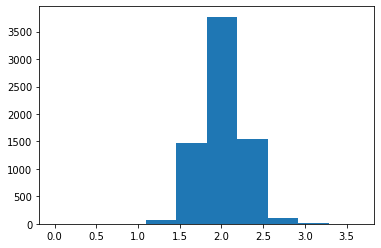

In [19]:
import matplotlib.pyplot as plt
total_pop = X_num[:,0]
for i in range(6976):
    x = int(X_num[i,0]*10)
    print((x,i),end=' ')

plt.hist(total_pop,bins=10)
plt.show()

In [22]:
print(X_num[2066,0],"*")

2.2267844583258336 *


### 3.4 Discretise the Data

In [23]:
import scipy.stats as stats
edge_list = []
for i in range(col):
    x = []
    for j in range(row):
        val = X_num[j,i]

        if (np.isnan(val)):
            next
        else:
            x.append(float(val))

    #print(i,stats.describe(x))

    edges=np.histogram_bin_edges(x,bins=3)

    print(edges)

    edge_list.append(edges)

[0.         1.21662633 2.43325265 3.64987898]
[0.         1.17770091 2.35540183 3.53310274]
[-4.60417069 -3.06944712 -1.53472356  0.        ]
[-2.99553229 -1.37002415  0.25548399  1.88099213]
[-4.60417069 -3.06944712 -1.53472356  0.        ]
[-3.91152313 -2.22947344 -0.54742375  1.13462594]
[-2.99553229 -1.56090969 -0.12628708  1.30833552]
[-3.91152313 -1.6720185   0.56748613  2.80699075]
[-3.21862586 -1.17751276  0.86360033  2.90471342]
[-2.52560365 -0.98073525  0.56413315  2.10900156]
[-9.11503019 -6.07668679 -3.0383434   0.        ]
[-9.11503019 -6.07668679 -3.0383434   0.        ]
[-1.38625436 -0.462905    0.46044437  1.38379374]
[-9.16265732e-01 -6.10840488e-01 -3.05415244e-01  9.99995000e-06]
[-3.54356772 -3.25451388 -2.96546004 -2.6764062 ]
[-3.50622462 -1.91704951 -0.3278744   1.2613007 ]
[-4.60417069 -3.06944712 -1.53472356  0.        ]
[-4.60417069 -3.06944712 -1.53472356  0.        ]
[-5.01760537 -3.48889933 -1.96019329 -0.43148725]
[-5.18242879 -3.49238475 -1.80234071 -0.11

### 3.5 Recode the Data

In [24]:
row, col = X_num.shape
print(row,col)

6976 34


In [25]:
def calc_marginals(cutpoints,data):
    # rows are cases, columns are variables
    X_num = data
    # the cutpoints are a list of list
    # outer list is variables, inner list is density cut points
    cutpoints = edge

    lowest = edge[0]
    low = edge[1]
    mid = edge[2]
    high = edge[3]
    C = [0]*3
    for j in range(row):
        if (np.isnan(X_num[j,i])):
            code = np.nan
        else:
            val = float(X_num[j,i])
            if (val < low):
                code = 0
            elif (val < mid):
                code = 1
            else:
                code = 2
        C[code]+=1
    return C

In [26]:
C_num = np.zeros((row,col))

for i in range(col):
    edge = edge_list[i]
    print(edge)
    lowest = edge[0]
    low = edge[1]
    mid = edge[2]
    high = edge[3]
    for j in range(row):
        if (np.isnan(X_num[j,i])):
            code = np.nan
            code = 3
        else:
            val = float(X_num[j,i])
            if (val < low):
                code = 0
            elif (val < mid):
                code = 1
            else:
                code = 2
        C_num[j,i]=code

[0.         1.21662633 2.43325265 3.64987898]
[0.         1.17770091 2.35540183 3.53310274]
[-4.60417069 -3.06944712 -1.53472356  0.        ]
[-2.99553229 -1.37002415  0.25548399  1.88099213]
[-4.60417069 -3.06944712 -1.53472356  0.        ]
[-3.91152313 -2.22947344 -0.54742375  1.13462594]
[-2.99553229 -1.56090969 -0.12628708  1.30833552]
[-3.91152313 -1.6720185   0.56748613  2.80699075]
[-3.21862586 -1.17751276  0.86360033  2.90471342]
[-2.52560365 -0.98073525  0.56413315  2.10900156]
[-9.11503019 -6.07668679 -3.0383434   0.        ]
[-9.11503019 -6.07668679 -3.0383434   0.        ]
[-1.38625436 -0.462905    0.46044437  1.38379374]
[-9.16265732e-01 -6.10840488e-01 -3.05415244e-01  9.99995000e-06]
[-3.54356772 -3.25451388 -2.96546004 -2.6764062 ]
[-3.50622462 -1.91704951 -0.3278744   1.2613007 ]
[-4.60417069 -3.06944712 -1.53472356  0.        ]
[-4.60417069 -3.06944712 -1.53472356  0.        ]
[-5.01760537 -3.48889933 -1.96019329 -0.43148725]
[-5.18242879 -3.49238475 -1.80234071 -0.11

In [27]:
# There are 561 two-way combinations of this data
# There are 5984 three-way combinations of this data

## 4. Create Useful Functions for Tabulation and Information

In [28]:
import math
def tabulate(x,y):
    z = np.zeros((4,4),dtype=int)
    for i in range(len(x)):

        
        if (math.isnan(x[i])| math.isnan(y[i]) ):
            next
            
        else:
            val1 = int(x[i])
            val2 = int(y[i])
            z[val1,val2]+=1

    return z

def tabulate_data(x1,y1,C):
    x = C_num[:,x1]
    y = C_num[:,y1]
    z = np.zeros((4,4),dtype=int)
    for i in range(4):

        
        if (math.isnan(x[i])| math.isnan(y[i]) ):
            # These have been recoded to 3
            next
            
        else:
            val1 = int(x[i])
            val2 = int(y[i])
            z[val1,val2]+=1

    return z

def joint_prob(z):
    # don't calculate probabilities of missing values
    zz = z[0:3,0:3]
    T = np.sum(zz)
    zz = zz/T
    return zz

In [29]:
import collections as c
cntr = c.Counter(C_num[:,28])
cntr.most_common()

[(0.0, 4054), (1.0, 2380), (3.0, 500), (2.0, 42)]

In [30]:

T01 = tabulate(C_num[:,0],C_num[:,1]) 
T02 = tabulate(C_num[:,0],C_num[:,2]) 
T0_28 = tabulate(C_num[:,0],C_num[:,28])
T28_5 = tabulate(C_num[:,28],C_num[:,5])
T28_7 = tabulate(C_num[:,28],C_num[:,7])
T28_13 = tabulate(C_num[:,28],C_num[:,13]) 
T28_14 = tabulate(C_num[:,28],C_num[:,14]) 
T14_4 = tabulate(C_num[:,14],C_num[:,4])

In [31]:
print("28 and 13")
print(T28_13)
print(" ")
print("28 and 14")
print(T28_14)
print(" ")
print("14 and 4")
print(T14_4)
print(" ")
print("0 and 28")
print(T0_28)
print(" ")
print("28 and 5")
print(T28_5)
print(" ")
print("28 and 7")
print(T28_7)
print(" ")
print("28 and 14")
print(T28_14)

28 and 13
[[   2  450 3226  376]
 [  16  943 1311  110]
 [   0    9   20   13]
 [   1    2  429   68]]
 
28 and 14
[[   6  580 3385   83]
 [  18  959 1319   84]
 [   0   11   14   17]
 [   0   15  480    5]]
 
14 and 4
[[   1   10   13    0]
 [  41 1182  342    0]
 [1986 3044  168    0]
 [  92   87   10    0]]
 
0 and 28
[[   4    2    0    3]
 [3936 2241   31  496]
 [ 114  137   11    1]
 [   0    0    0    0]]
 
28 and 5
[[ 482 2999  573    0]
 [  37  818 1525    0]
 [   0   17   25    0]
 [ 149  348    3    0]]
 
28 and 7
[[ 509 3267  277    1]
 [  60 1437  883    0]
 [   0   26   16    0]
 [ 132  357   10    1]]
 
28 and 14
[[   6  580 3385   83]
 [  18  959 1319   84]
 [   0   11   14   17]
 [   0   15  480    5]]


In [23]:
C_num.shape

(6976, 31)

In [24]:
print(T01) # val1 is on the rows, val2 is on the columns 

[[   3    0    0]
 [   0    0    0]
 [   0    0 6973]]


In [44]:
P01 = joint_prob(T01)
P02 = joint_prob(T02)
print(P02)

[[4.30045872e-04 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.57683486e-03 1.79759174e-01 8.18233945e-01]]


In [45]:
# These results show that where there is low population, there is low numbers of workers
# Where there are medium numbers of population, there will be low to medium numbers of workers
# Where there are high numbers of population, there will be medium to high numbers of workers
# The data is skewed by a few large numbers, and is rather poorly discretised.

In [46]:
def mutual_information(P):
    x = P.sum(axis=0)
    y = P.sum(axis=1)
    #print(x)
    #print(y)
    I=0
    for i in range(3):
        for j in range(3):
            xy = P[i,j]
            I += xy*np.log(xy/(x[i]*y[j]))
    return I

In [47]:
# important to know the direction of association
def correlation(x,y):
    table = tabulate_data(x,y,C_num)
    prob = joint_prob(table)
    xx = P.sum(axis=0)
    yy = P.sum(axis=1)  
    sigma = np.corrcoef(xx,yy)
    return sigma

In [48]:
I01=mutual_information(P01+.0000001)
I02=mutual_information(P02+.0000001)
print(I01)
print(I02)
# Population is not strongly related to work force
# Population is strongly related to income

0.0037641098482685906
2.4328455048940802


In [49]:
def calc_all(x,y):
    table = tabulate_data(x,y,C_num)
    prob = joint_prob(table)
    minfo = mutual_information(prob+.000001)
    return minfo

## 5. Create a Bayes Net

In [50]:
# Use the Chow-Liu algorithm
# Find the mutual information between all pairs of variables
all_mi = []
MI = np.zeros((34,34))
for i in range(33):
    for j in range(i+1,34):
        minfo = calc_all(i,j)
        print(i,j,minfo**.2)
        MI[i,j]=minfo**.2
        MI[j,i]=minfo**.2
        all_mi.append(minfo**.2)

0 1 0.12996453810940317
0 2 0.12996453810940317
0 3 0.12996453810940317
0 4 0.12996453810940317
0 5 0.12996453810940317
0 6 1.9102155921270416
0 7 1.2377043514796124
0 8 1.5961941955186822
0 9 0.12996453810940317
0 10 0.12996453810940317
0 11 1.8996880809973125
0 12 1.9102155921270416
0 13 0.12996453810940317
0 14 0.12996453810940317
0 15 1.447672902658195
0 16 1.8996880809973125
0 17 0.12996453810940317
0 18 1.8996880809973125
0 19 1.9016927092596878
0 20 1.8996880809973125
0 21 1.8996880809973125
0 22 1.9102155921270416
0 23 1.9102155921270416
0 24 1.9102155921270416
0 25 1.9016927092596878
0 26 1.9102155921270416
0 27 1.447672902658195
0 28 1.9102155921270416
0 29 1.9016927092596878
0 30 0.12996453810940317
0 31 1.447672902658195
0 32 0.12996453810940317
0 33 1.9016927092596878
1 2 0.12996453810940317
1 3 0.12996453810940317
1 4 0.12996453810940317
1 5 0.12996453810940317
1 6 1.9102155921270416
1 7 1.2377043514796124
1 8 1.5961941955186822
1 9 0.12996453810940317
1 10 0.129964538109

26 31 1.8996880809973125
26 32 1.9102155921270416
26 33 1.5961941955186822
27 28 1.8996880809973125
27 29 1.557380523295587
27 30 1.447672902658195
27 31 0.07245183769698255
27 32 1.447672902658195
27 33 1.557380523295587
28 29 1.5961941955186822
28 30 1.9102155921270416
28 31 1.8996880809973125
28 32 1.9102155921270416
28 33 1.5961941955186822
29 30 1.9016927092596878
29 31 1.557380523295587
29 32 1.9016927092596878
29 33 0.6106930359481904
30 31 1.447672902658195
30 32 0.12996453810940317
30 33 1.9016927092596878
31 32 1.447672902658195
31 33 1.557380523295587
32 33 1.9016927092596878


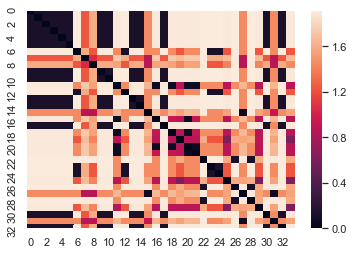

In [51]:
import seaborn as sns; sns.set()
%matplotlib inline
sns.heatmap(MI)

In [52]:
print(MI)

[[0.         0.12996454 0.12996454 ... 1.4476729  0.12996454 1.90169271]
 [0.12996454 0.         0.12996454 ... 1.4476729  0.12996454 1.90169271]
 [0.12996454 0.12996454 0.         ... 1.4476729  0.12996454 1.90169271]
 ...
 [1.4476729  1.4476729  1.4476729  ... 0.         1.4476729  1.55738052]
 [0.12996454 0.12996454 0.12996454 ... 1.4476729  0.         1.90169271]
 [1.90169271 1.90169271 1.90169271 ... 1.55738052 1.90169271 0.        ]]


In [53]:
# items 13 and 14 are related to everything else
# That's depression (DEPRESS) and low birth weight (LBW)
# Then items 6 and 10 are drawn in income (Income_count) and alcohol (ALCOHOL)
j = 0
for i in header:
    k = (j-3)
    if (k >= 0):
        print(k,i)
    j+=1

0 Total_population
1 Working_Age_population
2 Income_rate
3 Income_count
4 Employment_rate
5 Employment_count
6 CIF
7 ALCOHOL
8 DRUG
9 SMR
10 DEPRESS
11 LBWT
12 EMERG
13 Attendance
14 Attainment
15 no_qualifications
16 not_participating
17 University
18 drive_petrol
19 drive_GP
20 drive_post
21 drive_primary
22 drive_retail
23 drive_secondary
24 PT_GP
25 PT_post
26 PT_retail
27 Broadband
28 crime_count
29 crime_rate
30 overcrowded_count
31 nocentralheating_count
32 overcrowded_rate
33 nocentralheating_rate


In [54]:
# Okay, let's make a connected graph
sort = sorted(all_mi, reverse=True)

In [55]:
all_nodes = {}
all_tuples = []
for val in sort:
    print(val)
    for i in range(34):
        for j in range(i+1,34):
            if (MI[i,j] > val):
                if (i in all_nodes):
                    next
                else:
                    all_nodes[i] = 0
                    atuple = {i,j}
                    all_tuples.append(atuple)
                if (j in all_nodes):
                    next
                else:
                    all_nodes[j] = 0  
                    atuple = (i,j)
                    all_tuples.append(atuple)
                # found maximum value
                # put the two nodes in the list

1.9102155921270416
1.9102155921270416
1.9102155921270416
1.9102155921270416
1.9102155921270416
1.9102155921270416
1.9102155921270416
1.9102155921270416
1.9102155921270416
1.9102155921270416
1.9102155921270416
1.9102155921270416
1.9102155921270416
1.9102155921270416
1.9102155921270416
1.9102155921270416
1.9102155921270416
1.9102155921270416
1.9102155921270416
1.9102155921270416
1.9102155921270416
1.9102155921270416
1.9102155921270416
1.9102155921270416
1.9102155921270416
1.9102155921270416
1.9102155921270416
1.9102155921270416
1.9102155921270416
1.9102155921270416
1.9102155921270416
1.9102155921270416
1.9102155921270416
1.9102155921270416
1.9102155921270416
1.9102155921270416
1.9102155921270416
1.9102155921270416
1.9102155921270416
1.9102155921270416
1.9102155921270416
1.9102155921270416
1.9102155921270416
1.9102155921270416
1.9102155921270416
1.9102155921270416
1.9102155921270416
1.9102155921270416
1.9102155921270416
1.9102155921270416
1.9102155921270416
1.9102155921270416
1.9102155921

In [56]:
# the first two items are duplicated / equivalent
print(all_tuples)

[{0, 6}, (0, 6), (0, 12), (0, 22), (0, 23), (0, 24), (0, 26), (0, 28), {1, 6}, {2, 6}, {3, 6}, {4, 6}, {5, 6}, (6, 9), (6, 10), (6, 13), (6, 14), (6, 17), (6, 30), (6, 32), (0, 19), (0, 25), (0, 29), (0, 33), {22, 7}, {8, 22}, (0, 11), (0, 16), (0, 18), (0, 20), (0, 21), {22, 15}, (22, 27), (22, 31)]


In [57]:
# This should be converted to a directed graph and displayed. 
# You do that by choosing a theoretically founded root note. I'd argue for node 28. 

In [ ]:
# There is strong evidence that putting at risk kids together increases crime rates. 
# Further there is evidence that school segregation leads to poor attainment and university attendance.

# Billings, S. B., D. J. Deming and J. Rockoff (2014). "School Segregation, Educational Attainment, 
# and Crime: Evidence from the End of Busing in Charlotte-Mecklenburg." Quarterly Journal of Economics 
# 129(1): 435-476.

# Segregation is not listed in the SIMD.
